<a href="https://colab.research.google.com/github/isaac-altair/SQL/blob/master/Various_SQL_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install duckdb

In [ ]:
import duckdb
import pandas as pd

# Set the option to display all rows
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_excel("/content/dummy_file.xlsx")

In [ ]:
con = duckdb.connect()

In [ ]:
duckdb.query("SELECT * FROM df").df()

,ID,Name,Score
0,1,Alice,85
1,2,Bob,92
2,3,Charlie,78


In [ ]:
#####

1. Select the top 3 departments with at least ten employees and highest average salary

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Departments
departments = pd.DataFrame({
    "dept_id": [10,20,30,40,50],
    "dept_name": ["Engineering","Sales","Data Science","HR","Marketing"]
})

# Employees
num_employees = 100
emp_ids = list(range(1, num_employees+1))
emp_names = [f"Emp{i}" for i in emp_ids]

# Assign departments randomly, with some departments having more employees
dept_ids = np.random.choice([10,20,30,40,50], size=num_employees, p=[0.3,0.25,0.2,0.15,0.1])

# Random salaries by dept_id ranges
salaries = []
for d in dept_ids:
    if d == 10:  # Engineering
        salaries.append(np.random.randint(75000,120000))
    elif d == 20:  # Sales
        salaries.append(np.random.randint(50000,90000))
    elif d == 30:  # Data Science
        salaries.append(np.random.randint(90000,130000))
    elif d == 40:  # HR
        salaries.append(np.random.randint(45000,80000))
    elif d == 50:  # Marketing
        salaries.append(np.random.randint(55000,95000))

employees = pd.DataFrame({
    "emp_id": emp_ids,
    "emp_name": emp_names,
    "dept_id": dept_ids,
    "salary": salaries
})

employees.head()


,emp_id,emp_name,dept_id,salary
0,1,Emp1,20,72403
1,2,Emp2,50,73141
2,3,Emp3,30,104820
3,4,Emp4,30,96374
4,5,Emp5,10,76678


In [ ]:
departments.head(10)

,dept_id,dept_name
0,10,Engineering
1,20,Sales
2,30,Data Science
3,40,HR
4,50,Marketing


In [ ]:
joined_table = duckdb.query("""SELECT * FROM employees e left join departments d on e.dept_id = d.dept_id""").df()
joined_table.head(5)

,emp_id,emp_name,dept_id,salary,dept_id_1,dept_name
0,1,Emp1,20,72403,20,Sales
1,2,Emp2,50,73141,50,Marketing
2,3,Emp3,30,104820,30,Data Science
3,4,Emp4,30,96374,30,Data Science
4,5,Emp5,10,76678,10,Engineering


In [ ]:
duckdb.register("joined_table", joined_table)

In [ ]:
# Calculate employee count and average salary per department

joined_table_updated = duckdb.query("""select *, count(emp_name) over(partition by dept_id) as emp_count, avg(salary) over(partition by dept_id) as avg_dep_salary from joined_table""").df()

joined_table_updated.head(10)

,emp_id,emp_name,dept_id,salary,dept_id_1,dept_name,emp_count,avg_dep_salary
0,1,Emp1,20,72403,20,Sales,25,70239.2
1,17,Emp17,20,71834,20,Sales,25,70239.2
2,18,Emp18,20,68047,20,Sales,25,70239.2
3,19,Emp19,20,76105,20,Sales,25,70239.2
4,24,Emp24,20,73776,20,Sales,25,70239.2
5,25,Emp25,20,80080,20,Sales,25,70239.2
6,28,Emp28,20,77251,20,Sales,25,70239.2
7,37,Emp37,20,63545,20,Sales,25,70239.2
8,40,Emp40,20,57994,20,Sales,25,70239.2
9,42,Emp42,20,80303,20,Sales,25,70239.2


In [ ]:
duckdb.register("joined_table_updated", joined_table_updated)

In [ ]:
# Now we need to select all departments which have more than 10 employees

# duckdb.query("""
# with more_than_ten_emps as (select * from joined_table_updated where emp_count >=10)
# select *, rank() over(partition by ) as avg_salary_rank from more_than_ten_emps""")

more_than_10_emps = duckdb.query("""
select * from joined_table_updated where emp_count >=10""")
more_than_10_emps

┌────────┬──────────┬─────────┬────────┬───────────┬───────────┬───────────┬────────────────────┐
│ emp_id │ emp_name │ dept_id │ salary │ dept_id_1 │ dept_name │ emp_count │   avg_dep_salary   │
│ int64  │ varchar  │  int64  │ int64  │   int64   │  varchar  │   int64   │       double       │
├────────┼──────────┼─────────┼────────┼───────────┼───────────┼───────────┼────────────────────┤
│      1 │ Emp1     │      20 │  72403 │        20 │ Sales     │        25 │            70239.2 │
│     17 │ Emp17    │      20 │  71834 │        20 │ Sales     │        25 │            70239.2 │
│     18 │ Emp18    │      20 │  68047 │        20 │ Sales     │        25 │            70239.2 │
│     19 │ Emp19    │      20 │  76105 │        20 │ Sales     │        25 │            70239.2 │
│     24 │ Emp24    │      20 │  73776 │        20 │ Sales     │        25 │            70239.2 │
│     25 │ Emp25    │      20 │  80080 │        20 │ Sales     │        25 │            70239.2 │
│     28 │ Emp28    

In [ ]:
duckdb.register("more_than_10_emps", more_than_10_emps)

In [ ]:
duckdb.query("""select DISTINCT dept_id, avg_dep_salary from more_than_10_emps order by avg_dep_salary desc limit 3""").df()

,dept_id,avg_dep_salary
0,30,108031.117647
1,10,95095.029412
2,20,70239.200000


Ok, there is a much simpler method.

In [ ]:
employees.head(2)

,emp_id,emp_name,dept_id,salary
0,1,Emp1,20,72403
1,2,Emp2,50,73141


In [ ]:
departments.head(2)

,dept_id,dept_name
0,10,Engineering
1,20,Sales


In [ ]:

simple_table = duckdb.query(
    """
    SELECT d.dept_id, d.dept_name, count(e.emp_id) as emp_count, avg(e.salary) as avg_salary
    FROM employees e left join departments d on e.dept_id = d.dept_id
    group by d.dept_id, d.dept_name having count(e.emp_id) > 10 order by avg_salary desc
    limit 3
    """
    ).df()
simple_table.head(5)

,dept_id,dept_name,emp_count,avg_salary
0,30,Data Science,17,108031.117647
1,10,Engineering,34,95095.029412
2,20,Sales,25,70239.200000


2. Calculate the first touch attribution channel for each user

In [ ]:
import pandas as pd

touchpoints = pd.DataFrame({
    "user_id": [
        # User 1 (5 touches)
        1,1,1,1,1,
        # User 2 (4 touches)
        2,2,2,2,
        # User 3 (3 touches)
        3,3,3,
        # User 4 (2 touches)
        4,4,
        # User 5 (1 touch)
        5,
        # User 6 (6 touches)
        6,6,6,6,6,6,
        # User 7 (3 touches)
        7,7,7
    ],
    "event_time": [
        # User 1
        "2025-03-01 08:50:00",
        "2025-03-01 09:10:00",
        "2025-03-01 09:12:00",
        "2025-03-02 10:00:00",
        "2025-03-04 12:20:00",

        # User 2
        "2025-03-05 14:00:00",
        "2025-03-05 14:05:00",
        "2025-03-06 09:30:00",
        "2025-03-07 11:00:00",

        # User 3
        "2025-03-02 10:00:00",
        "2025-03-03 09:20:00",
        "2025-03-05 16:30:00",

        # User 4
        "2025-03-10 08:00:00",
        "2025-03-10 09:00:00",

        # User 5
        "2025-03-11 14:45:00",

        # User 6
        "2025-03-01 07:00:00",
        "2025-03-01 07:01:00",
        "2025-03-01 07:03:00",
        "2025-03-02 08:00:00",
        "2025-03-03 09:15:00",
        "2025-03-04 10:45:00",

        # User 7
        "2025-03-01 12:00:00",
        "2025-03-02 12:00:00",
        "2025-03-03 12:00:00"
    ],
    "channel": [
        # User 1
        "Organic","Facebook","Email","Paid Search","Instagram",

        # User 2
        "Paid Search","Instagram","Email","Facebook",

        # User 3
        "Organic","Email","Paid Search",

        # User 4
        "Referral","Organic",

        # User 5
        "Paid Search",

        # User 6
        "Facebook","Facebook","Email","Organic","Paid Search","Referral",

        # User 7
        "Email","Organic","Instagram"
    ]
})

touchpoints


,user_id,event_time,channel
0,1,2025-03-01 08:50:00,Organic
1,1,2025-03-01 09:10:00,Facebook
2,1,2025-03-01 09:12:00,Email
3,1,2025-03-02 10:00:00,Paid Search
4,1,2025-03-04 12:20:00,Instagram
5,2,2025-03-05 14:00:00,Paid Search
6,2,2025-03-05 14:05:00,Instagram
7,2,2025-03-06 09:30:00,Email
8,2,2025-03-07 11:00:00,Facebook
9,3,2025-03-02 10:00:00,Organic


In [ ]:
touchpoints.head(5)

,user_id,event_time,channel
0,1,2025-03-01 08:50:00,Organic
1,1,2025-03-01 09:10:00,Facebook
2,1,2025-03-01 09:12:00,Email
3,1,2025-03-02 10:00:00,Paid Search
4,1,2025-03-04 12:20:00,Instagram


In [ ]:
duckdb.query("""
with touchpoints_ordered as (select *, row_number() over(partition by user_id order by event_time) as event_time_rank from touchpoints
)
select * from touchpoints_ordered where event_time_rank = 1 order by user_id
""").df()

,user_id,event_time,channel,event_time_rank
0,1,2025-03-01 08:50:00,Organic,1
1,2,2025-03-05 14:00:00,Paid Search,1
2,3,2025-03-02 10:00:00,Organic,1
3,4,2025-03-10 08:00:00,Referral,1
4,5,2025-03-11 14:45:00,Paid Search,1
5,6,2025-03-01 07:00:00,Facebook,1
6,7,2025-03-01 12:00:00,Email,1


3. Dataset: Additional Purchases After Signup

In [ ]:
users = pd.DataFrame({
    "user_id": [1,2,3],
    "signup_date": ["2025-03-01","2025-03-03","2025-03-04"]
})

purchases = pd.DataFrame({
    "purchase_id": [101,102,103,104,105],
    "user_id": [1,1,2,2,3],
    "purchase_date": ["2025-03-01","2025-03-10","2025-03-03","2025-03-06","2025-03-04"],
    "amount": [20,35,15,18,22]
})

In [ ]:
users

,user_id,signup_date
0,1,2025-03-01
1,2,2025-03-03
2,3,2025-03-04


In [ ]:
purchases

,purchase_id,user_id,purchase_date,amount
0,101,1,2025-03-01,20
1,102,1,2025-03-10,35
2,103,2,2025-03-03,15
3,104,2,2025-03-06,18
4,105,3,2025-03-04,22


In [ ]:
duckdb.query(
"""
with joined_tables as (select * from purchases p left join users u on p.user_id = u.user_id)
select * from joined_tables where purchase_date > signup_date
""").df()

,purchase_id,user_id,purchase_date,amount,user_id_1,signup_date
0,102,1,2025-03-10,35,1,2025-03-01
1,104,2,2025-03-06,18,2,2025-03-03


4. Dataset: Average Swipes per User per Day

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

users = [1, 2, 3]
days = pd.date_range("2025-03-01", periods=20, freq="D")

rows = []

for user in users:
    for day in days:
        num_swipes = np.random.randint(3, 7)  # 3 to 6 swipes per day
        times = pd.to_timedelta(
            np.random.randint(7*60, 22*60, num_swipes), unit="m"
        )
        for t in times:
            rows.append([user, day + t])

swipes = pd.DataFrame(rows, columns=["user_id", "swipe_time"])
swipes = swipes.sort_values(["user_id", "swipe_time"]).reset_index(drop=True)

swipes


,user_id,swipe_time
0,1,2025-03-01 08:11:00
1,1,2025-03-01 08:46:00
2,1,2025-03-01 11:30:00
3,1,2025-03-01 14:15:00
4,1,2025-03-01 21:20:00
...,...,...
274,3,2025-03-20 09:23:00
275,3,2025-03-20 12:45:00
276,3,2025-03-20 16:31:00
277,3,2025-03-20 17:23:00


In [ ]:
duckdb.query("""
with swipes_updated as (select *, cast(swipe_time as DATE) as swipe_date, cast(swipe_time as TIME) as swipe_hour from swipes),
grouped_swipes as (select user_id, swipe_date, count(swipe_hour) as swipe_count from swipes_updated group by user_id, swipe_date)
select user_id, avg(swipe_count) from grouped_swipes group by user_id""").df()

,user_id,avg(swipe_count)
0,1,4.75
1,3,4.55
2,2,4.65


5. Write a query to retrieve the latest salary for each employee

In [ ]:
import pandas as pd

salary_history = pd.DataFrame({
    "emp_id": [
        # Employee 1 (4 salary changes)
        1,1,1,1,
        # Employee 2 (3 salary changes)
        2,2,2,
        # Employee 3 (1 salary on record)
        3,
        # Employee 4 (5 salary changes)
        4,4,4,4,4,
        # Employee 5 (2 salary changes)
        5,5,
        # Employee 6 (3 salary changes)
        6,6,6
    ],
    "salary": [
        # Employee 1
        70000,72000,75000,80000,
        # Employee 2
        60000,63000,65000,
        # Employee 3
        90000,
        # Employee 4
        50000,52000,54000,56000,60000,
        # Employee 5
        88000,91000,
        # Employee 6
        45000,47000,50000
    ],
    "effective_date": [
        # Employee 1
        "2022-01-01","2023-01-01","2024-01-01","2025-01-01",
        # Employee 2
        "2023-06-01","2024-03-01","2025-02-01",
        # Employee 3
        "2024-07-01",
        # Employee 4
        "2021-02-01","2022-02-01","2023-02-01","2024-02-01","2025-02-01",
        # Employee 5
        "2023-11-15","2025-01-10",
        # Employee 6
        "2022-05-01","2023-05-01","2025-03-01"
    ]
})

salary_history


,emp_id,salary,effective_date
0,1,70000,2022-01-01
1,1,72000,2023-01-01
2,1,75000,2024-01-01
3,1,80000,2025-01-01
4,2,60000,2023-06-01
5,2,63000,2024-03-01
6,2,65000,2025-02-01
7,3,90000,2024-07-01
8,4,50000,2021-02-01
9,4,52000,2022-02-01


In [ ]:
salary_history

,emp_id,salary,effective_date
0,1,70000,2022-01-01
1,1,72000,2023-01-01
2,1,75000,2024-01-01
3,1,80000,2025-01-01
4,2,60000,2023-06-01
5,2,63000,2024-03-01
6,2,65000,2025-02-01
7,3,90000,2024-07-01
8,4,50000,2021-02-01
9,4,52000,2022-02-01


In [ ]:
duckdb.query("""
with salary_ordered as (select *, row_number() over(partition by emp_id order by effective_date desc) as salary_rank from salary_history
)
select * from salary_ordered where salary_rank = 1  order by emp_id
""").df()

,emp_id,salary,effective_date,salary_rank
0,1,80000,2025-01-01,1
1,2,65000,2025-02-01,1
2,3,90000,2024-07-01,1
3,4,60000,2025-02-01,1
4,5,91000,2025-01-10,1
5,6,50000,2025-03-01,1


6. Write a query to find the third purchase of every customer

In [ ]:
import pandas as pd

orders = pd.DataFrame({
    "order_id": list(range(1, 31)),  # 30 orders total
    "customer_id": [
        # Customer 10: 10 orders
        10,10,10,10,10,10,10,10,10,10,
        # Customer 20: 8 orders
        20,20,20,20,20,20,20,20,
        # Customer 30: 6 orders
        30,30,30,30,30,30,
        # Customer 40: 6 orders
        40,40,40,40,40,40
    ],
    "order_date": [
        # Customer 10
        "2025-01-01","2025-01-03","2025-01-05","2025-01-06","2025-01-07",
        "2025-01-10","2025-01-15","2025-01-20","2025-01-25","2025-01-30",

        # Customer 20
        "2025-02-01","2025-02-02","2025-02-05","2025-02-09",
        "2025-02-11","2025-02-18","2025-02-20","2025-02-28",

        # Customer 30
        "2025-03-01","2025-03-03","2025-03-10","2025-03-12","2025-03-20","2025-03-25",

        # Customer 40
        "2025-04-01","2025-04-02","2025-04-05",
        "2025-04-10","2025-04-12","2025-04-15"
    ],
    "amount": [
        # Customer 10
        15,20,12,18,25,30,10,22,17,19,
        # Customer 20
        12,18,25,30,15,22,19,20,
        # Customer 30
        10,11,13,14,16,18,
        # Customer 40
        20,21,19,25,26,28
    ]
})


In [ ]:
orders

,order_id,customer_id,order_date,amount
0,1,10,2025-01-01,15
1,2,10,2025-01-03,20
2,3,10,2025-01-05,12
3,4,10,2025-01-06,18
4,5,10,2025-01-07,25
5,6,10,2025-01-10,30
6,7,10,2025-01-15,10
7,8,10,2025-01-20,22
8,9,10,2025-01-25,17
9,10,10,2025-01-30,19


In [ ]:
duckdb.query("""
with sub_query as(select *, dense_rank () over(partition by customer_id order by order_date) as order_num from orders order by customer_id, order_date)
select * from sub_query where order_num = 3
""").df()

,order_id,customer_id,order_date,amount,order_num
0,3,10,2025-01-05,12,3
1,13,20,2025-02-05,25,3
2,21,30,2025-03-10,13,3
3,27,40,2025-04-05,19,3


7. Write a query to return neighborhoods with no registered users

In [ ]:
import pandas as pd

neighborhoods = pd.DataFrame({
    "neighborhood_id": list(range(1, 11)),
    "name": [
        "Uptown",
        "Downtown",
        "West Park",
        "Riverside",
        "Eastwood",
        "North Hills",
        "Southgate",
        "Lakeview",
        "Old Town",
        "Harbor District"
    ]
})

registered_users = pd.DataFrame({
    "user_id": list(range(1, 21)),
    "neighborhood_id": [
        1,1,1,   # Uptown (3 users)
        2,2,     # Downtown (2 users)
        3,       # West Park (1 user)
        5,5,5,5, # Eastwood (4 users)
        7,       # Southgate (1 user)
        8,8,     # Lakeview (2 users)
        10,10,10, # Harbor District (3 users)
        2,       # Downtown (extra)
        1,       # Uptown
        8,       # Lakeview
        7        # Southgate
    ]
})


In [ ]:
neighborhoods

,neighborhood_id,name
0,1,Uptown
1,2,Downtown
2,3,West Park
3,4,Riverside
4,5,Eastwood
5,6,North Hills
6,7,Southgate
7,8,Lakeview
8,9,Old Town
9,10,Harbor District


In [ ]:
registered_users

,user_id,neighborhood_id
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
5,6,3
6,7,5
7,8,5
8,9,5
9,10,5


In [ ]:
duckdb.query("""
select * from neighborhoods n left join registered_users ru on
n.neighborhood_id = ru.neighborhood_id where user_id is NULL
""").df()

,neighborhood_id,name,user_id,neighborhood_id_1
0,9,Old Town,<NA>,<NA>
1,4,Riverside,<NA>,<NA>
2,6,North Hills,<NA>,<NA>


8. Capital One, a multinational bank, wants to identify their "whale users" from the credit card usage data. A "whale user" is a customer who makes a high number of transactions, amounting to a high monetary value. Create an SQL query that analyzes the customer credit card transaction data to list down the top 10 users who have the highest total transaction amounts in the last 30 days.(for this case, use more than 30 days).

In [ ]:
import pandas as pd

# -----------------------------
# Transactions Table
# -----------------------------
transactions = pd.DataFrame({
    "transaction_id": [3221, 6732, 3982, 8744, 4637],
    "user_id": [765, 998, 473, 765, 473],
    "transaction_date": [
        "2023-09-12 00:00:00",
        "2023-09-15 00:00:00",
        "2023-09-18 00:00:00",
        "2023-09-12 00:00:00",
        "2023-09-19 00:00:00"
    ],
    "credit_card_id": [
        "1234567890123456",
        "2345678901234567",
        "3456789012345678",
        "1234567890123456",
        "3456789012345678"
    ],
    "transaction_amount": [750, 500, 1000, 1250, 3500]
})

# -----------------------------
# Users Table
# -----------------------------
users = pd.DataFrame({
    "user_id": [765, 998, 473],
    "first_name": ["John", "Jane", "Adrian"],
    "last_name": ["Doe", "Smith", "Johnson"]
})


In [ ]:
transactions

,transaction_id,user_id,transaction_date,credit_card_id,transaction_amount
0,3221,765,2023-09-12 00:00:00,1234567890123456,750
1,6732,998,2023-09-15 00:00:00,2345678901234567,500
2,3982,473,2023-09-18 00:00:00,3456789012345678,1000
3,8744,765,2023-09-12 00:00:00,1234567890123456,1250
4,4637,473,2023-09-19 00:00:00,3456789012345678,3500


In [ ]:
users

,user_id,first_name,last_name
0,765,John,Doe
1,998,Jane,Smith
2,473,Adrian,Johnson


In [ ]:
whales_joined = duckdb.query("""
select t.user_id, t.transaction_amount, u.first_name, u.last_name from transactions t left join users u on
t.user_id = u.user_id where TODAY() - CAST(t.transaction_date as DATE) > 30
order by t.transaction_amount desc limit 10
""").df()

whales_joined

,user_id,transaction_amount,first_name,last_name
0,473,3500,Adrian,Johnson
1,765,1250,John,Doe
2,473,1000,Adrian,Johnson
3,765,750,John,Doe
4,998,500,Jane,Smith


In [ ]:
# Remember to add up the transaction amounts per each whale

whales_joined_correct = duckdb.query("""
with joined_table as (select t.user_id, u.first_name, u.last_name, t.transaction_amount from transactions t left join users u on
t.user_id = u.user_id where TODAY() - CAST(t.transaction_date as DATE) > 30)
select user_id, first_name, last_name, sum(transaction_amount) as transaction_amount_sum from joined_table
group by user_id, first_name, last_name order by transaction_amount_sum desc limit 10
""").df()

whales_joined

,user_id,transaction_amount,first_name,last_name
0,473,3500,Adrian,Johnson
1,765,1250,John,Doe
2,473,1000,Adrian,Johnson
3,765,750,John,Doe
4,998,500,Jane,Smith


9. Top Department Salaries

Write a SQL query to find the top 3 highest earning employees within each department.

In [ ]:
import pandas as pd

# Employee table
employees = pd.DataFrame({
    "employee_id": [1, 2, 3, 4, 5, 8, 10],
    "name": [
        "Emma Thompson",
        "Daniel Rodriguez",
        "Olivia Smith",
        "Noah Johnson",
        "Sophia Martinez",
        "William Davis",
        "James Anderson"
    ],
    "salary": [3800, 2230, 2000, 6800, 1750, 6800, 4000],
    "department_id": [1, 1, 1, 2, 1, 2, 1]
})

# Department table
departments = pd.DataFrame({
    "department_id": [1, 2],
    "department_name": ["Data Analytics", "Data Science"]
})

print("Employees Table:")
print(employees)

print("\nDepartments Table:")
print(departments)


Employees Table:
   employee_id              name  salary  department_id
0            1     Emma Thompson    3800              1
1            2  Daniel Rodriguez    2230              1
2            3      Olivia Smith    2000              1
3            4      Noah Johnson    6800              2
4            5   Sophia Martinez    1750              1
5            8     William Davis    6800              2
6           10    James Anderson    4000              1

Departments Table:
   department_id department_name
0              1  Data Analytics
1              2    Data Science


In [ ]:
joined_tables = duckdb.query("""
with emp_and_deps as (select e.employee_id, e.name, e.salary, e.department_id, d.department_name
 from employees e left join departments d on e.department_id = d.department_id),
 emp_and_deps_window as (select *, dense_rank() over(partition by department_id order by salary desc) as salary_rank from emp_and_deps
)
select * from emp_and_deps_window where salary_rank < 4
""")

joined_tables

┌─────────────┬──────────────────┬────────┬───────────────┬─────────────────┬─────────────┐
│ employee_id │       name       │ salary │ department_id │ department_name │ salary_rank │
│    int64    │     varchar      │ int64  │     int64     │     varchar     │    int64    │
├─────────────┼──────────────────┼────────┼───────────────┼─────────────────┼─────────────┤
│          10 │ James Anderson   │   4000 │             1 │ Data Analytics  │           1 │
│           1 │ Emma Thompson    │   3800 │             1 │ Data Analytics  │           2 │
│           2 │ Daniel Rodriguez │   2230 │             1 │ Data Analytics  │           3 │
│           4 │ Noah Johnson     │   6800 │             2 │ Data Science    │           1 │
│           8 │ William Davis    │   6800 │             2 │ Data Science    │           1 │
└─────────────┴──────────────────┴────────┴───────────────┴─────────────────┴─────────────┘

10. Analyzing Monthly Average Spending on Credit Cards.

Calculate the monthly average transaction amounts for each card type from January 2022 to December 2022?

In [ ]:
import pandas as pd

# Transactions table
transactions = pd.DataFrame({
    "transaction_id": [91872, 87263, 78142, 81005, 88364],
    "user_id": [458, 321, 156, 156, 983],
    "transaction_date": [
        "01/05/2022",
        "01/18/2022",
        "02/02/2022",
        "02/12/2022",
        "03/10/2022"
    ],
    "card_type": ["Visa", "Mastercard", "Visa", "Visa", "Mastercard"],
    "transaction_amount": ["$50", "$100", "$500", "$300", "$200"]
})

print(transactions)


   transaction_id  user_id transaction_date   card_type transaction_amount
0           91872      458       01/05/2022        Visa                $50
1           87263      321       01/18/2022  Mastercard               $100
2           78142      156       02/02/2022        Visa               $500
3           81005      156       02/12/2022        Visa               $300
4           88364      983       03/10/2022  Mastercard               $200


In [ ]:
mnthly_avg_transactions = duckdb.query(
    """
    with date_slice as
    (select *, strftime(strptime(transaction_date, '%m/%d/%Y'), '%m') as trans_month from transactions where strptime(transaction_date, '%m/%d/%Y') between strptime('01/01/2022', '%m/%d/%Y') and strptime('12/31/2022', '%m/%d/%Y'))
    select DISTINCT trans_month, card_type, avg(CAST(SUBSTRING(transaction_amount, 2, LEN(transaction_amount) - 1) as INT)) over(partition by trans_month, card_type) as avg_transaction_amount from date_slice order by trans_month
    """
)
mnthly_avg_transactions

┌─────────────┬────────────┬────────────────────────┐
│ trans_month │ card_type  │ avg_transaction_amount │
│   varchar   │  varchar   │         double         │
├─────────────┼────────────┼────────────────────────┤
│ 01          │ Visa       │                   50.0 │
│ 01          │ Mastercard │                  100.0 │
│ 02          │ Visa       │                  400.0 │
│ 03          │ Mastercard │                  200.0 │
└─────────────┴────────────┴────────────────────────┘

Q11. Click-through rates

We want to calculate the CTR for each product. CTR is defined as the number of users who applied for a product after clicking on it divided by the number of total unique users who clicked on the product.

In [ ]:
import pandas as pd

user_clicks = pd.DataFrame({
    "click_id": [8751, 9327, 6892, 7865, 5812],
    "user_id": [545, 298, 323, 299, 550],
    "product_id": [7412, 1258, 7412, 7412, 1258],
    "timestamp": [
        "07/08/2022 10:15:00",
        "07/09/2022 07:05:00",
        "07/09/2022 15:30:00",
        "07/10/2022 11:15:00",
        "07/11/2022 16:45:00"
    ]
})

user_clicks["timestamp"] = pd.to_datetime(user_clicks["timestamp"])

product_applications = pd.DataFrame({
    "application_id": [3874, 9285, 7903],
    "user_id": [545, 323, 299],
    "product_id": [7412, 7412, 7412],
    "application_time": [
        "07/08/2022 10:30:00",
        "07/09/2022 15:55:00",
        "07/11/2022 09:00:00"
    ]
})

product_applications["application_time"] = pd.to_datetime(product_applications["application_time"])


12. Find Customers from a Specific City

Filter out the customers who are based out of New York City.

In [ ]:
import pandas as pd

customers = pd.DataFrame({
    "customer_id": [1190, 2325, 3782, 4911, 5761],
    "first_name": ["William", "Emma", "Olivia", "James", "Sophia"],
    "last_name": ["Smith", "Johnson", "Williams", "Brown", "Davis"],
    "city": ["New York", "Chicago", "New York", "Boston", "New York"],
    "sign_up_date": [
        "06/08/2020",
        "06/10/2020",
        "06/18/2020",
        "07/26/2020",
        "07/05/2020"
    ]
})

customers["sign_up_date"] = pd.to_datetime(customers["sign_up_date"])

In [ ]:
customers

,customer_id,first_name,last_name,city,sign_up_date
0,1190,William,Smith,New York,2020-06-08
1,2325,Emma,Johnson,Chicago,2020-06-10
2,3782,Olivia,Williams,New York,2020-06-18
3,4911,James,Brown,Boston,2020-07-26
4,5761,Sophia,Davis,New York,2020-07-05


In [ ]:
duckdb.query(
    """
    select customer_id, first_name, last_name from customers where city = 'New York'
    """)

┌─────────────┬────────────┬───────────┐
│ customer_id │ first_name │ last_name │
│    int64    │  varchar   │  varchar  │
├─────────────┼────────────┼───────────┤
│        1190 │ William    │ Smith     │
│        3782 │ Olivia     │ Williams  │
│        5761 │ Sophia     │ Davis     │
└─────────────┴────────────┴───────────┘

13.  Calculate Compound Monthly Interest Rates. Hard.

In [ ]:
import pandas as pd

accounts = pd.DataFrame({
    "account_id": [101, 102, 103, 104, 105],
    "principal": [1000, 2000, 1500, 3000, 5000],
    "yearly_rate": [6, 7, 5.5, 6.5, 8],
    "monthly_deposit": [200, 300, 250, 600, 1000],
    "months": [6, 12, 12, 6, 12]
})

accounts

,account_id,principal,yearly_rate,monthly_deposit,months
0,101,1000,6.0,200,6
1,102,2000,7.0,300,12
2,103,1500,5.5,250,12
3,104,3000,6.5,600,6
4,105,5000,8.0,1000,12


In [ ]:
duckdb.query(
    """
    with sub_query as ()
    select * from sub_query
    """
)

┌────────────┬────────────────────┐
│ account_id │   compount_value   │
│   int64    │       double       │
├────────────┼────────────────────┤
│        101 │ 1.0392310484577327 │
│        102 │ 1.0516335434979465 │
│        103 │  1.039307091672142 │
│        104 │  1.048791590293207 │
│        105 │ 1.0670947735489422 │
└────────────┴────────────────────┘

14 -24.

EXERCISE 14 — Window Functions
Problem

For each customer, compute:

The total spending

The running total ordered by time

The rank of each purchase within each customer

Focus

Window functions, partition, order.

In [ ]:
import pandas as pd

transactions = pd.DataFrame({
    "txn_id": [101,102,103,104,105,106,107,108,109],
    "customer_id": [1,1,1,2,2,2,3,3,3],
    "txn_time": [
        "2025-01-01 10:00:00",
        "2025-01-03 15:30:00",
        "2025-01-05 09:45:00",
        "2025-02-01 12:00:00",
        "2025-02-02 08:15:00",
        "2025-02-03 18:40:00",
        "2025-03-10 14:00:00",
        "2025-03-11 09:20:00",
        "2025-03-12 16:10:00",
    ],
    "amount": [50, 120, 75, 200, 140, 180, 90, 110, 60]
})

transactions["txn_time"] = pd.to_datetime(transactions["txn_time"])

transactions


,txn_id,customer_id,txn_time,amount
0,101,1,2025-01-01 10:00:00,50
1,102,1,2025-01-03 15:30:00,120
2,103,1,2025-01-05 09:45:00,75
3,104,2,2025-02-01 12:00:00,200
4,105,2,2025-02-02 08:15:00,140
5,106,2,2025-02-03 18:40:00,180
6,107,3,2025-03-10 14:00:00,90
7,108,3,2025-03-11 09:20:00,110
8,109,3,2025-03-12 16:10:00,60


In [ ]:
q_14 = duckdb.query("""
select * from transactions
""").df()

q_14

,transaction_id,customer_id,amount,merchant,txn_time
0,1,101,25.50,Starbucks,2022-01-02 08:15:00
1,2,101,125.00,Amazon,2022-01-05 13:45:00
2,3,102,200.00,Walmart,2022-01-06 19:10:00
3,4,101,32.80,Starbucks,2022-01-07 08:05:00
4,5,103,15.25,Starbucks,2022-01-07 09:00:00
5,6,102,400.00,Apple,2022-01-09 14:25:00
6,7,103,75.00,Walmart,2022-01-10 17:45:00


In [ ]:
duckdb.query("""
select *,
sum(amount) over(partition by customer_id) as total_spending,
sum(amount) over(partition by customer_id order by txn_time ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as running_total_amount,
dense_rank() over(partition by customer_id order by amount desc) as purchase_rank  from transactions order by customer_id, txn_time
"""
).df()

,transaction_id,customer_id,amount,merchant,txn_time,total_spending,running_total_amount,purchase_rank
0,1,101,25.50,Starbucks,2022-01-02 08:15:00,183.30,25.50,3
1,2,101,125.00,Amazon,2022-01-05 13:45:00,183.30,150.50,1
2,4,101,32.80,Starbucks,2022-01-07 08:05:00,183.30,183.30,2
3,3,102,200.00,Walmart,2022-01-06 19:10:00,600.00,200.00,2
4,6,102,400.00,Apple,2022-01-09 14:25:00,600.00,600.00,1
5,5,103,15.25,Starbucks,2022-01-07 09:00:00,90.25,15.25,2
6,7,103,75.00,Walmart,2022-01-10 17:45:00,90.25,90.25,1


15 — Banking-Style Fraud Feature
Problem

Flag transactions that are greater than 3× the customer’s average amount.

You need to compute:

Per-customer average

Compare each txn to that average

Focus

Aggregates + Window + CASE

In [ ]:
import pandas as pd

fraud_txns = pd.DataFrame({
    "txn_id": [5001,5002,5003,5004,5005,5006,5007,5008,5009,5010],
    "customer_id": [10,10,10,20,20,20,30,30,30,30],
    "txn_time": [
        "2025-02-01 09:05:00",
        "2025-02-05 14:20:00",
        "2025-02-10 08:30:00",
        "2025-03-02 13:00:00",
        "2025-03-05 16:45:00",
        "2025-03-06 19:10:00",
        "2025-04-01 11:15:00",
        "2025-04-03 10:10:00",
        "2025-04-05 15:55:00",
        "2025-04-06 17:25:00",
    ],
    "amount": [
        40,   # normal
        55,   # normal
        400,  # 3× average => fraud for customer 10
        100,  # normal
        120,  # normal
        700,  # anomalous for customer 20
        30,   # normal
        35,   # normal
        200,  # slightly high
        900,  # extreme spike => clear anomaly for customer 30
    ]
})

fraud_txns["txn_time"] = pd.to_datetime(fraud_txns["txn_time"])

fraud_txns


,txn_id,customer_id,txn_time,amount
0,5001,10,2025-02-01 09:05:00,40
1,5002,10,2025-02-05 14:20:00,55
2,5003,10,2025-02-10 08:30:00,400
3,5004,20,2025-03-02 13:00:00,100
4,5005,20,2025-03-05 16:45:00,120
5,5006,20,2025-03-06 19:10:00,700
6,5007,30,2025-04-01 11:15:00,30
7,5008,30,2025-04-03 10:10:00,35
8,5009,30,2025-04-05 15:55:00,200
9,5010,30,2025-04-06 17:25:00,900


In [ ]:
duckdb.query("""
with sub_query as (select *, avg(amount) over(partition by customer_id) as customer_avg from fraud_txns)
select * from sub_query where amount > round(customer_avg, 1) * 3
""")

┌────────┬─────────────┬─────────────────────┬────────┬──────────────┐
│ txn_id │ customer_id │      txn_time       │ amount │ customer_avg │
│ int64  │    int64    │    timestamp_ns     │ int64  │    double    │
├────────┼─────────────┼─────────────────────┼────────┼──────────────┤
│   5010 │          30 │ 2025-04-06 17:25:00 │    900 │       291.25 │
└────────┴─────────────┴─────────────────────┴────────┴──────────────┘

16. Peak Spending Hour
Problem

Find the hour of day with the highest total spending.

Hint

EXTRACT(hour FROM txn_time)

17. Starbucks Loyalty
Problem

For each customer, compute:

How many times they visited Starbucks

Their percentage of Starbucks transactions relative to all their transactions

Focus

Conditional aggregation.

18. Customer Lifetime Value Feature
Problem

Join customers + transactions and calculate:

Total spending per customer

First transaction date

Months since signup until first transaction

Focus

JOIN + DATE_DIFF

19. State-Level Metrics
Problem

Compute:

Number of customers in each state

Average spending per state

States ranked by spend

Focus

Grouping, ranking.

20. Normalize APR Buckets
Problem

Create APR buckets:

< 10%

10–15%

15–20%

> 20%

Count products in each.

Focus

CASE WHEN buckets.

In [ ]:
import pandas as pd
import numpy as np

# Create sample APR dataset
np.random.seed(42)

df_apr = pd.DataFrame({
    "product_id": range(1, 51),
    "product_type": np.random.choice(
        ["Credit Card", "Auto Loan", "Personal Loan", "Mortgage"],
        size=50
    ),
    "apr": np.round(np.random.uniform(5, 30, size=50), 2)  # APR between 5% and 30%
})

df_apr.head(10)


,product_id,product_type,apr
0,1,Personal Loan,24.63
1,2,Mortgage,9.99
2,3,Credit Card,17.86
3,4,Personal Loan,19.81
4,5,Personal Loan,6.16
5,6,Mortgage,20.19
6,7,Credit Card,9.26
7,8,Credit Card,6.63
8,9,Personal Loan,28.72
9,10,Auto Loan,29.14


In [ ]:
duckdb.query(
    """
    with sub_query as(
    select *, case when apr < 10 then '<10%'
    when apr >= 10 and apr < 15 then '10%-15%'
    when apr >= 15 and apr < 20 then '15%-20%'
    else '>=20%'
    end as apr_buckets from df_apr)
    select apr_buckets, count(apr_buckets) from sub_query group by apr_buckets
    """
)

┌─────────────┬────────────────────┐
│ apr_buckets │ count(apr_buckets) │
│   varchar   │       int64        │
├─────────────┼────────────────────┤
│ <10%        │                 15 │
│ 15%-20%     │                  8 │
│ >=20%       │                 19 │
│ 10%-15%     │                  8 │
└─────────────┴────────────────────┘

20. Conversion Rate
Problem

Assume:

Customers click a product

A subset applies

----------------

Compute product-level conversion rate.

21. Regex Cleansing (DuckDB supports REGEXP_REPLACE).

Problem

Normalize merchant names:

Remove digits

Remove symbols

UPPERCASE

raw_merchant
'STARBUCKS #123'
'Starbucks Store'
'STARBUCKS-CA'
'WALMART 88'

STARBUCKS
STARBUCKS
STARBUCKS
WALMART

22. First Purchase After Signup

Using customers + transactions:

Find each customer’s first transaction after signup date, and the number of days since signup.

Focus

JOIN + FILTER + MIN window

23. Self Join. Employee's salary is greater than the manager's.

In [ ]:
import pandas as pd
import numpy as np

# Create employee dataframe
Employee = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "name": ["Joe", "Henry", "Sam", "Max"],
    "salary": [70000, 80000, 60000, 90000],
    "managerId": [3, 4, np.nan, np.nan]
})

Employee


,id,name,salary,managerId
0,1,Joe,70000,3.0
1,2,Henry,80000,4.0
2,3,Sam,60000,NaN
3,4,Max,90000,NaN


In [ ]:
duckdb.query("""
select emps.name as Employee from Employee mgrs join Employee emps on mgrs.id = emps.managerId where emps.salary > mgrs.salary
""")

┌──────────┐
│ Employee │
│ varchar  │
├──────────┤
│ Joe      │
└──────────┘

24. Duplicate e-mails

In [ ]:
import pandas as pd
import numpy as np

# Create employee dataframe
e_mails = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "email": ["a@b.com", "c@d.com", "a@b.com", "d@d.com"]
})

e_mails

,id,email
0,1,a@b.com
1,2,c@d.com
2,3,a@b.com
3,4,d@d.com


In [ ]:
duckdb.query("""
with sub_table as (select email, count(email) as e_mail_count from e_mails group by email)
select email as Email from sub_table where e_mail_count > 1
""")

┌─────────┐
│  Email  │
│ varchar │
├─────────┤
│ a@b.com │
└─────────┘

25. Customers who never order

In [ ]:
import pandas as pd
import numpy as np

# Create Customers dataframe
Customers = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "name": ["Joe", "Henry", "Sam", "Max"]
})

# Create Orders dataframe
Orders = pd.DataFrame({
    "id": [1, 2],
    "customerId": [3, 1]
})


Customers, Orders

(   id   name
 0   1    Joe
 1   2  Henry
 2   3    Sam
 3   4    Max,
    id  customerId
 0   1           3
 1   2           1)

In [ ]:
duckdb.query(
    """
    select c.name as Customers from Customers c left join Orders O on c.id=o.customerId where o.customerId is Null
    """
)

┌───────────┐
│ Customers │
│  varchar  │
├───────────┤
│ Henry     │
│ Max       │
└───────────┘

26. Delete duplicate e-mails

In [ ]:
import pandas as pd
import numpy as np

# Create Person dataframe
Person = pd.DataFrame({
    "id": [1, 2, 3],
    "email": ["john@example.com", "bob@example.com", "john@example.com"]
})

Person

,id,email
0,1,john@example.com
1,2,bob@example.com
2,3,john@example.com


In [ ]:
duckdb.query("""
with sub_query as (select *, count(email) over(partition by email order by email ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) as email_count from Person)
select id, email from sub_query where email_count < 2
""")

┌───────┬──────────────────┐
│  id   │      email       │
│ int64 │     varchar      │
├───────┼──────────────────┤
│     1 │ john@example.com │
│     2 │ bob@example.com  │
└───────┴──────────────────┘

In [ ]:
import pandas as pd
import numpy as np

# Create Person dataframe
Person = pd.DataFrame({
    "id": [2, 1],
    "email": ["abc@efg.com", "abc@efg.com"]
})

Person

,id,email
0,2,abc@efg.com
1,1,abc@efg.com


In [ ]:
duckdb.query("""DELETE from Person where id not in (select t.* from (SELECT MIN(id) FROM Person GROUP BY email) as t)""") # This works in MySQL

BinderException: Binder Error: Can only delete from base table!

27. Find all dates' id with higher temperatures compared to previous dates (yesterday)

In [ ]:
import pandas as pd
import numpy as np

# Create Weather dataframe
Weather = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "recordDate": ["2015-01-01", "2015-01-02", "2015-01-03", "2015-01-04"],
    "temperature": [10, 25, 20, 30]
})

Weather

,id,recordDate,temperature
0,1,2015-01-01,10
1,2,2015-01-02,25
2,3,2015-01-03,20
3,4,2015-01-04,30


In [ ]:
Weather = pd.DataFrame({
    "id": [1, 2],
    "recordDate": ["2015-12-16", "2015-12-15"],
    "temperature": [3, -1]
})

Weather

,id,recordDate,temperature
0,1,2015-12-16,3
1,2,2015-12-15,-1


In [ ]:
duckdb.query("""
with sub_query as (select * from Weather order by recordDate),
sub_sub_query as (select id, recordDate, temperature, LAG(recordDate, 1, 0) over() as previous_date from sub_query),
sub_sub_sub_query as (select s1.id, s1.recordDate, s1.temperature, s2.id as id_2, s2.recordDate as next_date, s2.temperature as next_temperature from sub_sub_query s1 join sub_sub_query s2 on s1.recordDate = s2.previous_date),
sub_sub_sub_sub_query as (select *, DATEDIFF('day', CAST(recordDate as DATE), CAST(next_date as DATE)) as dt_diff, next_temperature - temperature as temp_diff from sub_sub_sub_query)
select id_2 as id from sub_sub_sub_sub_query where dt_diff = 1 and temp_diff > 0
""")

# Works in DuckDB. In MySQL, need to write DATEDIFF as DATEDIFF(next_date, recordDate)

┌───────┐
│  id   │
│ int64 │
├───────┤
│     2 │
│     4 │
└───────┘

28. Find first login date for each player.

In [ ]:
import pandas as pd
import numpy as np

# Create Activity dataframe
Activity = pd.DataFrame({
    "player_id": [1, 1, 2, 3, 3],
    "device_id": [2, 2, 3, 1, 4],
    "event_date": ["2016-03-01", "2016-05-02", "2017-06-25", "2016-03-02", "2018-07-03"],
    "games_played": [5, 6, 1, 0, 5]
})

Activity

,player_id,device_id,event_date,games_played
0,1,2,2016-03-01,5
1,1,2,2016-05-02,6
2,2,3,2017-06-25,1
3,3,1,2016-03-02,0
4,3,4,2018-07-03,5


In [ ]:
duckdb.query("""
with sub_query as (select * from Activity order by player_id, device_id, event_date),
sub_sub_query as (select *, dense_rank() over(partition by player_id order by event_date) as login_count from sub_query order by player_id, device_id)
select player_id, event_date as first_login from sub_sub_query where login_count = 1
""")

┌───────────┬─────────────┐
│ player_id │ first_login │
│   int64   │   varchar   │
├───────────┼─────────────┤
│         1 │ 2016-03-01  │
│         2 │ 2017-06-25  │
│         3 │ 2016-03-02  │
└───────────┴─────────────┘

In [ ]:
duckdb.query("""
select player_id, min(event_date) as first_login from Activity group by player_id
""")

┌───────────┬─────────────┐
│ player_id │ first_login │
│   int64   │   varchar   │
├───────────┼─────────────┤
│         2 │ 2017-06-25  │
│         1 │ 2016-03-01  │
│         3 │ 2016-03-02  │
└───────────┴─────────────┘

29. Employee bonus where:

- Employee has bonus less than 1000.
- The employee did not get a bonus.

In [ ]:
import pandas as pd
import numpy as np

# Create Employee dataframe
Employee = pd.DataFrame({
    "empId": [3, 1, 2, 4],
    "name": ['Brad', 'John', 'Dan', 'Thomas'],
    "supervisor": ['', 3, 3, 3],
    "salary": [4000, 1000, 2000, 4000]
})

# Create Bonus dataframe
Bonus = pd.DataFrame({
    "empId": [2, 4],
    "bonus": [500, 2000]
})

Employee, Bonus

(   empId    name supervisor  salary
 0      3    Brad               4000
 1      1    John          3    1000
 2      2     Dan          3    2000
 3      4  Thomas          3    4000,
    empId  bonus
 0      2    500
 1      4   2000)

In [ ]:
duckdb.query("""
select E.name, b.bonus from Employee e left join Bonus b on e.empId = b.empId where b.bonus < 1000 or b.bonus is Null
""")

┌─────────┬───────┐
│  name   │ bonus │
│ varchar │ int64 │
├─────────┼───────┤
│ Dan     │   500 │
│ Brad    │  NULL │
│ John    │  NULL │
└─────────┴───────┘

30. Find the names of the customer that are either:

1 Referred by customer with id != 2

2 not referred by any customer

In [ ]:
import pandas as pd
import numpy as np

# Create Customer dataframe
Customer = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6],
    "name": ['Will', 'Jane', 'Alex', 'Bill', 'Zack', 'Mark'],
    "referee_id": [None, None, 2, None, 1, 2]
})

Customer

,id,name,referee_id
0,1,Will,NaN
1,2,Jane,NaN
2,3,Alex,2.0
3,4,Bill,NaN
4,5,Zack,1.0
5,6,Mark,2.0


In [ ]:
duckdb.query("""
select name from Customer where referee_id != 2 or referee_id is Null
""")

┌─────────┐
│  name   │
│ varchar │
├─────────┤
│ Will    │
│ Jane    │
│ Bill    │
│ Zack    │
└─────────┘

31. Customer orders.

Find the customer_number for the customer who has placed the largest number of orders.

In [ ]:
import pandas as pd
import numpy as np

# Create Orders dataframe
Orders = pd.DataFrame({
    "order_number": [1, 2, 3, 4],
    "customer_number": [1, 2, 3, 3]
})

Orders

,order_number,customer_number
0,1,1
1,2,2
2,3,3
3,4,3


In [ ]:
# Create Orders dataframe
Orders = pd.DataFrame({
    "order_number": [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "customer_number": [5, 1, 5, 4, 6, 2, 4, 16, 3, 5, 3, 16]
})

Orders

,order_number,customer_number
0,3,5
1,5,1
2,6,5
3,7,4
4,8,6
5,9,2
6,10,4
7,11,16
8,12,3
9,13,5


In [ ]:
duckdb.query("""
with sub_query as (select *, count(customer_number) over(partition by customer_number) as number_of_orders from Orders)
select distinct customer_number from sub_query where number_of_orders = (select max(number_of_orders) from sub_query)
""")

┌─────────────────┐
│ customer_number │
│      int64      │
├─────────────────┤
│               5 │
└─────────────────┘

In [ ]:
duckdb.query("""
select customer_number from Orders group by customer_number order by count(*) desc limit 1
""")

┌─────────────────┐
│ customer_number │
│      int64      │
├─────────────────┤
│               5 │
└─────────────────┘

32. Big Countries

A country is big if:

- it has an area of at least three million (i.e., 3000000 km2), or
- it has a population of at least twenty-five million (i.e., 25000000).


In [ ]:
import pandas as pd
import numpy as np

# Create World dataframe
World = pd.DataFrame({
    "name": ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola"],
    "continent": ["Asia", "Europe", "Africa", "Europe", "Africa"],
    "area" : [652230, 28748, 2381741, 468, 1246700],
    "population" : [25500100, 2831741, 37100000, 78115, 20609294],
    "gdp" : [20343000000, 12960000000, 188681000000, 3712000000, 100990000000]
})

World

,name,continent,area,population,gdp
0,Afghanistan,Asia,652230,25500100,20343000000
1,Albania,Europe,28748,2831741,12960000000
2,Algeria,Africa,2381741,37100000,188681000000
3,Andorra,Europe,468,78115,3712000000
4,Angola,Africa,1246700,20609294,100990000000


In [ ]:
duckdb.query("""
select name, population, area from World where area >= 3000000 or population >= 25000000
""")

┌─────────────┬────────────┬─────────┐
│    name     │ population │  area   │
│   varchar   │   int64    │  int64  │
├─────────────┼────────────┼─────────┤
│ Afghanistan │   25500100 │  652230 │
│ Algeria     │   37100000 │ 2381741 │
└─────────────┴────────────┴─────────┘

33. Classes with at least 5 students.

In [ ]:
import pandas as pd
import numpy as np

# Create Courses dataframe
Courses = pd.DataFrame({
    "student": ["A", "B", "C", "D", "E", "F", "G", "H", "I"],
    "class": ["Math", "English", "Math", "Biology", "Math", "Computer", "Math", "Math", "Math"]
})

Courses

,student,class
0,A,Math
1,B,English
2,C,Math
3,D,Biology
4,E,Math
5,F,Computer
6,G,Math
7,H,Math
8,I,Math


In [ ]:
duckdb.query("""
select class from Courses group by class having count(*) >= 5
""")

┌─────────┐
│  class  │
│ varchar │
├─────────┤
│ Math    │
└─────────┘

34.  Find the names of all the salespersons who did not have any orders related to the company with the name "RED".

In [ ]:
import pandas as pd

# ---------------------
# SalesPerson table
# ---------------------
SalesPerson = pd.DataFrame({
    "sales_id": list(range(1, 71)),
    "name": [
        "Brown","DuBois","Coffey","Cronin","Kelly","FitzGerald","Clark","McDonald",
        "Christy","Macaulay","Moll","Coleridge","Chamberlain","Felton","Cowper",
        "Jonathan","Willard","Matthew","Adela","Ivan","Donne","Keynes","Andrew",
        "Cotton","Yeates","Delia","Sandy","Theresa","Davy","Ralph","Silas","Norris",
        "Eden","Moses","Parker","Eleanor","Carroll","Morley","Bart","Marlowe",
        "Windsor","Lily","Alerander","Yale","Connor","Webster","Dupont","Louise",
        "Thoreau","Becher","Franklin","Service","Samuel","Adolph","Mansfield",
        "Doyle","Ella","Bertha","Milton","Carl","Eve","Yule","Pullan","Harvey",
        "Maltz","Roy","Wollaston","Washington","William","Lawson"
    ],
    "salary": [10000]*70,
    "commission_rate": [12]*70,
    "hire_date": ["4/1/2006"]*70
})

SalesPerson["hire_date"] = pd.to_datetime(SalesPerson["hire_date"])


# ---------------------
# Company table
# ---------------------
Company = pd.DataFrame({
    "com_id": [1, 2, 3, 4],
    "name": ["ORANGE", "RED", "YELLOW", "GREEN"],
    "city": ["Boston", "New York", "Boston", "Austin"]
})


# ---------------------
# Orders table
# ---------------------
Orders = pd.DataFrame({
    "order_id": list(range(1, 12)),
    "order_date": [
        "1/1/2014","1/1/2014","1/1/2014","1/1/2014","1/1/2014",
        "1/1/2014","1/1/2014","1/1/2014","1/1/2014","1/1/2014",
        "2/2/2014"
    ],
    "com_id": [2]*10 + [3],
    "sales_id": [11,12,13,14,15,16,17,18,19,20,21],   # per your table
    "amount": [10000]*10 + [900]
})

Orders["order_date"] = pd.to_datetime(Orders["order_date"])


In [ ]:
duckdb.query("""
with sub_query_1 as (select s.name as person_name, o.com_id from SalesPerson s left join Orders o on s.sales_id = o.sales_id),
sub_query_2 as (select sb1.person_name, c.name from sub_query_1 sb1 left join Company c on sb1.com_id = c.com_id),
red_sub_query as (select * from sub_query_2 where name = 'Red')
select distinct person_name as name from sub_query_2 where person_name not in (select person_name from red_sub_query)
""").df()

,name
0,Chamberlain
1,Cowper
2,Jonathan
3,Adela
4,Donne
...,...
65,Pullan
66,Maltz
67,Roy
68,Washington


35. Triangle Judgment.

Report for every three line segments whether they can form a triangle.

In [ ]:
import pandas as pd
import numpy as np

# Triangle
Triangle = pd.DataFrame({
    "x": [13, 10],
    "y": [15, 20],
    "z": [30, 15]
})

Triangle

,x,y,z
0,13,15,30
1,10,20,15


In [ ]:
duckdb.query("""
select *, case when x + y > z and x + z > y and z + y > x then 'Yes' else 'No' end as 'triangle' from Triangle
""")

┌───────┬───────┬───────┬──────────┐
│   x   │   y   │   z   │ triangle │
│ int64 │ int64 │ int64 │ varchar  │
├───────┼───────┼───────┼──────────┤
│    13 │    15 │    30 │ No       │
│    10 │    20 │    15 │ Yes      │
└───────┴───────┴───────┴──────────┘

36. Biggest Single Number

A single number is a number that appeared only once in the MyNumbers table.

Find the largest single number. If there is no single number, report null.

In [ ]:
import pandas as pd
import numpy as np

# Triangle
MyNumbers = pd.DataFrame({
    "num": [8, 8, 3, 3, 1, 1]
})

MyNumbers

,num
0,8
1,8
2,3
3,3
4,1
5,1


In [ ]:
duckdb.query("""
with sub_query as (select distinct num, count(*) as all_count from MyNumbers group by num),
sub_sub_query as (select *, case when all_count = 1 then 'Yes' else Null end as single_or_not from sub_query),
sub_sub_sub_query as (select * from sub_sub_query where all_count = 1 order by num desc)
select max(num) as num from sub_sub_sub_query
""")

┌───────┐
│  num  │
│ int64 │
├───────┤
│  NULL │
└───────┘

37. Not boring movies

Report the movies with an odd-numbered ID and a description that is not "boring".

In [ ]:
import pandas as pd

Cinema = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "movie": ["War", "Science", "irish", "Ice song", "House card"],
    "description": ["great 3D", "fiction", "boring", "Fantacy", "Interesting"],
    "rating": [8.9, 8.5, 6.2, 8.6, 9.1]
})

Cinema

,id,movie,description,rating
0,1,War,great 3D,8.9
1,2,Science,fiction,8.5
2,3,irish,boring,6.2
3,4,Ice song,Fantacy,8.6
4,5,House card,Interesting,9.1


In [ ]:
duckdb.query("""
select * from Cinema where id % 2 != 0 and description != 'boring' order by rating desc
""")

┌───────┬────────────┬─────────────┬────────┐
│  id   │   movie    │ description │ rating │
│ int64 │  varchar   │   varchar   │ double │
├───────┼────────────┼─────────────┼────────┤
│     5 │ House card │ Interesting │    9.1 │
│     1 │ War        │ great 3D    │    8.9 │
└───────┴────────────┴─────────────┴────────┘

38. Swap sex of employees

Write a solution to swap all 'f' and 'm' values (i.e., change all 'f' values to 'm' and vice versa) with a single update statement and no intermediate temporary tables.

In [ ]:
import pandas as pd

Salary = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "name": ["A", "B", "C", "D"],
    "sex": ["m", "f", "m", "f"],
    "salary": [2500, 1500, 5500, 500]
})

Salary

,id,name,sex,salary
0,1,A,m,2500
1,2,B,f,1500
2,3,C,m,5500
3,4,D,f,500


In [ ]:
try:
  duckdb.query("""
  UPDATE Salary
  SET sex = CASE
    WHEN sex = 'm' then 'f'
    WHEN sex = 'f' then 'm'
    ELSE sex
    END WHERE SEX in ('m', 'f')
  """)
except:
  print("Haha! You fell into my trap. But seriously, this works in MySQL")

Haha! You fell into my trap. But seriously, this works in MySQL


39. Actors and Directors who Cooperated at Least Three Times

Write a solution to find all the pairs (actor_id, director_id) where the actor has cooperated with the director at least three times.

In [ ]:
import pandas as pd

ActorDirector = pd.DataFrame({
    "actor_id":    [1, 1, 1, 1, 1, 2, 2],
    "director_id": [1, 1, 1, 2, 2, 1, 1],
    "timestamp":   [0, 1, 2, 3, 4, 5, 6]
})

ActorDirector

,actor_id,director_id,timestamp
0,1,1,0
1,1,1,1
2,1,1,2
3,1,2,3
4,1,2,4
5,2,1,5
6,2,1,6


In [ ]:
duckdb.query("""
with sub_query as (select actor_id, director_id, count(*) as count_all from ActorDirector group by actor_id, director_id)
select actor_id, director_id from sub_query where count_all >= 3
""")

# or
# select actor_id, director_id from ActorDirector group by actor_id, director_id having count(*) >= 3

┌──────────┬─────────────┐
│ actor_id │ director_id │
│  int64   │    int64    │
├──────────┼─────────────┤
│        1 │           1 │
└──────────┴─────────────┘

# 40 Product Sales Analysis I

Write a solution to report the product_name, year, and price for each sale_id in the Sales table.

In [ ]:
import pandas as pd

# Input DataFrames
Sales = pd.DataFrame({
    "sale_id":    [1, 2, 7],
    "product_id": [100, 100, 200],
    "year":       [2008, 2009, 2011],
    "quantity":   [10, 12, 15],
    "price":      [5000, 5000, 9000]
})

Product = pd.DataFrame({
    "product_id":   [100, 200, 300],
    "product_name": ["Nokia", "Apple", "Samsung"]
})

Sales, Product

(   sale_id  product_id  year  quantity  price
 0        1         100  2008        10   5000
 1        2         100  2009        12   5000
 2        7         200  2011        15   9000,
    product_id product_name
 0         100        Nokia
 1         200        Apple
 2         300      Samsung)

In [ ]:
duckdb.query("""
select p.product_name, s.year, s.price from Sales s join Product p on s.product_id = p.product_id
""")

┌──────────────┬───────┬───────┐
│ product_name │ year  │ price │
│   varchar    │ int64 │ int64 │
├──────────────┼───────┼───────┤
│ Nokia        │  2009 │  5000 │
│ Apple        │  2011 │  9000 │
│ Nokia        │  2008 │  5000 │
└──────────────┴───────┴───────┘

41 Project Employees I

Write an SQL query that reports the average experience years of all the employees for each project, rounded to 2 digits.

In [ ]:
import pandas as pd

# Project table
project = pd.DataFrame({
    "project_id":  [1, 1, 1, 2, 2],
    "employee_id": [1, 2, 3, 1, 4]
})

# Employee table
employee = pd.DataFrame({
    "employee_id":       [1, 2, 3, 4],
    "name":              ["Khaled", "Ali", "John", "Doe"],
    "experience_years":  [3, 2, 1, 2]
})

project, employee

(   project_id  employee_id
 0           1            1
 1           1            2
 2           1            3
 3           2            1
 4           2            4,
    employee_id    name  experience_years
 0            1  Khaled                 3
 1            2     Ali                 2
 2            3    John                 1
 3            4     Doe                 2)

In [ ]:
duckdb.query("""
select p.project_id, round(avg(e.experience_years), 2) as average_years from project p left join employee e on p.employee_id = e.employee_id group by p.project_id
""")

┌────────────┬───────────────┐
│ project_id │ average_years │
│   int64    │    double     │
├────────────┼───────────────┤
│          2 │           2.5 │
│          1 │           2.0 │
└────────────┴───────────────┘

42. Sales Analysis III

Write a solution to report the products that were only sold in the first quarter of 2019. That is, between 2019-01-01 and 2019-03-31 inclusive.

In [ ]:
import pandas as pd

# Product table
Product = pd.DataFrame({
    "product_id":   [1, 2, 3],
    "product_name": ["S8", "G4", "iPhone"],
    "unit_price":   [1000, 800, 1400]
})

# Sales table
Sales = pd.DataFrame({
    "seller_id": [1, 1, 2, 3],
    "product_id": [1, 2, 2, 3],
    "buyer_id":  [1, 2, 3, 4],
    "sale_date": ["2019-01-21", "2019-02-17", "2019-06-02", "2019-05-13"],
    "quantity":  [2, 1, 1, 2],
    "price":     [2000, 800, 800, 2800]
})

Product, Sales

(   product_id product_name  unit_price
 0           1           S8        1000
 1           2           G4         800
 2           3       iPhone        1400,
    seller_id  product_id  buyer_id   sale_date  quantity  price
 0          1           1         1  2019-01-21         2   2000
 1          1           2         2  2019-02-17         1    800
 2          2           2         3  2019-06-02         1    800
 3          3           3         4  2019-05-13         2   2800)

In [ ]:
duckdb.query("""
select p.product_id, p.product_name, p.unit_price, s.seller_id, s.buyer_id, s.sale_date, s.quantity, s.price from Product p left join Sales s on p.product_id = s.product_id
""")

┌────────────┬──────────────┬────────────┬───────────┬──────────┬────────────┬──────────┬───────┐
│ product_id │ product_name │ unit_price │ seller_id │ buyer_id │ sale_date  │ quantity │ price │
│   int64    │   varchar    │   int64    │   int64   │  int64   │  varchar   │  int64   │ int64 │
├────────────┼──────────────┼────────────┼───────────┼──────────┼────────────┼──────────┼───────┤
│          1 │ S8           │       1000 │         1 │        1 │ 2019-01-21 │        2 │  2000 │
│          2 │ G4           │        800 │         1 │        2 │ 2019-02-17 │        1 │   800 │
│          2 │ G4           │        800 │         2 │        3 │ 2019-06-02 │        1 │   800 │
│          3 │ iPhone       │       1400 │         3 │        4 │ 2019-05-13 │        2 │  2800 │
└────────────┴──────────────┴────────────┴───────────┴──────────┴────────────┴──────────┴───────┘

In [ ]:
duckdb.query("""
with join_table as (select distinct p.product_id, p.product_name, s.sale_date from Product p join Sales s on p.product_id = s.product_id)
select product_id, product_name from join_table group by product_id, product_name having min(sale_date) >= '2019-01-01' and max(sale_date) <= '2019-03-31'
""")

┌────────────┬──────────────┐
│ product_id │ product_name │
│   int64    │   varchar    │
├────────────┼──────────────┤
│          1 │ S8           │
└────────────┴──────────────┘

43. Reformat Department Table

Reformat the table such that there is a department id column and a revenue column for each month.

In [ ]:
import pandas as pd

Department = pd.DataFrame({
    "id":      [1, 2, 3, 1, 1],
    "revenue": [8000, 9000, 10000, 7000, 6000],
    "month":   ["Jan", "Jan", "Feb", "Feb", "Mar"]
})

Department


,id,revenue,month
0,1,8000,Jan
1,2,9000,Jan
2,3,10000,Feb
3,1,7000,Feb
4,1,6000,Mar


In [ ]:
duckdb.query("""
with pivot_table as (pivot Department on month using sum(revenue) group by id)
select * from pivot_table
""")

┌───────┬────────┬────────┬────────┐
│  id   │  Feb   │  Jan   │  Mar   │
│ int64 │ int128 │ int128 │ int128 │
├───────┼────────┼────────┼────────┤
│     2 │   NULL │   9000 │   NULL │
│     1 │   7000 │   8000 │   6000 │
│     3 │  10000 │   NULL │   NULL │
└───────┴────────┴────────┴────────┘

In [ ]:
duckdb.query("""
select id,
sum(CASE WHEN month = 'Jan' THEN revenue else Null END) as Jan_Revenue,
sum(CASE WHEN month = 'Feb' THEN revenue else Null END) as Feb_Revenue,
sum(CASE WHEN month = 'Mar' THEN revenue else Null END) as Mar_Revenue,
sum(CASE WHEN month = 'Apr' THEN revenue else Null END) as Apr_Revenue,
sum(CASE WHEN month = 'May' THEN revenue else Null END) as May_Revenue,
sum(CASE WHEN month = 'Jun' THEN revenue else Null END) as Jun_Revenue,
sum(CASE WHEN month = 'Jul' THEN revenue else Null END) as Jul_Revenue,
sum(CASE WHEN month = 'Aug' THEN revenue else Null END) as Aug_Revenue,
sum(CASE WHEN month = 'Sep' THEN revenue else Null END) as Sep_Revenue,
sum(CASE WHEN month = 'Oct' THEN revenue else Null END) as Oct_Revenue,
sum(CASE WHEN month = 'Nov' THEN revenue else Null END) as Nov_Revenue,
sum(CASE WHEN month = 'Dec' THEN revenue else Null END) as Dec_Revenue
from Department group by id
""") # MySQL Solution

┌───────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│  id   │ Jan_Revenue │ Feb_Revenue │ Mar_Revenue │ Apr_Revenue │ May_Revenue │ Jun_Revenue │ Jul_Revenue │ Aug_Revenue │ Sep_Revenue │ Oct_Revenue │ Nov_Revenue │ Dec_Revenue │
│ int64 │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │   int128    │
├───────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│     2 │        9000 │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │        NULL │
│     1 │        8000 │        7000 │        6000 │        NULL │        NULL │        NULL │        NULL │   

44. Queries Quality and Percentage

The position column has a value from 1 to 500.
The rating column has a value from 1 to 5. Query with rating less than 3 is a poor query.

We define query quality as:

    The average of the ratio between query rating and its position.

We also define poor query percentage as:

    The percentage of all queries with rating less than 3.

Write a solution to find each query_name, the quality and poor_query_percentage.

Both quality and poor_query_percentage should be rounded to 2 decimal places.

In [ ]:
import pandas as pd

Queries = pd.DataFrame({
    "query_name": ["Dog", "Dog", "Dog", "Cat", "Cat", "Cat"],
    "result": ["Golden Retriever", "German Shepherd", "Mule",
               "Shirazi", "Siamese", "Sphynx"],
    "position": [1, 2, 200, 5, 3, 7],
    "rating": [5, 5, 1, 2, 3, 4]
})

Queries


,query_name,result,position,rating
0,Dog,Golden Retriever,1,5
1,Dog,German Shepherd,2,5
2,Dog,Mule,200,1
3,Cat,Shirazi,5,2
4,Cat,Siamese,3,3
5,Cat,Sphynx,7,4


In [ ]:
duckdb.query("""
with sub_query as (select *, rating / position as quality_part_1, case when rating < 3 then 'Bad' else 'Good' END as rating_type from Queries),
quality_table as (select query_name, round(avg(quality_part_1), 2) as quality, round(sum(case when rating < 3 then 1  else 0 end) / count(*) * 100, 2) as poor_query_percentage from sub_query group by query_name)
select query_name, quality, poor_query_percentage from quality_table
""")

┌────────────┬─────────┬───────────────────────┐
│ query_name │ quality │ poor_query_percentage │
│  varchar   │ double  │        double         │
├────────────┼─────────┼───────────────────────┤
│ Cat        │    0.66 │                 33.33 │
│ Dog        │     2.5 │                 33.33 │
└────────────┴─────────┴───────────────────────┘

45. Average Selling Price

Write a solution to find the average selling price for each product. average_price should be rounded to 2 decimal places. If a product does not have any sold units, its average selling price is assumed to be 0.

Prices:

(product_id, start_date, end_date) is the primary key (combination of columns with unique values) for this table.
Each row of this table indicates the price of the product_id in the period from start_date to end_date.
For each product_id there will be no two overlapping periods. That means there will be no two intersecting periods for the same product_id.

UnitsSold:

This table may contain duplicate rows.
Each row of this table indicates the date, units, and product_id of each product sold.

In [ ]:
import pandas as pd

Prices = pd.DataFrame({
    "product_id": [1, 1, 2, 2],
    "start_date": ["2019-02-17", "2019-03-01", "2019-02-01", "2019-02-21"],
    "end_date":   ["2019-02-28", "2019-03-22", "2019-02-20", "2019-03-31"],
    "price":      [5, 20, 15, 30]
})

Prices["start_date"] = pd.to_datetime(Prices["start_date"])
Prices["end_date"]   = pd.to_datetime(Prices["end_date"])

# UnitsSold = pd.DataFrame({
#     "product_id":     [1, 1, 2, 2],
#     "purchase_date":  ["2019-02-25", "2019-03-01", "2019-02-10", "2019-03-22"],
#     "units":          [100, 15, 200, 30]
# })

# UnitsSold["purchase_date"] = pd.to_datetime(UnitsSold["purchase_date"])

UnitsSold = pd.DataFrame({
    "product_id":     [],
    "purchase_date":  [],
    "units":          []
})

UnitsSold["purchase_date"] = pd.to_datetime(UnitsSold["purchase_date"])

Prices, UnitsSold

(   product_id start_date   end_date  price
 0           1 2019-02-17 2019-02-28      5
 1           1 2019-03-01 2019-03-22     20
 2           2 2019-02-01 2019-02-20     15
 3           2 2019-02-21 2019-03-31     30,
 Empty DataFrame
 Columns: [product_id, purchase_date, units]
 Index: [])

In [ ]:
duckdb.query("""
with sub_query as (select p.product_id, p.price, COALESCE(u.units, Null, 0) as units, case when u.units is Null then 0 else p.price * u.units end as price_x_units from Prices p left join UnitsSold u on p.product_id = u.product_id and u.purchase_date between p.start_date and p.end_date order by p.product_id)
select product_id, case when isnan(round(sum(price_x_units) / sum(units), 2)) then 0 else round(sum(price_x_units) / sum(units), 2) end as average_price from sub_query group by product_id
""") # Does not work in MySQL

┌────────────┬───────────────┐
│ product_id │ average_price │
│   int64    │    double     │
├────────────┼───────────────┤
│          1 │           0.0 │
│          2 │           0.0 │
└────────────┴───────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select p.product_id, p.price, COALESCE(u.units, Null, 0) as units, case when u.units is Null then 0 else p.price * u.units end as price_x_units from Prices p left join UnitsSold u on p.product_id = u.product_id and u.purchase_date between p.start_date and p.end_date order by p.product_id)
Select product_id, case when sum(units) = 0 then 0 else round(sum(price_x_units) / sum(units), 2) end as average_price FROM sub_query group by product_id
""") # Works in MySQL

┌────────────┬───────────────┐
│ product_id │ average_price │
│   int64    │    double     │
├────────────┼───────────────┤
│          2 │           0.0 │
│          1 │           0.0 │
└────────────┴───────────────┘

46. Students and Examinations

Write a solution to find the number of times each student attended each exam.

In [ ]:
import pandas as pd

Students = pd.DataFrame({
    "student_id": [1, 2, 13, 6],
    "student_name": ["Alice", "Bob", "John", "Alex"]
})

Subjects = pd.DataFrame({
    "subject_name": ["Math", "Physics", "Programming"]
})

Exams = pd.DataFrame({
    "student_id": [1,1,1,2,1,1,13,13,13,2,1],
    "subject_name": ["Math","Physics","Programming","Programming","Physics","Math",
                     "Math","Programming","Physics","Math","Math"]
})

Students, Subjects, Exams

(   student_id student_name
 0           1        Alice
 1           2          Bob
 2          13         John
 3           6         Alex,
   subject_name
 0         Math
 1      Physics
 2  Programming,
     student_id subject_name
 0            1         Math
 1            1      Physics
 2            1  Programming
 3            2  Programming
 4            1      Physics
 5            1         Math
 6           13         Math
 7           13  Programming
 8           13      Physics
 9            2         Math
 10           1         Math)

In [ ]:
duckdb.query("""
with sub_join as (select st.student_id, st.student_name, su.subject_name, e.subject_name as exam_attended from Students st cross join Subjects su left join Exams e on st.student_id = e.student_id and su.subject_name = e.subject_name),
sub_count as (select *, count(subject_name) over (partition by student_id, student_name, subject_name) as subject_count, count(exam_attended) over (partition by student_id, student_name, exam_attended) as exam_count from sub_join)
select distinct student_id, student_name, subject_name, exam_count as attended_exams from sub_count order by student_id, student_name, subject_name
""")

┌────────────┬──────────────┬──────────────┬────────────────┐
│ student_id │ student_name │ subject_name │ attended_exams │
│   int64    │   varchar    │   varchar    │     int64      │
├────────────┼──────────────┼──────────────┼────────────────┤
│          1 │ Alice        │ Math         │              3 │
│          1 │ Alice        │ Physics      │              2 │
│          1 │ Alice        │ Programming  │              1 │
│          2 │ Bob          │ Math         │              1 │
│          2 │ Bob          │ Physics      │              0 │
│          2 │ Bob          │ Programming  │              1 │
│          6 │ Alex         │ Math         │              0 │
│          6 │ Alex         │ Physics      │              0 │
│          6 │ Alex         │ Programming  │              0 │
│         13 │ John         │ Math         │              1 │
│         13 │ John         │ Physics      │              1 │
│         13 │ John         │ Programming  │              1 │
├───────

47. List the Products Ordered in Period

Write a solution to get the names of products that have at least 100 units ordered in February 2020 and their amount.

In [ ]:
import pandas as pd

# Products table
Products = pd.DataFrame({
    "product_id": [1,2,3,4,5],
    "product_name": ["Leetcode Solutions", "Jewels of Stringology", "HP", "Lenovo", "Leetcode Kit"],
    "product_category": ["Book", "Book", "Laptop", "Laptop", "T-shirt"]
})

# Orders table
Orders = pd.DataFrame({
    "product_id": [1,1,2,2,3,3,4,4,4,5,5,5],
    "order_date": [
        "2020-02-05","2020-02-10",
        "2020-01-18","2020-02-11",
        "2020-02-17","2020-02-24",
        "2020-03-01","2020-03-04","2020-03-04",
        "2020-02-25","2020-02-27","2020-03-01"
    ],
    "unit": [60,70,30,80,2,3,20,30,60,50,50,50]
})


In [ ]:
duckdb.query("""
with sub_query as (select p.product_id, p.product_name, p.product_category, o.order_date, o.unit, sum(unit) over(partition by p.product_id) as unit_sum from Products p left join Orders o on p.product_id = o.product_id where order_date > '2020-01-31' and order_date < '2020-03-01')
select distinct product_name, unit_sum as unit from sub_query where unit_sum >= 100
""")

┌────────────────────┬────────┐
│    product_name    │  unit  │
│      varchar       │ int128 │
├────────────────────┼────────┤
│ Leetcode Kit       │    100 │
│ Leetcode Solutions │    130 │
└────────────────────┴────────┘

48. Replace Employee ID with the Unique Identifier

Write a solution to show the unique ID of each user, If a user does not have a unique ID replace just show null.

In [ ]:
import pandas as pd

# Employees table
Employees = pd.DataFrame({
    "id": [1, 7, 11, 90, 3],
    "name": ["Alice", "Bob", "Meir", "Winston", "Jonathan"]
})

# EmployeeUNI table
EmployeeUNI = pd.DataFrame({
    "id": [3, 11, 90],
    "unique_id": [1, 2, 3]
})

Employees, EmployeeUNI

(   id      name
 0   1     Alice
 1   7       Bob
 2  11      Meir
 3  90   Winston
 4   3  Jonathan,
    id  unique_id
 0   3          1
 1  11          2
 2  90          3)

In [ ]:
duckdb.query("""
select unique_id, name from EmployeeUNI eu right join Employees e on eu.id = e.id
""")

┌───────────┬──────────┐
│ unique_id │   name   │
│   int64   │ varchar  │
├───────────┼──────────┤
│      NULL │ Alice    │
│      NULL │ Bob      │
│         1 │ Jonathan │
│         2 │ Meir     │
│         3 │ Winston  │
└───────────┴──────────┘

49. Top Travellers

Write a solution to report the distance traveled by each user.

Return the result table ordered by travelled_distance in descending order, if two or more users traveled the same distance, order them by their name in ascending order.

In [ ]:
import pandas as pd

# Users table
Users = pd.DataFrame({
    "id": [1, 2, 3, 4, 7, 13, 19],
    "name": ["Alice", "Bob", "Alex", "Donald", "Lee", "Jonathan", "Elvis"]
})

# Rides table
Rides = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "user_id": [1, 2, 3, 7, 13, 19, 7, 19, 7],
    "distance": [120, 317, 222, 100, 312, 50, 120, 400, 230]
})

Users, Rides

(   id      name
 0   1     Alice
 1   2       Bob
 2   3      Alex
 3   4    Donald
 4   7       Lee
 5  13  Jonathan
 6  19     Elvis,
    id  user_id  distance
 0   1        1       120
 1   2        2       317
 2   3        3       222
 3   4        7       100
 4   5       13       312
 5   6       19        50
 6   7        7       120
 7   8       19       400
 8   9        7       230)

In [ ]:
duckdb.query("""
with sub_query as (select u.id, u.name, COALESCE(r.distance, 0) as distance from Users u left join Rides r on u.id = r.user_id)
select name, sum(distance) as travelled_distance from sub_query group by id, name order by travelled_distance desc, name asc
""")

┌──────────┬────────────────────┐
│   name   │ travelled_distance │
│ varchar  │       int128       │
├──────────┼────────────────────┤
│ Elvis    │                450 │
│ Lee      │                450 │
│ Bob      │                317 │
│ Jonathan │                312 │
│ Alex     │                222 │
│ Alice    │                120 │
│ Donald   │                  0 │
└──────────┴────────────────────┘

50. Group Sold Products by the Date

Write a solution to find for each date the number of different products sold and their names.

The sold products names for each date should be sorted lexicographically.

Return the result table ordered by sell_date.

In [ ]:
import pandas as pd

Activities = pd.DataFrame({
    "sell_date": [
        "2020-05-30",
        "2020-06-01",
        "2020-06-02",
        "2020-05-30",
        "2020-06-01",
        "2020-06-02",
        "2020-05-30"
    ],
    "product": [
        "Headphone",
        "Pencil",
        "Mask",
        "Basketball",
        "Bible",
        "Mask",
        "T-Shirt"
    ]
})

Activities

,sell_date,product
0,2020-05-30,Headphone
1,2020-06-01,Pencil
2,2020-06-02,Mask
3,2020-05-30,Basketball
4,2020-06-01,Bible
5,2020-06-02,Mask
6,2020-05-30,T-Shirt


In [ ]:
duckdb.query("""
select sell_date, count(distinct product) as num_sold, GROUP_CONCAT(distinct product ORDER BY product) as products from Activities group by sell_date order by sell_date
""")

┌────────────┬──────────┬──────────────────────────────┐
│ sell_date  │ num_sold │           products           │
│  varchar   │  int64   │           varchar            │
├────────────┼──────────┼──────────────────────────────┤
│ 2020-05-30 │        3 │ Basketball,Headphone,T-Shirt │
│ 2020-06-01 │        2 │ Bible,Pencil                 │
│ 2020-06-02 │        1 │ Mask                         │
└────────────┴──────────┴──────────────────────────────┘

51. Find users with valid e-mails

Write a solution to find the users who have valid emails.

A valid e-mail has a prefix name and a domain where:

- The prefix name is a string that may contain letters (upper or lower case), digits, underscore '_', period '.', and/or dash '-'. The prefix name must start with a letter.
- The domain is '@leetcode.com'.

Return the result table in any order.

In [ ]:
import pandas as pd

Users = pd.DataFrame({
    "user_id": [1, 2, 3, 4, 5, 6, 7],
    "name": ["Winston", "Jonathan", "Annabelle", "Sally", "Marwan", "David", "Shapiro"],
    "mail": [
        "winston@leetcode.com",
        "jonathanisgreat",
        "bella-@leetcode.com",
        "sally.come@leetcode.com",
        "quarz#2020@leetcode.com",
        "david69@gmail.com",
        ".shapo@leetcode.com"
    ]
})
Users

,user_id,name,mail
0,1,Winston,winston@leetcode.com
1,2,Jonathan,jonathanisgreat
2,3,Annabelle,bella-@leetcode.com
3,4,Sally,sally.come@leetcode.com
4,5,Marwan,quarz#2020@leetcode.com
5,6,David,david69@gmail.com
6,7,Shapiro,.shapo@leetcode.com


In [ ]:
duckdb.query("""
with sub_query as (select *, regexp_matches(mail, '^[a-zA-Z]+[a-zA-Z0-9._-]+@leetcode.com') AS is_valid_format from Users where is_valid_format is True)
select user_id, name, mail from sub_query
""") # Does not work in MySQL but works in duckdb

┌─────────┬───────────┬─────────────────────────┐
│ user_id │   name    │          mail           │
│  int64  │  varchar  │         varchar         │
├─────────┼───────────┼─────────────────────────┤
│       1 │ Winston   │ winston@leetcode.com    │
│       3 │ Annabelle │ bella-@leetcode.com     │
│       4 │ Sally     │ sally.come@leetcode.com │
└─────────┴───────────┴─────────────────────────┘

In [ ]:
try:
  duckdb.query("""
  with sub_query as (select *from Users where mail REGEXP '^[a-zA-Z][a-zA-Z0-9._-]*@leetcode\\.com$' and not mail COLLATE utf8_bin LIKE '%.COM' and not mail COLLATE utf8_bin LIKE '%LEETCODE%')
  select user_id, name, mail from sub_query
  """) # Works with MySQL
except:
  print("Sorry, we need MySQL code")

Sorry, we need MySQL code


52. Patients with a Condition

Write a solution to find the patient_id, patient_name, and conditions of the patients who have Type I Diabetes. Type I Diabetes always starts with DIAB1 prefix.

Return the result table in any order.

The result format is in the following example.

In [ ]:
import pandas as pd

Patients = {
    "patient_id": [1, 2, 3, 4, 5],
    "patient_name": ["Daniel", "Alice", "Bob", "George", "Alain"],
    "conditions": ["YFEV COUGH", "", "DIAB100 MYOP", "ACNE DIAB100", "DIAB201"]
}

Patients = pd.DataFrame(Patients)
print(Patients)


   patient_id patient_name    conditions
0           1       Daniel    YFEV COUGH
1           2        Alice              
2           3          Bob  DIAB100 MYOP
3           4       George  ACNE DIAB100
4           5        Alain       DIAB201


In [ ]:
duckdb.query("""
select * from Patients where conditions like 'DIAB1%' or conditions like '% DIAB1%'
""")

┌────────────┬──────────────┬──────────────┐
│ patient_id │ patient_name │  conditions  │
│   int64    │   varchar    │   varchar    │
├────────────┼──────────────┼──────────────┤
│          3 │ Bob          │ DIAB100 MYOP │
│          4 │ George       │ ACNE DIAB100 │
└────────────┴──────────────┴──────────────┘

53. Customers who visited but did not make any transactions

Write a solution to find the IDs of the users who visited without making any transactions and the number of times they made these types of visits.

Return the result table sorted in any order.

In [ ]:
import pandas as pd

# Visits table
Visits = pd.DataFrame({
    "visit_id": [1, 2, 4, 5, 6, 7, 8],
    "customer_id": [23, 9, 30, 54, 96, 54, 54]
})

# Transactions table
Transactions = pd.DataFrame({
    "transaction_id": [2, 3, 9, 12, 13],
    "visit_id": [5, 5, 5, 1, 2],
    "amount": [310, 300, 200, 910, 970]
})

print(Visits)
print(Transactions)


   visit_id  customer_id
0         1           23
1         2            9
2         4           30
3         5           54
4         6           96
5         7           54
6         8           54
   transaction_id  visit_id  amount
0               2         5     310
1               3         5     300
2               9         5     200
3              12         1     910
4              13         2     970


In [ ]:
duckdb.query("""
with sub_query as (select v.visit_id, v.customer_id, t.transaction_id, t.amount from Visits v left join Transactions t on v.visit_id = t.visit_id where t.transaction_id is null)
select customer_id, count(customer_id) as count_no_trans from sub_query group by customer_id
""")

┌─────────────┬────────────────┐
│ customer_id │ count_no_trans │
│    int64    │     int64      │
├─────────────┼────────────────┤
│          30 │              1 │
│          96 │              1 │
│          54 │              2 │
└─────────────┴────────────────┘

54. Bank Account Summary II

Write a solution to report the name and balance of users with a balance higher than 10000. The balance of an account is equal to the sum of the amounts of all transactions involving that account.

In [ ]:
import pandas as pd

# Users table
Users = pd.DataFrame({
    "account": ["900001", "900002", "900003"],
    "name": ["Alice", "Bob", "Charlie"]
})

# Transactions table
Transactions = pd.DataFrame({
    "trans_id": [1, 2, 3, 4, 5, 6, 7],
    "account": ["900001", "900001", "900001", "900002", "900003", "900003", "900003"],
    "amount": [7000, 7000, -3000, 1000, 6000, 6000, -4000],
    "transacted_on": [
        "2020-08-01", "2020-09-01", "2020-09-02",
        "2020-09-12", "2020-08-07", "2020-09-07", "2020-09-11"
    ]
})

# Convert date column to datetime
Transactions["transacted_on"] = pd.to_datetime(Transactions["transacted_on"])

print(Users)
print(Transactions)

  account     name
0  900001    Alice
1  900002      Bob
2  900003  Charlie
   trans_id account  amount transacted_on
0         1  900001    7000    2020-08-01
1         2  900001    7000    2020-09-01
2         3  900001   -3000    2020-09-02
3         4  900002    1000    2020-09-12
4         5  900003    6000    2020-08-07
5         6  900003    6000    2020-09-07
6         7  900003   -4000    2020-09-11


In [ ]:
duckdb.query("""
with sub_query as (select account, sum(amount) as balance from Transactions group by account having balance > 10000)
select u.name, s.balance from Users u join sub_query s on u.account = s.account
""")

┌─────────┬─────────┐
│  name   │ balance │
│ varchar │ int128  │
├─────────┼─────────┤
│ Alice   │   11000 │
└─────────┴─────────┘

55. Average Time of Process per Machine

There is a factory website that has several machines each running the same number of processes. Write a solution to find the average time each machine takes to complete a process.

The time to complete a process is the 'end' timestamp minus the 'start' timestamp. The average time is calculated by the total time to complete every process on the machine divided by the number of processes that were run.

The resulting table should have the machine_id along with the average time as processing_time, which should be rounded to 3 decimal places.

In [ ]:
"""
The table shows the user activities for a factory website.
(machine_id, process_id, activity_type) is the primary key (combination of columns with unique values) of this table.
machine_id is the ID of a machine.
process_id is the ID of a process running on the machine with ID machine_id.
activity_type is an ENUM (category) of type ('start', 'end').
timestamp is a float representing the current time in seconds.
'start' means the machine starts the process at the given timestamp and 'end' means the machine ends the process at the given timestamp.
The 'start' timestamp will always be before the 'end' timestamp for every (machine_id, process_id) pair.
It is guaranteed that each (machine_id, process_id) pair has a 'start' and 'end' timestamp.
"""

import pandas as pd

Activity = pd.DataFrame({
    "machine_id": [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
    "process_id": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    "activity_type": [
        "start", "end",
        "start", "end",
        "start", "end",
        "start", "end",
        "start", "end",
        "start", "end"
    ],
    "timestamp": [
        0.712, 1.520,
        3.140, 4.120,
        0.550, 1.550,
        0.430, 1.420,
        4.100, 4.512,
        2.500, 5.000
    ]
})

print(Activity)

    machine_id  process_id activity_type  timestamp
0            0           0         start      0.712
1            0           0           end      1.520
2            0           1         start      3.140
3            0           1           end      4.120
4            1           0         start      0.550
5            1           0           end      1.550
6            1           1         start      0.430
7            1           1           end      1.420
8            2           0         start      4.100
9            2           0           end      4.512
10           2           1         start      2.500
11           2           1           end      5.000


In [ ]:
duckdb.query("""
with sub_query as (select machine_id, process_id, ABS(MAX(timestamp) FILTER (WHERE activity_type = 'end') - MAX(timestamp) FILTER (WHERE activity_type = 'start')) as processing_time from Activity group by machine_id, process_id order by machine_id, process_id)
select machine_id, round(avg(processing_time), 3) as processing_time from sub_query group by machine_id
""") # So, this does not work in MySQL. Need to use Case When instead.

┌────────────┬─────────────────┐
│ machine_id │ processing_time │
│   int64    │     double      │
├────────────┼─────────────────┤
│          0 │           0.894 │
│          2 │           1.456 │
│          1 │           0.995 │
└────────────┴─────────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select machine_id, process_id,
sum(CASE WHEN activity_type = 'start' THEN timestamp else Null END) as start_timestamp,
sum(CASE WHEN activity_type = 'end' THEN timestamp else Null END) as end_timestamp
from Activity group by machine_id, process_id),
sub_sub_query as (select machine_id, round(abs(end_timestamp - start_timestamp), 3) as processing_time_delta from sub_query)
select machine_id, round(avg(processing_time_delta), 3) as processing_time from sub_sub_query group by machine_id
""") # MySQL Solution

┌────────────┬─────────────────┐
│ machine_id │ processing_time │
│   int64    │     double      │
├────────────┼─────────────────┤
│          0 │           0.894 │
│          2 │           1.456 │
│          1 │           0.995 │
└────────────┴─────────────────┘

56. Fix names in a Table

Write a solution to fix the names so that only the first character is uppercase and the rest are lowercase.

In [ ]:
import pandas as pd

# Users table
Users = pd.DataFrame({
    "user_id": [1, 2],
    "name": ["aLice", "bOB"]
})

Users

,user_id,name
0,1,aLice
1,2,bOB


In [ ]:
duckdb.query("""
select user_id, CONCAT(UPPER(SUBSTRING(name, 1, 1)), LOWER(SUBSTRING(name, 2))) as name from Users order by user_id
""")

┌─────────┬─────────┐
│ user_id │  name   │
│  int64  │ varchar │
├─────────┼─────────┤
│       1 │ Alice   │
│       2 │ Bob     │
└─────────┴─────────┘

57. Invalid Tweets

Write a solution to find the IDs of the invalid tweets. The tweet is invalid if the number of characters used in the content of the tweet is strictly greater than 15.

Return the result table in any order.

In [ ]:
import pandas as pd

# Users table
Tweets = pd.DataFrame({
    "tweet_id": [1, 2],
    "content": ["Let us Code", "More than fifteen chars are here!"]
})

Tweets

,tweet_id,content
0,1,Let us Code
1,2,More than fifteen chars are here!


In [ ]:
duckdb.query("""
select tweet_id from Tweets where len(content) > 15
""") # Does not work in MySQL

┌──────────┐
│ tweet_id │
│  int64   │
├──────────┤
│        2 │
└──────────┘

In [ ]:
duckdb.query("""
select tweet_id from Tweets where length(content) > 15
""") # Does not work in MySQL

┌──────────┐
│ tweet_id │
│  int64   │
├──────────┤
│        2 │
└──────────┘

58. Daily Leads and Partners.

For each date_id and make_name, find the number of distinct lead_id's and distinct partner_id's.

In [ ]:
import pandas as pd

DailySales = {
    "date_id": [
        "2020-12-8", "2020-12-8", "2020-12-8",
        "2020-12-7", "2020-12-7",
        "2020-12-8", "2020-12-8",
        "2020-12-7", "2020-12-7", "2020-12-7"
    ],
    "make_name": [
        "toyota", "toyota", "toyota",
        "toyota", "toyota",
        "honda", "honda",
        "honda", "honda", "honda"
    ],
    "lead_id": [0, 1, 1, 0, 0, 1, 2, 0, 1, 2],
    "partner_id": [1, 0, 2, 2, 1, 2, 1, 1, 2, 1]
}

DailySales = pd.DataFrame(DailySales)

DailySales

,date_id,make_name,lead_id,partner_id
0,2020-12-8,toyota,0,1
1,2020-12-8,toyota,1,0
2,2020-12-8,toyota,1,2
3,2020-12-7,toyota,0,2
4,2020-12-7,toyota,0,1
5,2020-12-8,honda,1,2
6,2020-12-8,honda,2,1
7,2020-12-7,honda,0,1
8,2020-12-7,honda,1,2
9,2020-12-7,honda,2,1


In [ ]:
duckdb.query("""
select date_id, make_name, count(distinct lead_id) as unique_leads, count(distinct partner_id) as unique_partners from DailySales group by date_id, make_name
""")

┌───────────┬───────────┬──────────────┬─────────────────┐
│  date_id  │ make_name │ unique_leads │ unique_partners │
│  varchar  │  varchar  │    int64     │      int64      │
├───────────┼───────────┼──────────────┼─────────────────┤
│ 2020-12-8 │ honda     │            2 │               2 │
│ 2020-12-7 │ honda     │            3 │               2 │
│ 2020-12-8 │ toyota    │            2 │               3 │
│ 2020-12-7 │ toyota    │            1 │               2 │
└───────────┴───────────┴──────────────┴─────────────────┘

59. Find Followers Count

Write a solution that will, for each user, return the number of followers.

Return the result table ordered by user_id in ascending order.

In [ ]:
import pandas as pd

# Users table
Followers = pd.DataFrame({
    "user_id": [0, 1, 2, 2],
    "follower_id": [1, 0, 0, 1]
})

Followers

,user_id,follower_id
0,0,1
1,1,0
2,2,0
3,2,1


In [ ]:
duckdb.query("""
select user_id, count(follower_id) as followers_count from Followers group by user_id order by user_id
""")

┌─────────┬─────────────────┐
│ user_id │ followers_count │
│  int64  │      int64      │
├─────────┼─────────────────┤
│       0 │               1 │
│       1 │               1 │
│       2 │               2 │
└─────────┴─────────────────┘

60. The Number of Employees Which Report to Each Employee

For this problem, we will consider a manager an employee who has at least 1 other employee reporting to them.

Write a solution to report the ids and the names of all managers, the number of employees who report directly to them, and the average age of the reports rounded to the nearest integer.

Return the result table ordered by employee_id.

In [ ]:
import pandas as pd

Employees = {
    "employee_id": [9, 6, 4, 2],
    "name": ["Hercy", "Alice", "Bob", "Winston"],
    "reports_to": [None, 9, 9, None],
    "age": [43, 41, 36, 37]
}

Employees = pd.DataFrame(Employees)

Employees

,employee_id,name,reports_to,age
0,9,Hercy,NaN,43
1,6,Alice,9.0,41
2,4,Bob,9.0,36
3,2,Winston,NaN,37


In [ ]:
duckdb.query("""
with sub_query as (select e_1.employee_id, e_1.name, e_2.age from Employees e_1 left join Employees e_2 on e_1.employee_id = e_2.reports_to where e_2.age is not null)
select employee_id, name, count(*) as reports_count, round(avg(age)) * 1 as average_age from sub_query group by employee_id, name order by employee_id asc
""")

┌─────────────┬─────────┬───────────────┬─────────────┐
│ employee_id │  name   │ reports_count │ average_age │
│    int64    │ varchar │     int64     │   double    │
├─────────────┼─────────┼───────────────┼─────────────┤
│           9 │ Hercy   │             2 │        39.0 │
└─────────────┴─────────┴───────────────┴─────────────┘

61. Find Total Time Spent by Each Employee

Write a solution to calculate the total time in minutes spent by each employee on each day at the office. Note that within one day, an employee can enter and leave more than once. The time spent in the office for a single entry is out_time - in_time.

In [ ]:
import pandas as pd

Employees = {
    "emp_id":    [1, 1, 1, 2, 2],
    "event_day": ["2020-11-28", "2020-11-28", "2020-12-03", "2020-11-28", "2020-12-09"],
    "in_time":   [4, 55, 1, 3, 47],
    "out_time":  [32, 200, 42, 33, 74]
}

Employees = pd.DataFrame(Employees)

Employees

,emp_id,event_day,in_time,out_time
0,1,2020-11-28,4,32
1,1,2020-11-28,55,200
2,1,2020-12-03,1,42
3,2,2020-11-28,3,33
4,2,2020-12-09,47,74


In [ ]:
duckdb.query("""
with sub_query as (select emp_id, event_day, out_time - in_time as delta from Employees)
select event_day as day, emp_id, sum(delta) as total_time from sub_query group by day, emp_id
""")

┌────────────┬────────┬────────────┐
│    day     │ emp_id │ total_time │
│  varchar   │ int64  │   int128   │
├────────────┼────────┼────────────┤
│ 2020-11-28 │      2 │         30 │
│ 2020-12-09 │      2 │         27 │
│ 2020-11-28 │      1 │        173 │
│ 2020-12-03 │      1 │         41 │
└────────────┴────────┴────────────┘

62. Recyclable and Low Fat Products

Write a solution to find the ids of products that are both low fat and recyclable.

In [ ]:
import pandas as pd

Products = {
    "product_id": [0, 1, 2, 3, 4],
    "low_fats":   ["Y", "Y", "N", "Y", "N"],
    "recyclable": ["N", "Y", "Y", "Y", "N"]
}

Products = pd.DataFrame(Products)


In [ ]:
duckdb.query("""
select product_id from Products where low_fats = 'Y' and recyclable = 'Y'
""")

┌────────────┐
│ product_id │
│   int64    │
├────────────┤
│          1 │
│          3 │
└────────────┘

63. Primary Department for Each Employee

Employees can belong to multiple departments. When the employee joins other departments, they need to decide which department is their primary department. Note that when an employee belongs to only one department, their primary column is 'N'.

Write a solution to report all the employees with their primary department. For employees who belong to one department, report their only department.

In [ ]:
import duckdb
import pandas as pd

Employee = {
    "employee_id":  [1, 2, 2, 3, 4, 4, 4],
    "department_id": [1, 1, 2, 3, 2, 3, 4],
    "primary_flag": ["N", "Y", "N", "N", "N", "Y", "N"]
}

Employee = pd.DataFrame(Employee)

Employee

,employee_id,department_id,primary_flag
0,1,1,N
1,2,1,Y
2,2,2,N
3,3,3,N
4,4,2,N
5,4,3,Y
6,4,4,N


In [ ]:
duckdb.query("""
with count_table as (select *, count(*) over(partition by employee_id) as row_count from Employee),
one_table as (select * from count_table where row_count = 1),
plus_one_table as (select * from count_table where row_count > 1 and primary_flag = 'Y')
select employee_id, department_id from one_table
union
select employee_id, department_id  from plus_one_table
order by employee_id
""")

┌─────────────┬───────────────┐
│ employee_id │ department_id │
│    int64    │     int64     │
├─────────────┼───────────────┤
│           1 │             1 │
│           2 │             1 │
│           3 │             3 │
│           4 │             3 │
└─────────────┴───────────────┘

64. Rearrage Products table

Write a solution to rearrange the Products table so that each row has (product_id, store, price). If a product is not available in a store, do not include a row with that product_id and store combination in the result table.

Return the result table in any order.

In [ ]:
import pandas as pd
import numpy as np

Products = pd.DataFrame({
    "product_id": [0, 1],
    "store1": [95, 70],
    "store2": [100, np.nan],
    "store3": [105, 80]
})

Products


,product_id,store1,store2,store3
0,0,95,100.0,105
1,1,70,NaN,80


In [ ]:
duckdb.query("""
with sub_query as (select t.product_id,
  c.store,
  case c.store
    when 'store1' then store1
    when 'store2' then store2
    when 'store3' then store3
  end as price
from Products t
cross join
(
  select 'store1' as store
  union all select 'store2'
  union all select 'store3'
) c)
select * from sub_query where price is not Null
""")

┌────────────┬─────────┬────────┐
│ product_id │  store  │ price  │
│   int64    │ varchar │ double │
├────────────┼─────────┼────────┤
│          0 │ store1  │   95.0 │
│          1 │ store1  │   70.0 │
│          0 │ store2  │  100.0 │
│          0 │ store3  │  105.0 │
│          1 │ store3  │   80.0 │
└────────────┴─────────┴────────┘

65. Calculate Special Bonus

Write a solution to calculate the bonus of each employee. The bonus of an employee is 100% of their salary if the ID of the employee is an odd number and the employee's name does not start with the character 'M'. The bonus of an employee is 0 otherwise.

Return the result table ordered by employee_id.

In [ ]:
import pandas as pd

Employees = pd.DataFrame({
    "employee_id": [2, 3, 7, 8, 9],
    "name": ["Meir", "Michael", "Addilyn", "Juan", "Kannon"],
    "salary": [3000, 3800, 7400, 6100, 7700]
})

Employees


,employee_id,name,salary
0,2,Meir,3000
1,3,Michael,3800
2,7,Addilyn,7400
3,8,Juan,6100
4,9,Kannon,7700


In [ ]:
duckdb.query("""
select employee_id, case when employee_id % 2 != 0 and name not like 'M%' then salary else 0 End as bonus from Employees  order by employee_id
""")

┌─────────────┬───────┐
│ employee_id │ bonus │
│    int64    │ int64 │
├─────────────┼───────┤
│           2 │     0 │
│           3 │     0 │
│           7 │  7400 │
│           8 │     0 │
│           9 │  7700 │
└─────────────┴───────┘

66. The Latest Login in 2020

Write a solution to report the latest login for all users in the year 2020. Do not include the users who did not login in 2020.

In [ ]:
import pandas as pd

Logins = pd.DataFrame({
    "user_id": [6, 6, 6, 8, 8, 2, 2, 14, 14],
    "time_stamp": [
        "2020-06-30 15:06:07",
        "2021-04-21 14:06:06",
        "2019-03-07 00:18:15",
        "2020-02-01 05:10:53",
        "2020-12-30 00:46:50",
        "2020-01-16 02:49:50",
        "2019-08-25 07:59:08",
        "2019-07-14 09:00:00",
        "2021-01-06 11:59:59"
    ]
})

# Convert to datetime
Logins["time_stamp"] = pd.to_datetime(Logins["time_stamp"])

Logins


,user_id,time_stamp
0,6,2020-06-30 15:06:07
1,6,2021-04-21 14:06:06
2,6,2019-03-07 00:18:15
3,8,2020-02-01 05:10:53
4,8,2020-12-30 00:46:50
5,2,2020-01-16 02:49:50
6,2,2019-08-25 07:59:08
7,14,2019-07-14 09:00:00
8,14,2021-01-06 11:59:59


In [ ]:
duckdb.query("""
with sub_query as (select user_id, time_stamp as last_stamp from Logins where YEAR(time_stamp) = 2020)
select user_id, max(last_stamp) as last_stamp from sub_query group by user_id
""")

┌─────────┬─────────────────────┐
│ user_id │     last_stamp      │
│  int64  │    timestamp_ns     │
├─────────┼─────────────────────┤
│       2 │ 2020-01-16 02:49:50 │
│       6 │ 2020-06-30 15:06:07 │
│       8 │ 2020-12-30 00:46:50 │
└─────────┴─────────────────────┘

67. Count Salary Categories

Write a solution to calculate the number of bank accounts for each salary category. The salary categories are:

    "Low Salary": All the salaries strictly less than $20000.
    "Average Salary": All the salaries in the inclusive range [$20000, $50000].
    "High Salary": All the salaries strictly greater than $50000.

The result table must contain all three categories. If there are no accounts in a category, return 0.

In [ ]:
import pandas as pd

Accounts = pd.DataFrame({
    "account_id": [3, 2, 8, 6],
    "income": [108939, 12747, 87709, 91796]
})

Accounts


,account_id,income
0,3,108939
1,2,12747
2,8,87709
3,6,91796


In [ ]:
duckdb.query("""
with salary_bucket as (select 'Low Salary' as salary_range UNION ALL
select 'Average Salary' as salary_range UNION ALL
select 'High Salary' as salary_range),
salary_bucket_data as (select
case
when  income < 20000 then 'Low Salary'
when income between 20000 and 50000 then 'Average Salary'
else 'High Salary' End as category_group, count(*) as salary_count from Accounts
group by case
when  income < 20000 then 'Low Salary'
when income between 20000 and 50000 then 'Average Salary'
else 'High Salary' End)
select t_1.salary_range as category, coalesce(t_2.salary_count, 0) as accounts_count from salary_bucket t_1 left join salary_bucket_data t_2 on t_1.salary_range = t_2.category_group
""")

┌────────────────┬────────────────┐
│    category    │ accounts_count │
│    varchar     │     int64      │
├────────────────┼────────────────┤
│ Low Salary     │              1 │
│ Average Salary │              0 │
│ High Salary    │              3 │
└────────────────┴────────────────┘

68. Employees With Missing Information

Write a solution to report the IDs of all the employees with missing information. The information of an employee is missing if:

    The employee's name is missing, or
    The employee's salary is missing.

Return the result table ordered by employee_id in ascending order.

In [ ]:
import pandas as pd

# Employees table
Employees = pd.DataFrame({
    "employee_id": [2, 4, 5],
    "name": ["Crew", "Haven", "Kristian"]
})

# Salaries table
Salaries = pd.DataFrame({
    "employee_id": [5, 1, 4],
    "salary": [76071, 22517, 63539]
})

Employees, Salaries

(   employee_id      name
 0            2      Crew
 1            4     Haven
 2            5  Kristian,
    employee_id  salary
 0            5   76071
 1            1   22517
 2            4   63539)

In [ ]:
duckdb.query("""
with sub_query as (select e.employee_id as emp_id_1, e.name, s.employee_id as emp_id_2, s.salary from Employees e full outer join Salaries s on e.employee_id = s.employee_id),
sub_sub_query as (select emp_id_1 from sub_query where name is null or salary is null
union
select emp_id_2 from sub_query where name is null or salary is null)
select emp_id_1 as employee_id from sub_sub_query where emp_id_1 is not Null
""") # FULL OUTER JOIN does not work in MySQL

┌─────────────┐
│ employee_id │
│    int64    │
├─────────────┤
│           2 │
│           1 │
└─────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select e.employee_id as emp_id_1, e.name, s.employee_id as emp_id_2, s.salary from Employees e left join Salaries s on e.employee_id = s.employee_id
UNION
select e.employee_id as emp_id_1, e.name, s.employee_id as emp_id_2, s.salary from Employees e right join Salaries s on e.employee_id = s.employee_id),
sub_sub_query as (select emp_id_1 from sub_query where name is null or salary is null
union
select emp_id_2 from sub_query where name is null or salary is null)
select emp_id_1 as employee_id from sub_sub_query where emp_id_1 is not Null order by employee_id
""")

┌─────────────┐
│ employee_id │
│    int64    │
├─────────────┤
│           1 │
│           2 │
└─────────────┘

69. Employees whose manager left the company.

Find the IDs of the employees whose salary is strictly less than $30000 and whose manager left the company. When a manager leaves the company, their information is deleted from the Employees table, but the reports still have their manager_id set to the manager that left.

Return the result table ordered by employee_id.

In [ ]:
import pandas as pd

Employees = pd.DataFrame({
    "employee_id": [3, 12, 13, 1, 9, 11],
    "name": ["Mila", "Antonella", "Emery", "Kalel", "Mikaela", "Joziah"],
    "manager_id": [9, None, None, 11, None, 6],
    "salary": [60301, 31000, 67084, 21241, 50937, 28485]
})

Employees


,employee_id,name,manager_id,salary
0,3,Mila,9.0,60301
1,12,Antonella,NaN,31000
2,13,Emery,NaN,67084
3,1,Kalel,11.0,21241
4,9,Mikaela,NaN,50937
5,11,Joziah,6.0,28485


In [ ]:
duckdb.query("""
select employee_id from Employees where manager_id not in (select employee_id from Employees) and salary < 30000 order by employee_id
""")

┌─────────────┐
│ employee_id │
│    int64    │
├─────────────┤
│          11 │
└─────────────┘

70. Number of Unique Subjects Taught by Each Teacher

Write a solution to calculate the number of unique subjects each teacher teaches in the university.

In [ ]:
import pandas as pd

Teacher = {
    "teacher_id": [1, 1, 1, 2, 2, 2, 2],
    "subject_id": [2, 2, 3, 1, 2, 3, 4],
    "dept_id":    [3, 4, 3, 1, 1, 1, 1]
}

Teacher = pd.DataFrame(Teacher)
print(Teacher)

   teacher_id  subject_id  dept_id
0           1           2        3
1           1           2        4
2           1           3        3
3           2           1        1
4           2           2        1
5           2           3        1
6           2           4        1


In [ ]:
duckdb.query("""
with sub_query as (select distinct teacher_id, subject_id from Teacher)
select teacher_id, count(subject_id) as cnt from sub_query group by teacher_id
""")

┌────────────┬───────────────────┐
│ teacher_id │ count(subject_id) │
│   int64    │       int64       │
├────────────┼───────────────────┤
│          2 │                 4 │
│          1 │                 2 │
└────────────┴───────────────────┘

71. Find Valid Emails

Write a solution to find all the valid email addresses. A valid email address meets the following criteria:

    It contains exactly one @ symbol.
    It ends with .com.
    The part before the @ symbol contains only alphanumeric characters and underscores.
    The part after the @ symbol and before .com contains a domain name that contains only letters.

Return the result table ordered by user_id in ascending order.

In [ ]:
import pandas as pd

Users = {
    "user_id": [1, 2, 3, 4, 5],
    "email": [
        "alice@example.com",
        "bob_at_example.com",
        "charlie@example.net",
        "david@domain.com",
        "eve@invalid"
    ]
}

Users = pd.DataFrame(Users)
print(Users)

   user_id                email
0        1    alice@example.com
1        2   bob_at_example.com
2        3  charlie@example.net
3        4     david@domain.com
4        5          eve@invalid


In [ ]:
try:
  duckdb.query("""
  select * from Users where email REGEXP '^[a-zA-Z0-9_]+@[a-z]+\\.com$' order by user_id
  """)
except:
    print("Uh oh, duckdb can't read MySQL Code")

Uh oh, duckdb can't read MySQL Code


72. Find Products with Valid Serial Numbers

Write a solution to find all products whose description contains a valid serial number pattern. A valid serial number follows these rules:

    It starts with the letters SN (case-sensitive).
    Followed by exactly 4 digits.
    It must have a hyphen (-) followed by exactly 4 digits.
    The serial number must be within the description (it may not necessarily start at the beginning).

Return the result table ordered by product_id in ascending order.

The result format is in the following example.

In [ ]:
import pandas as pd

products = {
    "product_id": [1, 2, 3, 4, 5],
    "product_name": ["Widget A", "Widget B", "Widget C", "Widget D", "Widget E"],
    "description": [
        "This is a sample product with SN1234-5678",
        "A product with serial SN9876-1234 in the description",
        "Product SN1234-56789 is available now",
        "No serial number here",
        "Check out SN4321-8765 in this description"
    ]
}

products = pd.DataFrame(products)
print(products)


   product_id product_name                                        description
0           1     Widget A          This is a sample product with SN1234-5678
1           2     Widget B  A product with serial SN9876-1234 in the descr...
2           3     Widget C              Product SN1234-56789 is available now
3           4     Widget D                              No serial number here
4           5     Widget E          Check out SN4321-8765 in this description


In [ ]:
duckdb.query("""
select * from products where description like '%SN%'
""")

┌────────────┬──────────────┬──────────────────────────────────────────────────────┐
│ product_id │ product_name │                     description                      │
│   int64    │   varchar    │                       varchar                        │
├────────────┼──────────────┼──────────────────────────────────────────────────────┤
│          1 │ Widget A     │ This is a sample product with SN1234-5678            │
│          2 │ Widget B     │ A product with serial SN9876-1234 in the description │
│          3 │ Widget C     │ Product SN1234-56789 is available now                │
│          5 │ Widget E     │ Check out SN4321-8765 in this description            │
└────────────┴──────────────┴──────────────────────────────────────────────────────┘

In [ ]:
try:
  duckdb.query("""
  select * from products WHERE description COLLATE utf8mb3_bin
      REGEXP '(^|[^A-Za-z0-9])SN[0-9]{4}-[0-9]{4}([^0-9]|$)' order by product_id
  """)
except:
  print("This works in MySQL, but not in duckdb")

This works in MySQL, but not in duckdb


73. Find Books with No Available Copies

Write a solution to find all books that are currently borrowed (not returned) and have zero copies available in the library.

    A book is considered currently borrowed if there exists a borrowing record with a NULL return_date

Return the result table ordered by current borrowers in descending order, then by book title in ascending order.

In [ ]:
import pandas as pd

library_books = pd.DataFrame({
    "book_id": [1, 2, 3, 4, 5, 6],
    "title": [
        "The Great Gatsby",
        "To Kill a Mockingbird",
        "1984",
        "Pride and Prejudice",
        "The Catcher in the Rye",
        "Brave New World"
    ],
    "author": [
        "F. Scott",
        "Harper Lee",
        "George Orwell",
        "Jane Austen",
        "J.D. Salinger",
        "Aldous Huxley"
    ],
    "genre": ["Fiction", "Fiction", "Dystopian", "Romance", "Fiction", "Dystopian"],
    "publication_year": [1925, 1960, 1949, 1813, 1951, 1932],
    "total_copies": [3, 3, 1, 2, 1, 4]
})

borrowing_records = pd.DataFrame({
    "record_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "book_id": [1, 1, 2, 3, 4, 5, 1, 6, 2, 2],
    "borrower_name": [
        "Alice Smith", "Bob Johnson", "Carol White", "David Brown",
        "Emma Wilson", "Frank Davis", "Grace Miller",
        "Henry Taylor", "Ivan Clark", "Jane Adams"
    ],
    "borrow_date": pd.to_datetime([
        "2024-01-15", "2024-01-20", "2024-01-10", "2024-02-01",
        "2024-01-05", "2024-01-18", "2024-02-05",
        "2024-01-12", "2024-02-12", "2024-02-15"
    ]),
    "return_date": pd.to_datetime([
        None, None, "2024-01-25", None, None, "2024-02-10", None, None, None, None
    ])
})

library_books, borrowing_records

(   book_id                   title         author      genre  \
 0        1        The Great Gatsby       F. Scott    Fiction   
 1        2   To Kill a Mockingbird     Harper Lee    Fiction   
 2        3                    1984  George Orwell  Dystopian   
 3        4     Pride and Prejudice    Jane Austen    Romance   
 4        5  The Catcher in the Rye  J.D. Salinger    Fiction   
 5        6         Brave New World  Aldous Huxley  Dystopian   
 
    publication_year  total_copies  
 0              1925             3  
 1              1960             3  
 2              1949             1  
 3              1813             2  
 4              1951             1  
 5              1932             4  ,
    record_id  book_id borrower_name borrow_date return_date
 0          1        1   Alice Smith  2024-01-15         NaT
 1          2        1   Bob Johnson  2024-01-20         NaT
 2          3        2   Carol White  2024-01-10  2024-01-25
 3          4        3   David Brown  2

In [ ]:
duckdb.query("""
with null_return_date_query as (select * from borrowing_records where return_date is Null),
null_return_date_count_query as (select book_id, count(*) as circulation_count from null_return_date_query group by book_id),
tables_joied_query as (select lb.book_id, lb.title, lb.author, lb.genre, lb.publication_year, lb.total_copies, n.circulation_count from library_books lb left join null_return_date_count_query n on lb.book_id = n.book_id),
delta_table as (select *, total_copies - circulation_count as books_remaining from tables_joied_query)
select book_id, title, author, genre, publication_year, total_copies as current_borrowers from delta_table where books_remaining = 0 order by current_borrowers desc, title asc
""")

┌─────────┬──────────────────┬───────────────┬───────────┬──────────────────┬───────────────────┐
│ book_id │      title       │    author     │   genre   │ publication_year │ current_borrowers │
│  int64  │     varchar      │    varchar    │  varchar  │      int64       │       int64       │
├─────────┼──────────────────┼───────────────┼───────────┼──────────────────┼───────────────────┤
│       1 │ The Great Gatsby │ F. Scott      │ Fiction   │             1925 │                 3 │
│       3 │ 1984             │ George Orwell │ Dystopian │             1949 │                 1 │
└─────────┴──────────────────┴───────────────┴───────────┴──────────────────┴───────────────────┘

74. Second highest salary

Write a solution to find the second highest distinct salary from the Employee table. If there is no second highest salary, return null (return None in Pandas).

In [ ]:
import pandas as pd

Employee = {
    "id": [1, 2],
    "salary": [100, 200]
}

Employee = pd.DataFrame(Employee)
print(Employee)


   id  salary
0   1     100
1   2     200


In [ ]:
duckdb.query("""
with sub_query as (select *,dense_rank() over(order by salary desc) as salary_rank from Employee)
select min(salary) as SecondHighestSalary from sub_query where salary_rank = 2
""")

┌─────────────────────┐
│ SecondHighestSalary │
│        int64        │
├─────────────────────┤
│                 100 │
└─────────────────────┘

75. Write a solution to find the nth highest distinct salary from the Employee table. If there are less than n distinct salaries, return null.

In [ ]:
import pandas as pd

Employee = {
    "id": [1, 2, 3],
    "salary": [100, 200, 300]
}

Employee = pd.DataFrame(Employee)
print(Employee)

   id  salary
0   1     100
1   2     200
2   3     300


In [ ]:
try:
  duckdb.query("""
  CREATE FUNCTION getNthHighestSalary(N INT) RETURNS INT
  BEGIN
    RETURN (
        with sub_query as (select *,dense_rank() over(order by salary desc) as salary_rank from Employee)
          select min(salary) as SecondHighestSalary from sub_query where salary_rank = N

    );
  END
  """)
except:
  print("Sorry, this works in MySQL only")

Sorry, this works in MySQL only


76. Rank Scores

Write a solution to find the rank of the scores. The ranking should be calculated according to the following rules:

    The scores should be ranked from the highest to the lowest.
    If there is a tie between two scores, both should have the same ranking.
    After a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no holes between ranks.

Return the result table ordered by score in descending order.

In [ ]:
import pandas as pd

Scores = {
    "id": [1, 2, 3, 4, 5, 6],
    "score": [3.50, 3.65, 4.00, 3.85, 4.00, 3.65]
}

Scores = pd.DataFrame(Scores)
print(Scores)

   id  score
0   1   3.50
1   2   3.65
2   3   4.00
3   4   3.85
4   5   4.00
5   6   3.65


In [ ]:
duckdb.query("""
select *, DENSE_RANK() over(order by score desc) as rank from Scores
""")

┌───────┬────────┬───────┐
│  id   │ score  │ rank  │
│ int64 │ double │ int64 │
├───────┼────────┼───────┤
│     3 │    4.0 │     1 │
│     5 │    4.0 │     1 │
│     4 │   3.85 │     2 │
│     2 │   3.65 │     3 │
│     6 │   3.65 │     3 │
│     1 │    3.5 │     4 │
└───────┴────────┴───────┘

77. Consecutive Numbers

Find all numbers that appear at least three times consecutively.

Return the result table in any order.

In [ ]:
import pandas as pd

Logs = {
    "id": [1, 2, 3, 4, 5, 6, 7],
    "num": [1, 1, 1, 2, 1, 2, 2]
}

Logs = pd.DataFrame(Logs)
print(Logs)


   id  num
0   1    1
1   2    1
2   3    1
3   4    2
4   5    1
5   6    2
6   7    2


In [ ]:
import pandas as pd

Logs = pd.DataFrame({
    "id": list(range(1, 100)),
    "num": [
        -9, -9, 8, -7, 5, -5, 2, 9, -8, -2,
         0, -8, -8, -9, -3, 5, -6, 7, 5, 10,
        -4, -9, -3, 0, 9, 5, -2, -4, -5, -6,
        -5, -10, 1, -7, -7, 4, -2, 6, 1, -9,
         6, -2, 1, 5, 10, 2, -8, -8, -1, 5,
         0, 2, -5, -2, 2, -5, 1, 9, -4, 2,
        10, 4, -9, -8, 2, 3, 5, 3, 7, 8,
        -5, 2, 2, 2, -4, -4, -7, 10, 0, 2,
        10, 0, 6, 2, 5, 10, -3, 10, 4, -5,
        -10, 1, 0, -1, 4, -7, -3, 5, 3
    ]
})

print(Logs)


In [ ]:
duckdb.query("""
with sub_query as (select *, case when num = lag(num, 1) over() and lag(num, 1) over() = lag(num, 2) over() then 'Yes' else 'No' end as repeat_num from Logs)
select distinct num as ConsecutiveNums from sub_query where repeat_num = 'Yes'
""").df()

,ConsecutiveNums
0,2


78. Department Highest Salary

Write a solution to find employees who have the highest salary in each of the departments.

In [ ]:
import pandas as pd

Employee = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "name": ["Joe", "Jim", "Henry", "Sam", "Max"],
    "salary": [70000, 90000, 80000, 60000, 90000],
    "departmentId": [1, 1, 2, 2, 1]
})

Department = pd.DataFrame({
    "id": [1, 2],
    "name": ["IT", "Sales"]
})

Employee, Department

(   id   name  salary  departmentId
 0   1    Joe   70000             1
 1   2    Jim   90000             1
 2   3  Henry   80000             2
 3   4    Sam   60000             2
 4   5    Max   90000             1,
    id   name
 0   1     IT
 1   2  Sales)

In [ ]:
duckdb.query("""
with sub_query as (select e.id, e.name, e.salary, e.departmentId, d.name as department_name from Employee e left join Department d on e.departmentId = d.id),
sub_sub_query as (select department_name, max(salary) as max_salary from sub_query group by department_name)
select s_2.department_name as Department, s_1.name as Employee, s_1.salary as Salary from sub_query s_1 left join sub_sub_query s_2 on s_1.department_name = s_2.department_name and s_1.salary = s_2.max_salary where max_salary is not Null
""")

┌────────────┬──────────┬────────┐
│ Department │ Employee │ Salary │
│  varchar   │ varchar  │ int64  │
├────────────┼──────────┼────────┤
│ IT         │ Jim      │  90000 │
│ Sales      │ Henry    │  80000 │
│ IT         │ Max      │  90000 │
└────────────┴──────────┴────────┘

79. Department Top Three Salaries

A company's executives are interested in seeing who earns the most money in each of the company's departments. A high earner in a department is an employee who has a salary in the top three unique salaries for that department.

Write a solution to find the employees who are high earners in each of the departments.

In [ ]:
import pandas as pd

Employee = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7],
    "name": ["Joe", "Henry", "Sam", "Max", "Janet", "Randy", "Will"],
    "salary": [85000, 80000, 60000, 90000, 69000, 85000, 70000],
    "departmentId": [1, 2, 2, 1, 1, 1, 1]
})

Department = pd.DataFrame({
    "id": [1, 2],
    "name": ["IT", "Sales"]
})

Employee, Department

(   id   name  salary  departmentId
 0   1    Joe   85000             1
 1   2  Henry   80000             2
 2   3    Sam   60000             2
 3   4    Max   90000             1
 4   5  Janet   69000             1
 5   6  Randy   85000             1
 6   7   Will   70000             1,
    id   name
 0   1     IT
 1   2  Sales)

In [ ]:
duckdb.query("""
with joined_table as (select e.name, e.salary, d.name as department_name from Employee e left join Department d on e.departmentId = d.id),
rank_table as (select *, DENSE_RANK() OVER(partition by department_name order by salary desc) as salary_rank from joined_table)
select department_name as Department, name as Employee, salary as Salary from rank_table where salary_rank <= 3
""")

┌────────────┬──────────┬────────┐
│ Department │ Employee │ Salary │
│  varchar   │ varchar  │ int64  │
├────────────┼──────────┼────────┤
│ Sales      │ Henry    │  80000 │
│ Sales      │ Sam      │  60000 │
│ IT         │ Max      │  90000 │
│ IT         │ Joe      │  85000 │
│ IT         │ Randy    │  85000 │
│ IT         │ Will     │  70000 │
└────────────┴──────────┴────────┘

80. Trips and Users

The cancellation rate is computed by dividing the number of canceled (by client or driver) requests with unbanned users by the total number of requests with unbanned users on that day.

Write a solution to find the cancellation rate of requests with unbanned users (both client and driver must not be banned) each day between "2013-10-01" and "2013-10-03" with at least one trip. Round Cancellation Rate to two decimal points.

In [ ]:
import pandas as pd

Trips = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "client_id": [1, 2, 3, 4, 1, 2, 3, 2, 3, 4],
    "driver_id": [10, 11, 12, 13, 10, 11, 12, 12, 10, 13],
    "city_id": [1, 1, 6, 6, 1, 6, 6, 12, 12, 12],
    "status": [
        "completed", "cancelled_by_driver", "completed",
        "cancelled_by_client", "completed", "completed",
        "completed", "completed", "completed", "cancelled_by_driver"
    ],
    "request_at": [
        "2013-10-01", "2013-10-01", "2013-10-01", "2013-10-01",
        "2013-10-02", "2013-10-02", "2013-10-02",
        "2013-10-03", "2013-10-03", "2013-10-03"
    ]
})

# Trips = pd.DataFrame({
#     "id": [1111],
#     "client_id": [1],
#     "driver_id": [10],
#     "city_id": [1],
#     "status": ["completed"],
#     "request_at": ["2013-10-01"]
# })

Users = pd.DataFrame({
    "users_id": [1, 2, 3, 4, 10, 11, 12, 13],
    "banned": ["No", "Yes", "No", "No", "No", "No", "No", "No"],
    "role": ["client", "client", "client", "client", "driver", "driver", "driver", "driver"]
})

# Users = pd.DataFrame({
#     "users_id": [1, 10],
#     "banned": ["No", "Yes"],
#     "role": ["client", "driver"]
# })

Trips, Users

(   id  client_id  driver_id  city_id               status  request_at
 0   1          1         10        1            completed  2013-10-01
 1   2          2         11        1  cancelled_by_driver  2013-10-01
 2   3          3         12        6            completed  2013-10-01
 3   4          4         13        6  cancelled_by_client  2013-10-01
 4   5          1         10        1            completed  2013-10-02
 5   6          2         11        6            completed  2013-10-02
 6   7          3         12        6            completed  2013-10-02
 7   8          2         12       12            completed  2013-10-03
 8   9          3         10       12            completed  2013-10-03
 9  10          4         13       12  cancelled_by_driver  2013-10-03,
    users_id banned    role
 0         1     No  client
 1         2    Yes  client
 2         3     No  client
 3         4     No  client
 4        10     No  driver
 5        11     No  driver
 6        12     No  d

In [ ]:
duckdb.query("""
with user_table as (select t.client_id, t.driver_id, t.city_id, t.status, t.request_at, u.banned, case when banned = 'Yes' then 'User Banned' else 'Greenlit User' end as User_Ban from Trips t join Users u on t.client_id = u.users_id where request_at >= '2013-10-01' and request_at <= '2013-10-03' and u.role = 'client' order by request_at),
user_banned as (select * from user_table where user_Ban = 'User Banned'),
user_green as (select * from user_table where user_Ban = 'Greenlit User'),
driver_table as (select t.client_id, t.driver_id, t.city_id, t.status, t.request_at, u.banned, case when banned = 'Yes' then 'Driver Banned' else 'Greenlit Driver' end as Driver_Ban from Trips t join Users u on t.driver_id = u.users_id where request_at >= '2013-10-01' and request_at <= '2013-10-03' and u.role = 'driver'order by request_at),
driver_banned as (select * from driver_table where Driver_Ban = 'Banned Driver'),
driver_green as (select * from driver_table where Driver_Ban = 'Greenlit Driver'),
union_table as (select client_id, driver_id, city_id, status, request_at from user_green UNION select client_id, driver_id, city_id, status, request_at  from driver_green),
clean_union_table as (select * from union_table where client_id in (select client_id from user_green) and driver_id in (select driver_id from driver_green)),
clean_table as (select request_at, case when status = 'completed' then 'completed' else 'cancelled' end as clean_status from clean_union_table),
count_table as (select request_at, clean_status, count(*) as count_status from clean_table group by request_at, clean_status)
select request_at as Day, round(SUM(case when clean_status = 'cancelled' then count_status else 0 END) / sum(count_status), 2) as 'Cancellation Rate' from count_table group by request_at
""")

┌────────────┬───────────────────┐
│    Day     │ Cancellation Rate │
│  varchar   │      double       │
├────────────┼───────────────────┤
│ 2013-10-02 │               0.0 │
│ 2013-10-01 │              0.33 │
│ 2013-10-03 │               0.5 │
└────────────┴───────────────────┘

81. Percentage of Users Attended a Contest

Write a solution to find the percentage of the users registered in each contest rounded to two decimals.

Return the result table ordered by percentage in descending order. In case of a tie, order it by contest_id in ascending order.

In [ ]:
import pandas as pd

Users = pd.DataFrame({
    "user_id": [6, 2, 7],
    "user_name": ["Alice", "Bob", "Alex"]
})

Register = pd.DataFrame({
    "contest_id": [215, 209, 208, 210, 208, 209, 209, 215, 208, 210, 207, 210],
    "user_id":    [6,   2,   2,   6,   6,   7,   6,   7,   7,   2,   2,   7]
})

Users, Register

(   user_id user_name
 0        6     Alice
 1        2       Bob
 2        7      Alex,
     contest_id  user_id
 0          215        6
 1          209        2
 2          208        2
 3          210        6
 4          208        6
 5          209        7
 6          209        6
 7          215        7
 8          208        7
 9          210        2
 10         207        2
 11         210        7)

In [ ]:
duckdb.query("""
with joined_query as (select r.contest_id, r.user_id, u.user_name from Register r left join Users u on r.user_id = u.user_id order by contest_id),
unique_user_count_tbl as (select count(*) as all_user_count from Users),
master_count_table as (select contest_id, count(distinct user_id) as unique_user_count, (select * from unique_user_count_tbl) as all_user_count from Register group by contest_id)
select contest_id, round(unique_user_count / all_user_count * 100, 2) as percentage from master_count_table order by percentage desc, contest_id asc
""")

┌────────────┬────────────┐
│ contest_id │ percentage │
│   int64    │   double   │
├────────────┼────────────┤
│        208 │      100.0 │
│        209 │      100.0 │
│        210 │      100.0 │
│        215 │      66.67 │
│        207 │      33.33 │
└────────────┴────────────┘

82. Find Students Who Improved

Write a solution to find the students who have shown improvement. A student is considered to have shown improvement if they meet both of these conditions:

    Have taken exams in the same subject on at least two different dates
    Their latest score in that subject is higher than their first score

Return the result table ordered by student_id, subject in ascending order.

In [ ]:
import pandas as pd
import duckdb

Scores = pd.DataFrame({
    "student_id": [101, 101, 101, 101, 102, 102, 103, 104, 104],
    "subject":    ["Math", "Math", "Physics", "Physics", "Math", "Math", "Math", "Physics", "Physics"],
    "score":      [70, 85, 65, 60, 80, 85, 90, 75, 85],
    "exam_date":  [
        "2023-01-15",
        "2023-02-15",
        "2023-01-15",
        "2023-02-15",
        "2023-01-15",
        "2023-02-15",
        "2023-01-15",
        "2023-01-15",
        "2023-02-15"
    ]
})

print(Scores)

   student_id  subject  score   exam_date
0         101     Math     70  2023-01-15
1         101     Math     85  2023-02-15
2         101  Physics     65  2023-01-15
3         101  Physics     60  2023-02-15
4         102     Math     80  2023-01-15
5         102     Math     85  2023-02-15
6         103     Math     90  2023-01-15
7         104  Physics     75  2023-01-15
8         104  Physics     85  2023-02-15


In [ ]:
import pandas as pd
import io

data = """
| student_id | subject | score | exam_date |
|---|---|---|---|
| 1 | Biology | 85 | 2022-08-23 |
| 1 | Biology | 50 | 2022-10-08 |
| 1 | Biology | 92 | 2022-11-26 |
| 1 | Math | 62 | 2021-03-11 |
| 1 | Math | 54 | 2021-04-02 |
| 1 | Math | 82 | 2021-08-12 |
| 1 | Math | 93 | 2021-10-27 |
| 1 | Physics | 92 | 2023-01-27 |
| 1 | Physics | 82 | 2023-02-01 |
| 1 | Physics | 64 | 2023-07-26 |
| 3 | Biology | 89 | 2023-07-05 |
| 3 | Biology | 85 | 2023-09-11 |
| 3 | History | 55 | 2023-01-18 |
| 3 | History | 75 | 2023-03-17 |
| 2 | History | 93 | 2023-02-07 |
| 2 | History | 69 | 2023-06-12 |
| 2 | History | 57 | 2023-11-09 |
| 2 | History | 66 | 2023-12-13 |
| 2 | Biology | 98 | 2022-06-12 |
| 2 | Biology | 82 | 2022-09-19 |
| 2 | Physics | 83 | 2021-07-02 |
| 2 | Physics | 51 | 2021-07-27 |
| 2 | Chemistry | 99 | 2023-07-02 |
| 2 | Chemistry | 88 | 2023-07-07 |
| 2 | Math | 67 | 2023-02-23 |
| 2 | Math | 52 | 2023-04-06 |
| 4 | Chemistry | 80 | 2021-06-10 |
| 4 | Chemistry | 65 | 2021-08-16 |
| 4 | Chemistry | 60 | 2021-12-28 |
| 4 | Biology | 88 | 2023-04-25 |
| 4 | Biology | 50 | 2023-06-06 |
| 4 | Biology | 67 | 2023-12-08 |
| 4 | Physics | 89 | 2021-01-08 |
| 4 | Physics | 57 | 2021-01-17 |
| 4 | Physics | 73 | 2021-04-26 |
| 4 | Math | 57 | 2023-03-01 |
| 4 | Math | 64 | 2023-05-21 |
| 4 | Math | 100 | 2023-06-26 |
| 4 | Math | 83 | 2023-11-27 |
| 4 | History | 78 | 2022-06-09 |
| 4 | History | 68 | 2022-08-21 |
| 4 | History | 89 | 2022-11-15 |
| 4 | History | 52 | 2022-12-06 |
"""

# Read the string data into a DataFrame
df = pd.read_csv(io.StringIO(data), sep='|', skiprows=[2], skipinitialspace=True)

# Clean up the DataFrame
# 1. Drop the first and last columns which are empty artifacts from the markdown table
df = df.iloc[:, 1:-1]
# 2. Strip whitespace from column names and string values
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
# 3. Convert 'exam_date' to datetime objects
df['exam_date'] = pd.to_datetime(df['exam_date'])

Scores = df

print(Scores.head())

   student_id  subject  score  exam_date
0           1  Biology     85 2022-08-23
1           1  Biology     50 2022-10-08
2           1  Biology     92 2022-11-26
3           1     Math     62 2021-03-11
4           1     Math     54 2021-04-02


In [ ]:
duckdb.query(
"""
with count_twice_tbl as (select *, count(*) over(partition by student_id, subject) as row_count from Scores),
count_two_tbl as (select * from count_twice_tbl where row_count > 1),
grad_rnk_tbl as (select student_id, subject, score, row_number() over(partition by student_id, subject) as grade_rank, count(*) over(partition by student_id, subject) -  row_number() over(partition by student_id, subject) + 1 as reverse_grade_rank from count_two_tbl),
first_grade as (select student_id, subject, score as score_1, grade_rank as grade_1 from grad_rnk_tbl where grade_rank = 1),
last_grade as (select student_id, subject, score as score_2, 2 as grade_2 from grad_rnk_tbl where reverse_grade_rank = 1)
select f.student_id, f.subject, f.score_1 as first_score, l.score_2 as latest_score from first_grade f join last_grade l on f.student_id = l.student_id and f.subject = l.subject where l.score_2 > f.score_1 order by f.student_id asc, f.subject asc
"""
)

┌────────────┬─────────┬─────────────┬──────────────┐
│ student_id │ subject │ first_score │ latest_score │
│   int64    │ varchar │    int64    │    int64     │
├────────────┼─────────┼─────────────┼──────────────┤
│          1 │ Biology │          85 │           92 │
│          1 │ Math    │          62 │           93 │
│          3 │ History │          55 │           75 │
│          4 │ Math    │          57 │           83 │
└────────────┴─────────┴─────────────┴──────────────┘

In [ ]:
duckdb.query(
"""
with count_twice_tbl as (select *, count(*) over(partition by student_id, subject) as row_count from Scores),
count_two_tbl as (select * from count_twice_tbl where row_count > 1),
grad_rnk_tbl as (select student_id, subject, score, row_number() over(partition by student_id, subject order by exam_date asc) as grade_rank, count(*) over(partition by student_id, subject) -  row_number() over(partition by student_id, subject order by exam_date) + 1 as reverse_grade_rank from count_two_tbl),
first_grade as (select student_id, subject, score as score_1, grade_rank as grade_1 from grad_rnk_tbl where grade_rank = 1),
last_grade as (select student_id, subject, score as score_2, 2 as grade_2 from grad_rnk_tbl where reverse_grade_rank = 1),
joined_tbl as (select f.student_id, f.subject, f.score_1 as first_score, l.score_2 as latest_score from first_grade f join last_grade l on f.student_id = l.student_id and f.subject = l.subject)
select * from joined_tbl where latest_score > first_score order by student_id asc, subject asc
""").df()

,student_id,subject,first_score,latest_score
0,1,Biology,85,92
1,1,Math,62,93
2,3,History,55,75
3,4,Math,57,83


83. Find Books with Polarized Opinions

Write a solution to find books that have polarized opinions - books that receive both very high ratings and very low ratings from different readers.

    A book has polarized opinions if it has at least one rating ≥ 4 and at least one rating ≤ 2
    Only consider books that have at least 5 reading sessions
    Calculate the rating spread as (highest_rating - lowest_rating)
    Calculate the polarization score as the number of extreme ratings (ratings ≤ 2 or ≥ 4) divided by total sessions
    Only include books where polarization score ≥ 0.6 (at least 60% extreme ratings)

Return the result table ordered by polarization score in descending order, then by title in descending order.

In [ ]:
import pandas as pd
import duckdb

# Books table
books = pd.DataFrame({
    "book_id": [1, 2, 3, 4, 5],
    "title": [
        "The Great Gatsby",
        "To Kill a Mockingbird",
        "1984",
        "Pride and Prejudice",
        "The Catcher in the Rye"
    ],
    "author": ["F. Scott", "Harper Lee", "George Orwell", "Jane Austen", "J.D. Salinger"],
    "genre": ["Fiction", "Fiction", "Dystopian", "Romance", "Fiction"],
    "pages": [180, 281, 328, 432, 277]
})

# Reading sessions table
reading_sessions = pd.DataFrame({
    "session_id": list(range(1, 21)),
    "book_id": [
        1,1,1,1,1,
        2,2,2,2,2,
        3,3,3,3,3,3,
        4,4,
        5,5
    ],
    "reader_name": [
        "Alice","Bob","Carol","David","Emma",
        "Frank","Grace","Henry","Ivy","Jack",
        "Kate","Liam","Mia","Noah","Olivia","Paul",
        "Quinn","Ruby",
        "Sam","Tara"
    ],
    "pages_read": [
        50,60,40,30,45,
        80,70,90,60,75,
        100,120,80,90,110,95,
        150,140,
        80,70
    ],
    "session_rating": [
        5,1,4,2,5,
        4,4,5,4,4,
        2,1,2,1,4,5,
        3,3,
        1,2
    ]
})

print(books)
print(reading_sessions)


   book_id                   title         author      genre  pages
0        1        The Great Gatsby       F. Scott    Fiction    180
1        2   To Kill a Mockingbird     Harper Lee    Fiction    281
2        3                    1984  George Orwell  Dystopian    328
3        4     Pride and Prejudice    Jane Austen    Romance    432
4        5  The Catcher in the Rye  J.D. Salinger    Fiction    277
    session_id  book_id reader_name  pages_read  session_rating
0            1        1       Alice          50               5
1            2        1         Bob          60               1
2            3        1       Carol          40               4
3            4        1       David          30               2
4            5        1        Emma          45               5
5            6        2       Frank          80               4
6            7        2       Grace          70               4
7            8        2       Henry          90               5
8            9  

In [ ]:
duckdb.query("""
with join_table as (select b.book_id, b.title, b.author, b.genre, b.pages, r.session_id, r.reader_name, r.pages_read, r.session_rating, count(*) over(partition by title) as session_count from books b left join reading_sessions r on b.book_id = r.book_id),
session_count_plus_5 as (select * from join_table where session_count >= 5),
pivoted_table as (select book_id, title, author, genre, pages, sum(case when session_rating = 1 then 1 else Null end) as rating_1, sum(case when session_rating = 2 then 1 else Null end) as rating_2, sum(case when session_rating = 3 then 1 else Null end) as rating_3, sum(case when session_rating = 4 then 1 else Null end) as rating_4, sum(case when session_rating = 5 then 1 else Null end) as rating_5 from session_count_plus_5 group by book_id, title, author, genre, pages),
almost_ready_table as (select *, GREATEST(case when rating_5 is not Null and rating_1 is not Null then 4 else Null end, case when rating_5 is not Null and rating_2 is not Null then 3 else Null end, case when rating_4 is not Null and rating_1 is not Null then 3 else Null end, case when rating_4 is not Null and rating_2 is not Null then 2 else Null end) as rating_spread, (COALESCE(rating_1, 0) + COALESCE(rating_2, 0) + COALESCE(rating_4, 0) + COALESCE(rating_5)) / (COALESCE(rating_1, 0) + COALESCE(rating_2, 0) + COALESCE(rating_3, 0) + COALESCE(rating_4, 0) + COALESCE(rating_5, 0)) as polarization_score from pivoted_table where (rating_1 >= 1 or rating_2 >= 1) and (rating_4 >= 1 or rating_5 >= 1))
select book_id, title, author, genre, pages, rating_spread, polarization_score from almost_ready_table order by polarization_score desc, title desc
""") # Seems to work

┌─────────┬──────────────────┬───────────────┬───────────┬───────┬───────────────┬────────────────────┐
│ book_id │      title       │    author     │   genre   │ pages │ rating_spread │ polarization_score │
│  int64  │     varchar      │    varchar    │  varchar  │ int64 │     int32     │       double       │
├─────────┼──────────────────┼───────────────┼───────────┼───────┼───────────────┼────────────────────┤
│       1 │ The Great Gatsby │ F. Scott      │ Fiction   │   180 │             4 │                1.0 │
│       3 │ 1984             │ George Orwell │ Dystopian │   328 │             4 │                1.0 │
└─────────┴──────────────────┴───────────────┴───────────┴───────┴───────────────┴────────────────────┘

In [ ]:
import pandas as pd
import io

data = """
| book_id | title | author | genre | pages |
| ------- | -------------------- | --------------- | --------------- | ----- |
| 1 | Digital Dreams | John Smith | Comedy | 290 |
| 2 | The Golden Path | Lisa Taylor | Romance | 527 |
| 3 | Thunder Mountain | Betty Wright | Adventure | 194 |
| 4 | The Wild Hunt | Patricia Harris | Fiction | 165 |
| 5 | Lost Horizon | Robert Anderson | Science Fiction | 408 |
| 6 | Starlight Express | John Smith | Adventure | 251 |
| 7 | The Glass Castle | Mark Allen | Comedy | 429 |
| 8 | The Empty Throne | Lisa Taylor | Biography | 451 |
| 9 | Broken Chains | John Smith | Romance | 507 |
| 10 | The Forgotten City | James Martin | Romance | 260 |
| 11 | The Iron Tower | William Jones | Mystery | 197 |
| 12 | Dancing Shadows | Sarah Wilson | Thriller | 583 |
| 13 | Rising Storm | Susan Hall | Fantasy | 563 |
| 14 | Mysteries of Time | Betty Wright | Biography | 424 |
| 15 | Crystal Palace | Mary Garcia | Horror | 466 |
| 16 | Desert Rose | Elizabeth White | Drama | 248 |
| 17 | Midnight Sun | Michael Brown | Science Fiction | 593 |
| 18 | Whispers in the Dark | Mark Allen | Thriller | 233 |
"""

# Read the string data into a DataFrame, using '|' as the separator
df = pd.read_csv(io.StringIO(data), sep='|', skiprows=[2], skipinitialspace=True)

# Clean up the DataFrame
# 1. Drop the first and last columns (empty artifacts from the markdown table structure)
df = df.iloc[:, 1:-1]
# 2. Strip whitespace from column names and string values
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
# 3. Convert 'pages' to integer
df['pages'] = pd.to_numeric(df['pages'])

books = df

print(books.head())

   book_id             title           author            genre  pages
0        1    Digital Dreams       John Smith           Comedy    290
1        2   The Golden Path      Lisa Taylor          Romance    527
2        3  Thunder Mountain     Betty Wright        Adventure    194
3        4     The Wild Hunt  Patricia Harris          Fiction    165
4        5      Lost Horizon  Robert Anderson  Science Fiction    408


In [ ]:
import pandas as pd
import io

data = """
| session_id | book_id | reader_name | pages_read | session_rating |
| ---------- | ------- | ----------- | ---------- | -------------- |
| 1          | 1       | David       | 78         | 5              |
| 2          | 1       | Carol       | 100        | 2              |
| 3          | 1       | Zach        | 88         | 4              |
| 4          | 1       | Emma        | 74         | 4              |
| 5          | 1       | Uma         | 74         | 2              |
| 6          | 1       | Felix       | 121        | 4              |
| 7          | 1       | Daniel      | 56         | 1              |
| 8          | 2       | Brian       | 36         | 2              |
| 9          | 2       | Yolanda     | 117        | 5              |
| 10         | 2       | Daniel      | 84         | 5              |
| 11         | 2       | Alice       | 49         | 2              |
| 12         | 2       | Ruby        | 107        | 2              |
| 13         | 2       | Henry       | 95         | 5              |
| 14         | 2       | Kate        | 136        | 4              |
| 15         | 3       | Felix       | 24         | 2              |
| 16         | 3       | Henry       | 112        | 3              |
| 17         | 3       | Tara        | 81         | 2              |
| 18         | 3       | David       | 81         | 4              |
| 19         | 3       | Frank       | 41         | 2              |
| 20         | 4       | Victor      | 25         | 2              |
| 21         | 4       | Olivia      | 76         | 2              |
| 22         | 4       | Alice       | 38         | 3              |
| 23         | 4       | David       | 78         | 4              |
| 24         | 4       | Emma        | 28         | 4              |
| 25         | 4       | Paul        | 91         | 2              |
| 26         | 4       | Felix       | 74         | 4              |
| 27         | 4       | Ivy         | 141        | 5              |
| 28         | 4       | Eva         | 124        | 5              |
| 29         | 4       | Mia         | 44         | 2              |
| 30         | 5       | Grace       | 83         | 1              |
| 31         | 5       | Mia         | 68         | 2              |
| 32         | 5       | Claire      | 55         | 5              |
| 33         | 5       | Brian       | 66         | 1              |
| 34         | 5       | Ruby        | 138        | 5              |
| 35         | 6       | David       | 62         | 1              |
| 36         | 6       | Yolanda     | 20         | 1              |
| 37         | 6       | Quinn       | 136        | 4              |
| 38         | 6       | Sam         | 128        | 2              |
| 39         | 6       | Felix       | 59         | 2              |
| 40         | 6       | Mia         | 95         | 1              |
| 41         | 7       | David       | 150        | 4              |
| 42         | 7       | Frank       | 67         | 5              |
| 43         | 7       | Emma        | 37         | 4              |
| 44         | 7       | Paul        | 123        | 4              |
| 45         | 7       | Henry       | 83         | 5              |
| 46         | 7       | Carol       | 40         | 4              |
| 47         | 8       | Tara        | 137        | 2              |
| 48         | 8       | Uma         | 38         | 2              |
| 49         | 8       | Alice       | 137        | 1              |
| 50         | 8       | Grace       | 38         | 2              |
| 51         | 8       | Noah        | 149        | 1              |
| 52         | 8       | Quinn       | 53         | 2              |
| 53         | 8       | Wendy       | 37         | 2              |
| 54         | 8       | Paul        | 114        | 1              |
| 55         | 9       | Henry       | 47         | 5              |
| 56         | 9       | Jack        | 89         | 5              |
| 57         | 9       | Sam         | 73         | 4              |
| 58         | 9       | Victor      | 72         | 5              |
| 59         | 9       | Quinn       | 149        | 4              |
| 60         | 9       | Felix       | 84         | 4              |
| 61         | 9       | David       | 43         | 5              |
| 62         | 10      | Carol       | 20         | 3              |
| 63         | 10      | Victor      | 53         | 3              |
| 64         | 10      | Quinn       | 61         | 3              |
| 65         | 10      | Claire      | 129        | 3              |
| 66         | 10      | Alice       | 48         | 3              |
| 67         | 10      | Emma        | 58         | 3              |
| 68         | 10      | Xavier      | 57         | 3              |
| 69         | 10      | Brian       | 52         | 3              |
| 70         | 11      | Tara        | 113        | 1              |
| 71         | 12      | Noah        | 83         | 1              |
| 72         | 12      | Wendy       | 124        | 5              |
| 73         | 12      | Jack        | 80         | 2              |
| 74         | 13      | Anna        | 26         | 2              |
| 75         | 13      | Victor      | 125        | 2              |
| 76         | 14      | Kate        | 47         | 4              |
| 77         | 14      | Carol       | 140        | 2              |
| 78         | 14      | Mia         | 137        | 3              |
| 79         | 15      | Olivia      | 77         | 1              |
| 80         | 15      | Mia         | 122        | 3              |
| 81         | 15      | Ruby        | 37         | 3              |
| 82         | 15      | Wendy       | 150        | 4              |
| 83         | 15      | Victor      | 27         | 1              |
| 84         | 16      | Liam        | 87         | 1              |
| 85         | 16      | Grace       | 131        | 3              |
| 86         | 16      | Uma         | 131        | 5              |
| 87         | 16      | Henry       | 118        | 5              |
| 88         | 16      | Mia         | 85         | 1              |
| 89         | 17      | Brian       | 20         | 5              |
| 90         | 17      | Mia         | 113        | 4              |
| 91         | 17      | Emma        | 104        | 5              |
| 92         | 17      | Uma         | 51         | 3              |
| 93         | 17      | Tara        | 124        | 3              |
| 94         | 17      | Zach        | 95         | 5              |
| 95         | 17      | Ivy         | 69         | 4              |
| 96         | 17      | Yolanda     | 64         | 5              |
| 97         | 18      | Tara        | 123        | 5              |
| 98         | 18      | Alice       | 97         | 3              |
| 99         | 18      | Noah        | 130        | 5              |
| 100        | 18      | Uma         | 139        | 4              |
| 101        | 18      | Claire      | 74         | 5              |
| 102        | 18      | Eva         | 63         | 1              |
| 103        | 18      | Sam         | 105        | 1              |
"""

# 1. Read the data string using the pipe delimiter
df_sessions = pd.read_csv(io.StringIO(data), sep='|', skiprows=[2], skipinitialspace=True)

# 2. Clean up the DataFrame
# Remove the empty columns at the start and end due to the markdown format
df_sessions = df_sessions.iloc[:, 1:-1]

# Strip whitespace from column names and string content
df_sessions.columns = df_sessions.columns.str.strip()
for col in df_sessions.select_dtypes(include=['object']).columns:
    df_sessions[col] = df_sessions[col].str.strip()

# 3. Ensure numeric columns are of integer type
df_sessions['pages_read'] = pd.to_numeric(df_sessions['pages_read'])
df_sessions['session_rating'] = pd.to_numeric(df_sessions['session_rating'])

# The resulting DataFrame is stored in the variable df_sessions'
reading_sessions = df_sessions
print(reading_sessions.head())

   session_id  book_id reader_name  pages_read  session_rating
0           1        1       David          78               5
1           2        1       Carol         100               2
2           3        1        Zach          88               4
3           4        1        Emma          74               4
4           5        1         Uma          74               2


In [ ]:
duckdb.query("""
with join_table as (select b.book_id, b.title, b.author, b.genre, b.pages, r.session_id, r.reader_name, r.pages_read, r.session_rating, count(*) over(partition by b.title) as session_count from books b left join reading_sessions r on b.book_id = r.book_id),
session_count_plus_5 as (select * from join_table where session_count >= 5),
pivoted_table as (select book_id, title, author, genre, pages, sum(case when session_rating = 1 then 1 else Null end) as rating_1, sum(case when session_rating = 2 then 1 else Null end) as rating_2, sum(case when session_rating = 3 then 1 else Null end) as rating_3, sum(case when session_rating = 4 then 1 else Null end) as rating_4, sum(case when session_rating = 5 then 1 else Null end) as rating_5 from session_count_plus_5 group by book_id, title, author, genre, pages),
almost_ready_table as (select *, GREATEST(case when rating_5 is not Null and rating_1 is not Null then 4 else 0 end, case when rating_5 is not Null and rating_2 is not Null then 3 else 0 end, case when rating_4 is not Null and rating_1 is not Null then 3 else 0 end, case when rating_4 is not Null and rating_2 is not Null then 2 else 0 end) as rating_spread, (COALESCE(rating_1, 0) + COALESCE(rating_2, 0) + COALESCE(rating_4, 0) + COALESCE(rating_5,0 )) as numerator, (COALESCE(rating_1, 0) + COALESCE(rating_2, 0) + COALESCE(rating_3, 0) + COALESCE(rating_4, 0) + COALESCE(rating_5, 0)) as denominator from pivoted_table where (rating_1 >= 1 or rating_2 >= 1) and (rating_4 >= 1 or rating_5 >= 1))
select book_id, title, author, genre, pages, rating_spread, round(numerator / denominator, 2) as polarization_score from almost_ready_table order by polarization_score desc, title desc
""").df() # Seems to work

,book_id,title,author,genre,pages,rating_spread,polarization_score
0,1,The Great Gatsby,F. Scott,Fiction,180,4,1.0
1,3,1984,George Orwell,Dystopian,328,4,1.0


In [ ]:
# Another simpler way

duckdb.query("""
with join_table as (select b.book_id, min(r.session_rating) as min_rating, max(r.session_rating) as max_rating, (max(r.session_rating) - min(r.session_rating)) as rating_spread, sum(case when r.session_rating < 3 then 1 else 0 end) as count_less_than_3, sum(case when r.session_rating >3 then 1 else 0 end) as count_more_than_3, count(*) as total_rating_count, round((sum(case when r.session_rating < 3 then 1 else 0 end) + sum(case when r.session_rating > 3 then 1 else 0 end)) / count(*), 2) as polarization_score from books b left join reading_sessions r on b.book_id = r.book_id group by b.book_id having count(r.session_rating) >= 5 and min_rating <= 2 and max_rating >= 4)
select j.book_id, b.title, b.author, b.genre, b.pages, j.rating_spread, j.polarization_score from join_table j left join books b on j.book_id = b.book_id order by j.polarization_score desc, b.title desc
""")

┌─────────┬──────────────────┬───────────────┬───────────┬───────┬───────────────┬────────────────────┐
│ book_id │      title       │    author     │   genre   │ pages │ rating_spread │ polarization_score │
│  int64  │     varchar      │    varchar    │  varchar  │ int64 │     int64     │       double       │
├─────────┼──────────────────┼───────────────┼───────────┼───────┼───────────────┼────────────────────┤
│       1 │ The Great Gatsby │ F. Scott      │ Fiction   │   180 │             4 │                1.0 │
│       3 │ 1984             │ George Orwell │ Dystopian │   328 │             4 │                1.0 │
└─────────┴──────────────────┴───────────────┴───────────┴───────┴───────────────┴────────────────────┘

84. Find Loyal Customers

Write a solution to find loyal customers. A customer is considered loyal if they meet ALL the following criteria:

    Made at least 3 purchase transactions.
    Have been active for at least 30 days.
    Their refund rate is less than 20% .


In [ ]:
import pandas as pd
import duckdb

customer_transactions = {
    "transaction_id": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    "customer_id":    [101,101,101,101,102,102,102,102,102,103,103,103,104,104,104,104,104,104],
    "transaction_date": [
        "2024-01-05","2024-01-15","2024-02-10","2024-02-20",
        "2024-01-10","2024-01-12","2024-01-15","2024-01-18","2024-02-15",
        "2024-01-01","2024-01-02","2024-01-03",
        "2024-01-01","2024-02-01","2024-02-15","2024-03-01","2024-03-10","2024-03-15"
    ],
    "amount": [
        150.00,200.00,180.00,250.00,
        100.00,120.00,80.00,90.00,130.00,
        500.00,450.00,400.00,
        200.00,250.00,300.00,350.00,280.00,100.00
    ],
    "transaction_type": [
        "purchase","purchase","purchase","purchase",
        "purchase","purchase","refund","refund","purchase",
        "purchase","purchase","purchase",
        "purchase","purchase","purchase","purchase","purchase","refund"
    ]
}

customer_transactions = pd.DataFrame(customer_transactions)
customer_transactions["transaction_date"] = pd.to_datetime(customer_transactions["transaction_date"])

print(customer_transactions)


    transaction_id  customer_id transaction_date  amount transaction_type
0                1          101       2024-01-05   150.0         purchase
1                2          101       2024-01-15   200.0         purchase
2                3          101       2024-02-10   180.0         purchase
3                4          101       2024-02-20   250.0         purchase
4                5          102       2024-01-10   100.0         purchase
5                6          102       2024-01-12   120.0         purchase
6                7          102       2024-01-15    80.0           refund
7                8          102       2024-01-18    90.0           refund
8                9          102       2024-02-15   130.0         purchase
9               10          103       2024-01-01   500.0         purchase
10              11          103       2024-01-02   450.0         purchase
11              12          103       2024-01-03   400.0         purchase
12              13          104       

In [ ]:
duckdb.query("""
select customer_id from customer_transactions group by customer_id having sum(case when transaction_type = 'purchase' then 1 else 0 end) >= 3 and DAY(max(transaction_date) - min(transaction_date)) >= 30 and SUM(CASE WHEN transaction_type = 'refund' then 1 else 0 end) / COUNT(*) < 0.2
""") # DAY does not work in MySQL, need DATEDIFF

┌─────────────┐
│ customer_id │
│    int64    │
├─────────────┤
│         101 │
│         104 │
└─────────────┘

In [ ]:
try:
  duckdb.query("""
select customer_id from customer_transactions group by customer_id having sum(case when transaction_type = 'purchase' then 1 else 0 end) >= 3 and DATEDIFF(max(transaction_date), min(transaction_date)) >= 30 and SUM(CASE WHEN transaction_type = 'refund' then 1 else 0 end) / COUNT(*) < 0.2
""")
except:
  print("HAHA! This works only in MySQL because of DATEDIFF")

HAHA! This works only in MySQL because of DATEDIFF


85. Find Zombie Sessions

Write a solution to identify zombie sessions, sessions where users appear active but show abnormal behavior patterns. A session is considered a zombie session if it meets ALL the following criteria:

    The session duration is more than 30 minutes.
    Has at least 5 scroll events.
    The click-to-scroll ratio is less than 0.20 .
    No purchases were made during the session.

Return the result table ordered by scroll_count in descending order, then by session_id in ascending order.

In [ ]:
import pandas as pd
import numpy as np
import duckdb

data = {
    "event_id": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],
    "user_id": [201,201,201,201,201,201,201,201,202,202,202,202,202,202,202,203,203,203,203,203,203,203,203,204,204,204,204,204],
    "event_timestamp": [
        "2024-03-01 10:00:00","2024-03-01 10:05:00","2024-03-01 10:10:00","2024-03-01 10:15:00",
        "2024-03-01 10:20:00","2024-03-01 10:25:00","2024-03-01 10:30:00","2024-03-01 10:35:00",
        "2024-03-01 11:00:00","2024-03-01 11:02:00","2024-03-01 11:05:00","2024-03-01 11:08:00",
        "2024-03-01 11:10:00","2024-03-01 11:15:00","2024-03-01 11:20:00","2024-03-01 12:00:00",
        "2024-03-01 12:10:00","2024-03-01 12:20:00","2024-03-01 12:25:00","2024-03-01 12:30:00",
        "2024-03-01 12:40:00","2024-03-01 12:50:00","2024-03-01 13:00:00","2024-03-01 14:00:00",
        "2024-03-01 14:05:00","2024-03-01 14:08:00","2024-03-01 14:10:00","2024-03-01 14:12:00"
    ],
    "event_type": [
        "app_open","scroll","scroll","scroll","scroll","scroll","scroll","app_close",
        "app_open","click","scroll","click","scroll","purchase","app_close",
        "app_open","scroll","scroll","click","scroll","scroll","scroll","app_close",
        "app_open","scroll","scroll","click","app_close"
    ],
    "session_id": [
        "S001","S001","S001","S001","S001","S001","S001","S001",
        "S002","S002","S002","S002","S002","S002","S002",
        "S003","S003","S003","S003","S003","S003","S003","S003",
        "S004","S004","S004","S004","S004"
    ],
    "event_value": [
        np.nan,500,750,600,800,550,900,np.nan,
        np.nan,np.nan,400,np.nan,350,50,np.nan,
        np.nan,1000,1200,np.nan,800,900,1100,np.nan,
        np.nan,600,700,np.nan,np.nan
    ]
}

df = pd.DataFrame(data)
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"])

app_events = df

print(app_events)

    event_id  user_id     event_timestamp event_type session_id  event_value
0          1      201 2024-03-01 10:00:00   app_open       S001          NaN
1          2      201 2024-03-01 10:05:00     scroll       S001        500.0
2          3      201 2024-03-01 10:10:00     scroll       S001        750.0
3          4      201 2024-03-01 10:15:00     scroll       S001        600.0
4          5      201 2024-03-01 10:20:00     scroll       S001        800.0
5          6      201 2024-03-01 10:25:00     scroll       S001        550.0
6          7      201 2024-03-01 10:30:00     scroll       S001        900.0
7          8      201 2024-03-01 10:35:00  app_close       S001          NaN
8          9      202 2024-03-01 11:00:00   app_open       S002          NaN
9         10      202 2024-03-01 11:02:00      click       S002          NaN
10        11      202 2024-03-01 11:05:00     scroll       S002        400.0
11        12      202 2024-03-01 11:08:00      click       S002          NaN

In [ ]:
duckdb.query("""
select session_id, user_id, date_diff('minute', min(event_timestamp), max(event_timestamp)) as session_duration_minutes, sum(case when event_type = 'scroll' then 1 else 0 end) as scroll_count from app_events group by session_id, user_id having date_diff('minute', min(event_timestamp), max(event_timestamp)) > 30 and sum(case when event_type = 'scroll' then 1 else 0 end) >= 5 and sum(case when event_type = 'click' then 1 else 0 end) / sum(case when event_type = 'scroll' then 1 else 0 end) < 0.2 and sum(case when event_type = 'purchase' then 1 else 0 end) = 0 order by scroll_count desc, session_id asc
""") # Does not work in MySQL

┌────────────┬─────────┬──────────────────────────┬──────────────┐
│ session_id │ user_id │ session_duration_minutes │ scroll_count │
│  varchar   │  int64  │          int64           │    int128    │
├────────────┼─────────┼──────────────────────────┼──────────────┤
│ S001       │     201 │                       35 │            6 │
└────────────┴─────────┴──────────────────────────┴──────────────┘

In [ ]:
try:
  duckdb.query("""
  select session_id, user_id, TIMESTAMPDIFF(MINUTE, min(event_timestamp), max(event_timestamp)) as session_duration_minutes, sum(case when event_type = 'scroll' then 1 else 0 end) as scroll_count from app_events group by session_id, user_id having TIMESTAMPDIFF(MINUTE, min(event_timestamp), max(event_timestamp)) > 30 and sum(case when event_type = 'scroll' then 1 else 0 end) >= 5 and sum(case when event_type = 'click' then 1 else 0 end) / sum(case when event_type = 'scroll' then 1 else 0 end) < 0.2 and sum(case when event_type = 'purchase' then 1 else 0 end) = 0 order by scroll_count desc, session_id asc
  """)
except:
  print("Sorry, this works in MySQL only")

Sorry, this works in MySQL only


In [ ]:
######################################3

86. Find Golden Hour Customers

Write a solution to find golden hour customers - customers who consistently order during peak hours and provide high satisfaction. A customer is a golden hour customer if they meet ALL the following criteria:

    Made at least 3 orders.
    At least 60% of their orders are during peak hours (11:00-14:00 or 18:00-21:00).
    Their average rating for rated orders is at least 4.0, round it to 2 decimal places.
    Have rated at least 50% of their orders.

Return the result table ordered by average_rating in descending order, then by customer_id​​​​​​​ in descending order.

In [ ]:
import pandas as pd
import numpy as np
import duckdb

# Create the DataFrame
data = {
    "order_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "customer_id": [101, 101, 101, 101, 102, 102, 102, 103, 103, 103, 104, 104, 104, 105, 105, 105],
    "order_timestamp": [
        "2024-03-01 12:30:00", "2024-03-02 19:15:00", "2024-03-03 13:45:00", "2024-03-04 20:30:00",
        "2024-03-01 11:30:00", "2024-03-02 12:00:00", "2024-03-03 15:30:00",
        "2024-03-01 19:00:00", "2024-03-02 20:45:00", "2024-03-03 18:30:00",
        "2024-03-01 10:00:00", "2024-03-02 09:30:00", "2024-03-03 16:00:00",
        "2024-03-01 12:15:00", "2024-03-02 13:00:00", "2024-03-03 11:45:00"
    ],
    "order_amount": [25.50, 32.00, 28.75, 41.00, 18.50, 22.00, 19.75, 55.00, 48.50, 62.00, 15.00, 18.00, 20.00, 30.00, 35.50, 28.00],
    "payment_method": ["card", "app", "card", "app", "cash", "card", "cash", "app", "app", "card", "cash", "cash", "card", "app", "app", "card"],
    "order_rating": [5, 4, 5, np.nan, 4, 3, np.nan, 5, 4, 5, 3, 2, 3, 4, 5, 4]
}

df = pd.DataFrame(data)

# Convert order_timestamp to datetime
df["order_timestamp"] = pd.to_datetime(df["order_timestamp"])

restaurant_orders = df

restaurant_orders

,order_id,customer_id,order_timestamp,order_amount,payment_method,order_rating
0,1,101,2024-03-01 12:30:00,25.50,card,5.0
1,2,101,2024-03-02 19:15:00,32.00,app,4.0
2,3,101,2024-03-03 13:45:00,28.75,card,5.0
3,4,101,2024-03-04 20:30:00,41.00,app,NaN
4,5,102,2024-03-01 11:30:00,18.50,cash,4.0
5,6,102,2024-03-02 12:00:00,22.00,card,3.0
6,7,102,2024-03-03 15:30:00,19.75,cash,NaN
7,8,103,2024-03-01 19:00:00,55.00,app,5.0
8,9,103,2024-03-02 20:45:00,48.50,app,4.0
9,10,103,2024-03-03 18:30:00,62.00,card,5.0


In [ ]:
duckdb.query("""
select customer_id, count(order_id) as total_orders, round(sum(case when HOUR(order_timestamp) >= 11 and HOUR(order_timestamp) < 14 or HOUR(order_timestamp) >=18 and HOUR(order_timestamp) < 21 then 1 else 0 end) / count(order_timestamp), 2) * 100 as peak_hour_percentage, round(avg(order_rating) * 1, 2) as average_rating from restaurant_orders group by customer_id having count(order_id) >= 3 and round(sum(case when HOUR(order_timestamp) >= 11 and HOUR(order_timestamp) < 14 or HOUR(order_timestamp) >=18 and HOUR(order_timestamp) < 21 then 1 else 0 end), 2)  / count(order_timestamp) >= 0.6 and avg(order_rating) * 1 >= 4 and sum(case when order_rating is not NUll then 1 else 0 end) / count(order_id) >= 0.5  order by average_rating desc, customer_id desc
""")

┌─────────────┬──────────────┬──────────────────────┬────────────────┐
│ customer_id │ total_orders │ peak_hour_percentage │ average_rating │
│    int64    │    int64     │        double        │     double     │
├─────────────┼──────────────┼──────────────────────┼────────────────┤
│         105 │            5 │                 80.0 │            5.0 │
│         104 │            5 │                 80.0 │            5.0 │
│         103 │            5 │                 80.0 │           4.67 │
│         106 │            3 │                 67.0 │            4.5 │
│         101 │            3 │                 67.0 │            4.5 │
│         102 │            3 │                 67.0 │            4.0 │
└─────────────┴──────────────┴──────────────────────┴────────────────┘

87. Find Churn Risk Customers

Write a solution to Find Churn Risk Customers - users who show warning signs before churning. A user is considered churn risk customer if they meet ALL the following criteria:

    Currently have an active subscription (their last event is not cancel).
    Have performed at least one downgrade in their subscription history.
    Their current plan revenue is less than 50% of their historical maximum plan revenue.
    Have been a subscriber for at least 60 days.

Return the result table ordered by days_as_subscriber in descending order, then by user_id in ascending order.

In [ ]:
import pandas as pd
import numpy as np
import duckdb

# Create the data dictionary
data = {
    "event_id": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    "user_id": [501,501,501,502,502,502,503,503,503,504,504,504,505,505,506,506],
    "event_date": [
        "2024-01-01","2024-02-15","2024-03-20",
        "2024-01-05","2024-02-10","2024-03-15",
        "2024-01-10","2024-02-20","2024-03-25",
        "2024-01-15","2024-03-01","2024-03-30",
        "2024-02-01","2024-02-28","2024-01-20","2024-03-10"
    ],
    "event_type": [
        "start","downgrade","downgrade","start","upgrade","downgrade",
        "start","upgrade","upgrade","start","downgrade","cancel",
        "start","upgrade","start","downgrade"
    ],
    "plan_name": [
        "premium","standard","basic","standard","premium","basic",
        "basic","standard","premium","premium","standard",np.nan,
        "basic","standard","premium","basic"
    ],
    "monthly_amount": [
        29.99,19.99,9.99,19.99,29.99,9.99,9.99,19.99,29.99,29.99,
        19.99,0.00,9.99,19.99,29.99,9.99
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert event_date to datetime
df["event_date"] = pd.to_datetime(df["event_date"])

subscription_events = df

subscription_events

,event_id,user_id,event_date,event_type,plan_name,monthly_amount
0,1,501,2024-01-01,start,premium,29.99
1,2,501,2024-02-15,downgrade,standard,19.99
2,3,501,2024-03-20,downgrade,basic,9.99
3,4,502,2024-01-05,start,standard,19.99
4,5,502,2024-02-10,upgrade,premium,29.99
5,6,502,2024-03-15,downgrade,basic,9.99
6,7,503,2024-01-10,start,basic,9.99
7,8,503,2024-02-20,upgrade,standard,19.99
8,9,503,2024-03-25,upgrade,premium,29.99
9,10,504,2024-01-15,start,premium,29.99


In [ ]:
duckdb.query("""
with sub_table as (select *, dense_rank() over(partition by user_id order by event_date desc) as trans_rank, dense_rank() over(partition by user_id order by monthly_amount asc) as amount_rank, case when event_type = 'cancel' then 1 else 0 end as cancel_status from subscription_events),
sub_sub_table as (select user_id, count(*) from sub_table group by user_id having min(trans_rank) = 1 and max(cancel_status) != '1' and sum(case when event_type = 'downgrade' then 1 else 0 end) >= 1 and max(case when amount_rank = 1 then monthly_amount else 0 end) / max(monthly_amount) < 0.5 and date_diff('days', MIN(event_date), MAX(event_date)) >= 60),
filtered_table as (select * from sub_table where user_id in (select user_id from sub_sub_table))
select user_id, max(case when trans_rank = 1 then plan_name end) as current_plan, max(case when trans_rank = 1 then monthly_amount end) as current_monthly_amount, max(monthly_amount) as max_historical_amount, date_diff('days', MIN(event_date), MAX(event_date)) as days_as_subscriber from filtered_table group by user_id order by days_as_subscriber desc, user_id asc
""") # DOES NOT WORK IN MySQL

┌─────────┬──────────────┬────────────────────────┬───────────────────────┬────────────────────┐
│ user_id │ current_plan │ current_monthly_amount │ max_historical_amount │ days_as_subscriber │
│  int64  │   varchar    │         double         │        double         │       int64        │
├─────────┼──────────────┼────────────────────────┼───────────────────────┼────────────────────┤
│     501 │ basic        │                   9.99 │                 29.99 │                 79 │
│     502 │ basic        │                   9.99 │                 29.99 │                 70 │
└─────────┴──────────────┴────────────────────────┴───────────────────────┴────────────────────┘

In [ ]:
try:
  duckdb.query("""
  with sub_table as (select *, dense_rank() over(partition by user_id order by event_date desc) as trans_rank, dense_rank() over(partition by user_id order by monthly_amount asc) as amount_rank, case when event_type = 'cancel' then 1 else 0 end as cancel_status from subscription_events),
  sub_sub_table as (select user_id, count(*) from sub_table group by user_id having min(trans_rank) = 1 and max(cancel_status) != 1 and sum(case when event_type = 'downgrade' then 1 else 0 end) >= 1 and max(case when amount_rank = 1 then monthly_amount else 0 end) / max(monthly_amount) < 0.5 and DATEDIFF(MAX(event_date), MIN(event_date)) >= 60),
  filtered_table as (select * from sub_table where user_id in (select user_id from sub_sub_table))
  select user_id, max(case when trans_rank = 1 then plan_name end) as current_plan, max(case when trans_rank = 1 then monthly_amount end) as current_monthly_amount, max(monthly_amount) as max_historical_amount, DATEDIFF(MAX(event_date), MIN(event_date)) as days_as_subscriber from filtered_table group by user_id order by days_as_subscriber desc, user_id asc
  """) # DOES NOT WORK IN MySQL
except:
  print("Sorry, works in MySQL Only")

Sorry, works in MySQL Only


88. Movie Rating

Write a solution to:

    Find the name of the user who has rated the greatest number of movies. In case of a tie, return the lexicographically smaller user name.
    Find the movie name with the highest average rating in February 2020. In case of a tie, return the lexicographically smaller movie name.

In [ ]:
import pandas as pd
import numpy as np
import duckdb

data = [[1, 'Avengers'], [2, 'Frozen 2'], [3, 'Joker']]
Movies = pd.DataFrame(data, columns=['movie_id', 'title']).astype({'movie_id':'Int64', 'title':'object'})
data = [[1, 'Daniel'], [2, 'Monica'], [3, 'Maria'], [4, 'James']]
Users = pd.DataFrame(data, columns=['user_id', 'name']).astype({'user_id':'Int64', 'name':'object'})
data = [[1, 1, 3, '2020-01-12'], [1, 2, 4, '2020-02-11'], [1, 3, 2, '2020-02-12'], [1, 4, 1, '2020-01-01'], [2, 1, 5, '2020-02-17'], [2, 2, 2, '2020-02-01'], [2, 3, 2, '2020-03-01'], [3, 1, 3, '2020-02-22'], [3, 2, 4, '2020-02-25']]
MovieRating = pd.DataFrame(data, columns=['movie_id', 'user_id', 'rating', 'created_at']).astype({'movie_id':'Int64', 'user_id':'Int64', 'rating':'Int64', 'created_at':'datetime64[ns]'})

Movies, Users, MovieRating

(   movie_id     title
 0         1  Avengers
 1         2  Frozen 2
 2         3     Joker,
    user_id    name
 0        1  Daniel
 1        2  Monica
 2        3   Maria
 3        4   James,
    movie_id  user_id  rating created_at
 0         1        1       3 2020-01-12
 1         1        2       4 2020-02-11
 2         1        3       2 2020-02-12
 3         1        4       1 2020-01-01
 4         2        1       5 2020-02-17
 5         2        2       2 2020-02-01
 6         2        3       2 2020-03-01
 7         3        1       3 2020-02-22
 8         3        2       4 2020-02-25)

In [ ]:
duckdb.query("""
select MONTH(created_at) from MovieRating
""")

┌─────────────────────┐
│ "month"(created_at) │
│        int64        │
├─────────────────────┤
│                   1 │
│                   2 │
│                   2 │
│                   1 │
│                   2 │
│                   2 │
│                   3 │
│                   2 │
│                   2 │
└─────────────────────┘

In [ ]:
duckdb.query("""
with user_sub_tbl as (select u.name from MovieRating m left join Users u on m.user_id = u.user_id),
user_sub_tbl_final as (select name from user_sub_tbl group by name order by count(*) desc, name asc limit 1),
movie_sub_tbl as (select mt.title, m.rating from MovieRating m left join Movies mt on m.movie_id = mt.movie_id where YEAR(m.created_at) = 2020 and MONTH(m.created_at) = 2),
movie_sub_tbl_final as (select title from movie_sub_tbl group by title order by avg(rating) desc, title asc limit 1),
union_tbl as (select * from user_sub_tbl_final
UNION ALL
select * from movie_sub_tbl_final)
select name as results from union_tbl
""")

┌──────────┐
│ results  │
│ varchar  │
├──────────┤
│ Daniel   │
│ Frozen 2 │
└──────────┘

89. Market Analysis

Write a solution to find for each user, the join date and the number of orders they made as a buyer in 2019.

Return the result table in any order.

In [ ]:
import pandas as pd
import pandas as pd

# === Users table ===
users = pd.DataFrame({
    "user_id": [1, 2, 3, 4],
    "join_date": [
        "2018-01-01", "2018-02-09", "2018-01-19", "2018-05-21"
    ],
    "favorite_brand": ["Lenovo", "Samsung", "LG", "HP"]
})

users["join_date"] = pd.to_datetime(users["join_date"])


# === Orders table ===
orders = pd.DataFrame({
    "order_id": [1, 2, 3, 4, 5, 6],
    "order_date": [
        "2019-08-01", "2018-08-02", "2019-08-03",
        "2018-08-04", "2018-08-04", "2019-08-05"
    ],
    "item_id": [4, 2, 3, 1, 1, 2],
    "buyer_id": [1, 1, 2, 4, 3, 2],
    "seller_id": [2, 3, 3, 2, 4, 4]
})

orders["order_date"] = pd.to_datetime(orders["order_date"])


# === Items table ===
items = pd.DataFrame({
    "item_id": [1, 2, 3, 4],
    "item_brand": ["Samsung", "Lenovo", "LG", "HP"]
})

Users = users
Orders = orders
Items = items

Users, Orders, Items

(   user_id  join_date favorite_brand
 0        1 2018-01-01         Lenovo
 1        2 2018-02-09        Samsung
 2        3 2018-01-19             LG
 3        4 2018-05-21             HP,
    order_id order_date  item_id  buyer_id  seller_id
 0         1 2019-08-01        4         1          2
 1         2 2018-08-02        2         1          3
 2         3 2019-08-03        3         2          3
 3         4 2018-08-04        1         4          2
 4         5 2018-08-04        1         3          4
 5         6 2019-08-05        2         2          4,
    item_id item_brand
 0        1    Samsung
 1        2     Lenovo
 2        3         LG
 3        4         HP)

In [ ]:
duckdb.query("""
with join_tbl as (select u.user_id, u.join_date, YEAR(o.order_date) as order_year from Users u left join Orders o on u.user_id = o.buyer_id order by user_id)
select user_id as buyer_id, join_date, sum(case when order_year = 2019 then 1 else 0 end) as orders_in_2019 from join_tbl group by user_id, join_date order by user_id
""")

┌──────────┬─────────────────────┬────────────────┐
│ buyer_id │      join_date      │ orders_in_2019 │
│  int64   │    timestamp_ns     │     int128     │
├──────────┼─────────────────────┼────────────────┤
│        1 │ 2018-01-01 00:00:00 │              1 │
│        2 │ 2018-02-09 00:00:00 │              2 │
│        3 │ 2018-01-19 00:00:00 │              0 │
│        4 │ 2018-05-21 00:00:00 │              0 │
└──────────┴─────────────────────┴────────────────┘

90. Last Person to Fit in the Bus

There is a queue of people waiting to board a bus. However, the bus has a weight limit of 1000 kilograms, so there may be some people who cannot board.

Write a solution to find the person_name of the last person that can fit on the bus without exceeding the weight limit. The test cases are generated such that the first person does not exceed the weight limit.

Note that only one person can board the bus at any given turn.

In [ ]:
import pandas as pd
import duckdb

data = [[5, 'Alice', 250, 1], [4, 'Bob', 175, 5], [3, 'Alex', 350, 2], [6, 'John Cena', 400, 3], [1, 'Winston', 500, 6], [2, 'Marie', 200, 4]]
Queue = pd.DataFrame(data, columns=['person_id', 'person_name', 'weight', 'turn']).astype({'person_id':'Int64', 'person_name':'object', 'weight':'Int64', 'turn':'Int64'})

Queue

,person_id,person_name,weight,turn
0,5,Alice,250,1
1,4,Bob,175,5
2,3,Alex,350,2
3,6,John Cena,400,3
4,1,Winston,500,6
5,2,Marie,200,4


In [ ]:
duckdb.query("""
with sub_tbl as (select turn as Turn, person_id as ID, person_name as Name, weight as Weight from Queue order by turn),
sub_sub_tbl as (select *, sum(Weight) over(order by turn) as rolling_sum from sub_tbl)
select name as person_name from sub_sub_tbl where rolling_sum <= 1000 order by Turn desc limit 1
""")

┌─────────────┐
│ person_name │
│   varchar   │
├─────────────┤
│ John Cena   │
└─────────────┘

91. Monthly Transactions I

Write an SQL query to find for each month and country, the number of transactions and their total amount, the number of approved transactions and their total amount.

Return the result table in any order.

In [ ]:
import pandas as pd

Transactions = pd.DataFrame({
    "id": [121, 122, 123, 124],
    "country": ["US", "US", "US", "DE"],
    "state": ["approved", "declined", "approved", "approved"],
    "amount": [1000, 2000, 2000, 2000],
    "trans_date": [
        "2018-12-18",
        "2018-12-19",
        "2019-01-01",
        "2019-01-07"
    ]
})

Transactions["trans_date"] = pd.to_datetime(Transactions["trans_date"])

Transactions

,id,country,state,amount,trans_date
0,121,US,approved,1000,2018-12-18
1,122,US,declined,2000,2018-12-19
2,123,US,approved,2000,2019-01-01
3,124,DE,approved,2000,2019-01-07


In [ ]:
duckdb.query("""
select concat(YEAR(trans_date), '-', MONTH(trans_date)) as month, country, count(*) as trans_count, sum(case when state = 'approved' then 1 else 0 end) as approved_count, sum(amount) as trans_total_amount, sum(case when state = 'approved' then amount else 0 end) as approved_total_amount from Transactions group by country, month
""")

┌─────────┬─────────┬─────────────┬────────────────┬────────────────────┬───────────────────────┐
│  month  │ country │ trans_count │ approved_count │ trans_total_amount │ approved_total_amount │
│ varchar │ varchar │    int64    │     int128     │       int128       │        int128         │
├─────────┼─────────┼─────────────┼────────────────┼────────────────────┼───────────────────────┤
│ 2018-12 │ US      │           2 │              1 │               3000 │                  1000 │
│ 2019-1  │ US      │           1 │              1 │               2000 │                  2000 │
│ 2019-1  │ DE      │           1 │              1 │               2000 │                  2000 │
└─────────┴─────────┴─────────────┴────────────────┴────────────────────┴───────────────────────┘

In [ ]:
duckdb.query("""
select SUBSTRING(CAST(trans_date as CHAR), 1, 7) as month, country, count(*) as trans_count, sum(case when state = 'approved' then 1 else 0 end) as approved_count, sum(amount) as trans_total_amount, sum(case when state = 'approved' then amount else 0 end) as approved_total_amount from Transactions group by country, month
""")

┌─────────┬─────────┬─────────────┬────────────────┬────────────────────┬───────────────────────┐
│  month  │ country │ trans_count │ approved_count │ trans_total_amount │ approved_total_amount │
│ varchar │ varchar │    int64    │     int128     │       int128       │        int128         │
├─────────┼─────────┼─────────────┼────────────────┼────────────────────┼───────────────────────┤
│ 2018-12 │ US      │           2 │              1 │               3000 │                  1000 │
│ 2019-01 │ US      │           1 │              1 │               2000 │                  2000 │
│ 2019-01 │ DE      │           1 │              1 │               2000 │                  2000 │
└─────────┴─────────┴─────────────┴────────────────┴────────────────────┴───────────────────────┘

92. Restaurant Growth

You are the restaurant owner and you want to analyze a possible expansion (there will be at least one customer every day).

Compute the moving average of how much the customer paid in a seven days window (i.e., current day + 6 days before). average_amount should be rounded to two decimal places.

Return the result table ordered by visited_on in ascending order.

In [ ]:
import pandas as pd

customer = pd.DataFrame({
    "customer_id": [1,2,3,4,5,6,7,8,9,1,3],
    "name": ["Jhon","Daniel","Jade","Khaled","Winston",
             "Elvis","Anna","Maria","Jaze","Jhon","Jade"],
    "visited_on": [
        "2019-01-01","2019-01-02","2019-01-03","2019-01-04","2019-01-05",
        "2019-01-06","2019-01-07","2019-01-08","2019-01-09",
        "2019-01-10","2019-01-10"
    ],
    "amount": [100,110,120,130,110,140,150,80,110,130,150]
})

customer["visited_on"] = pd.to_datetime(customer["visited_on"])

Customer = customer

Customer

,customer_id,name,visited_on,amount
0,1,Jhon,2019-01-01,100
1,2,Daniel,2019-01-02,110
2,3,Jade,2019-01-03,120
3,4,Khaled,2019-01-04,130
4,5,Winston,2019-01-05,110
5,6,Elvis,2019-01-06,140
6,7,Anna,2019-01-07,150
7,8,Maria,2019-01-08,80
8,9,Jaze,2019-01-09,110
9,1,Jhon,2019-01-10,130


In [ ]:
duckdb.query("""
with grouped_table as (select visited_on, sum(amount) as sum_amount, ROW_NUMBER() OVER(ORDER BY visited_on desc) as reverse_row_num from Customer group by visited_on),
window_table as (select visited_on, sum(sum_amount) over(order by visited_on ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) as amount, round(avg(sum_amount) over(order by visited_on ROWS BETWEEN 6 PRECEDING AND CURRENT ROW), 2) as average_amount, reverse_row_num, visited_on - lag(visited_on, 6) over() as seven_days from grouped_table)
select visited_on, amount, average_amount from window_table where seven_days is not Null
""")

┌─────────────────────┬────────┬────────────────┐
│     visited_on      │ amount │ average_amount │
│    timestamp_ns     │ int128 │     double     │
├─────────────────────┼────────┼────────────────┤
│ 2019-01-07 00:00:00 │    860 │         122.86 │
│ 2019-01-08 00:00:00 │    840 │          120.0 │
│ 2019-01-09 00:00:00 │    840 │          120.0 │
│ 2019-01-10 00:00:00 │   1000 │         142.86 │
└─────────────────────┴────────┴────────────────┘

93. Capital Gain/Loss

Write a solution to report the Capital gain/loss for each stock.

The Capital gain/loss of a stock is the total gain or loss after buying and selling the stock one or many times.

Return the result table in any order.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "stock_name": [
        "Leetcode", "Corona Masks", "Leetcode", "Handbags",
        "Corona Masks", "Corona Masks", "Corona Masks",
        "Corona Masks", "Handbags", "Corona Masks"
    ],
    "operation": [
        "Buy", "Buy", "Sell", "Buy",
        "Sell", "Buy", "Sell",
        "Buy", "Sell", "Sell"
    ],
    "operation_day": [1,2,5,17,3,4,5,6,29,10],
    "price": [1000,10,9000,30000,1010,1000,500,1000,7000,10000]
})

Stocks = df

Stocks

,stock_name,operation,operation_day,price
0,Leetcode,Buy,1,1000
1,Corona Masks,Buy,2,10
2,Leetcode,Sell,5,9000
3,Handbags,Buy,17,30000
4,Corona Masks,Sell,3,1010
5,Corona Masks,Buy,4,1000
6,Corona Masks,Sell,5,500
7,Corona Masks,Buy,6,1000
8,Handbags,Sell,29,7000
9,Corona Masks,Sell,10,10000


In [ ]:
duckdb.query("""
select stock_name, sum(case when operation = 'Sell' then price else 0 end) - sum(case when operation = 'Buy' then price else 0 end) as capital_gain_loss from Stocks group by stock_name  order by stock_name
""")

┌──────────────┬───────────────────┐
│  stock_name  │ capital_gain_loss │
│   varchar    │      int128       │
├──────────────┼───────────────────┤
│ Corona Masks │              9500 │
│ Handbags     │            -23000 │
│ Leetcode     │              8000 │
└──────────────┴───────────────────┘

In [ ]:
duckdb.query("""
select stock_name, sum(case when operation = 'Buy' then -price else price end) as capital_gain_loss from Stocks group by stock_name  order by stock_name
""")

┌──────────────┬───────────────────┐
│  stock_name  │ capital_gain_loss │
│   varchar    │      int128       │
├──────────────┼───────────────────┤
│ Corona Masks │              9500 │
│ Handbags     │            -23000 │
│ Leetcode     │              8000 │
└──────────────┴───────────────────┘

94. User Activity for the Past 29 Days I

Write a solution to find the daily active user count for a period of 30 days ending 2019-07-27 inclusively. A user was active on someday if they made at least one activity on that day.

Return the result table in any order.

The result format is in the following example.

Note: Any activity from ('open_session', 'end_session', 'scroll_down', 'send_message') will be considered valid activity for a user to be considered active on a day.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "user_id":        [1,1,1, 2,2,2, 3,3,3, 4,4],
    "session_id":     [1,1,1, 4,4,4, 2,2,2, 3,3],
    "activity_date":  [
        "2019-07-20","2019-07-20","2019-07-20",
        "2019-07-20","2019-07-21","2019-07-21",
        "2019-07-21","2019-07-21","2019-07-21",
        "2019-06-25","2019-06-25"
    ],
    "activity_type": [
        "open_session","scroll_down","end_session",
        "open_session","send_message","end_session",
        "open_session","send_message","end_session",
        "open_session","end_session"
    ]
})

df["activity_date"] = pd.to_datetime(df["activity_date"])
df.head()

Activity = df

Activity

,user_id,session_id,activity_date,activity_type
0,1,1,2019-07-20,open_session
1,1,1,2019-07-20,scroll_down
2,1,1,2019-07-20,end_session
3,2,4,2019-07-20,open_session
4,2,4,2019-07-21,send_message
5,2,4,2019-07-21,end_session
6,3,2,2019-07-21,open_session
7,3,2,2019-07-21,send_message
8,3,2,2019-07-21,end_session
9,4,3,2019-06-25,open_session


In [ ]:
duckdb.query("""
select activity_date as day, count(distinct user_id) as active_users from Activity where activity_date <= '2019-07-27' group by activity_date having count(distinct user_id) > 1
""")

┌─────────────────────┬──────────────┐
│         day         │ active_users │
│    timestamp_ns     │    int64     │
├─────────────────────┼──────────────┤
│ 2019-07-20 00:00:00 │            2 │
│ 2019-07-21 00:00:00 │            2 │
└─────────────────────┴──────────────┘

In [ ]:
duckdb.query("""
select activity_date as day, count(distinct user_id) as active_users from Activity where activity_date <= '2019-07-27' and activity_date > DATE('2019-07-27') - 30 group by activity_date
""")

┌─────────────────────┬──────────────┐
│         day         │ active_users │
│    timestamp_ns     │    int64     │
├─────────────────────┼──────────────┤
│ 2019-07-20 00:00:00 │            2 │
│ 2019-07-21 00:00:00 │            2 │
└─────────────────────┴──────────────┘

95. Product Price at a Given Date

Initially, all products have price 10.

Write a solution to find the prices of all products on the date 2019-08-16.

Return the result table in any order.

In [ ]:
import pandas as pd
import duckdb

Products = pd.DataFrame({
    "product_id": [1, 2, 1, 1, 2, 3],
    "new_price":  [20, 50, 30, 35, 65, 20],
    "change_date": [
        "2019-08-14", "2019-08-14",
        "2019-08-15", "2019-08-16",
        "2019-08-17", "2019-08-18"
    ]
})

Products

,product_id,new_price,change_date
0,1,20,2019-08-14
1,2,50,2019-08-14
2,1,30,2019-08-15
3,1,35,2019-08-16
4,2,65,2019-08-17
5,3,20,2019-08-18


In [ ]:
# Start over

# Case 1 - Transactions are before and after Aug 16, 2019
# Case 2 - All transactions are after Aug 16, 2019

duckdb.query("""
with case_two_1 as (select product_id from Products group by product_id having min(change_date) > '2019-08-16'),
case_two_2 as (select product_id, 10 as price from Products where product_id in (select * from case_two_1)),
case_one_1 as (select *, DATEDIFF('day', CAST('2019-08-16' as DATE), CAST(change_date as DATE)) as diff_from_16 from Products where product_id not in(select product_id from case_two_2) order by product_id),
case_one_2 as (select * from case_one_1 where change_date <= '2019-08-16'),
case_one_3 as (select *, row_number() over(partition by product_id order by change_date desc) as row_nums from case_one_2),
case_one_4 as (select product_id, new_price as price from case_one_3 where row_nums = 1)
select * from case_one_4
UNION
select * from case_two_2
""") # Does not work in MySQL

┌────────────┬───────┐
│ product_id │ price │
│   int64    │ int64 │
├────────────┼───────┤
│          1 │    35 │
│          2 │    50 │
│          3 │    10 │
└────────────┴───────┘

In [ ]:
# For My SQL

try:
  duckdb.query("""
with case_two_1 as (select product_id from Products group by product_id having min(change_date) > '2019-08-16'),
case_two_2 as (select product_id, 10 as price from Products where product_id in (select * from case_two_1)),
case_one_1 as (select *, DATEDIFF(CAST(change_date as DATE), CAST('2019-08-16' as DATE)) as diff_from_16 from Products
where product_id not in(select product_id from case_two_2) order by product_id),
case_one_2 as (select * from case_one_1 where change_date <= '2019-08-16'),
case_one_3 as (select *, row_number() over(partition by product_id order by change_date desc) as row_nums from case_one_2),
case_one_4 as (select product_id, new_price as price from case_one_3 where row_nums = 1)
select * from case_one_4
UNION
select * from case_two_2
""")
except:
  print("Sorry, this is for MySQL")

Sorry, this is for MySQL


96. Managers with at Least 5 Direct Reports

Write a solution to find managers with at least five direct reports.

In [ ]:
import pandas as pd
import duckdb

df = pd.DataFrame({
    "id": [101, 102, 103, 104, 105, 106],
    "name": ["John", "Dan", "James", "Amy", "Anne", "Ron"],
    "department": ["A", "A", "A", "A", "A", "B"],
    "managerId": [None, 101, 101, 101, 101, 101]
})

Employee = df

print(Employee)

    id   name department  managerId
0  101   John          A        NaN
1  102    Dan          A      101.0
2  103  James          A      101.0
3  104    Amy          A      101.0
4  105   Anne          A      101.0
5  106    Ron          B      101.0


In [ ]:
duckdb.query("""
with join_tbl as (select e_1.id, e_1.name as mgr_name, e_2.name as emp_name from Employee e_1 join Employee e_2 on e_1.id = e_2.managerId),
grouped_tbl as (select id, mgr_name as name from join_tbl group by id, mgr_name having count(*) >= 5)
select name from grouped_tbl
""")

┌─────────┐
│  name   │
│ varchar │
├─────────┤
│ John    │
└─────────┘

97. Immediate Food Delivery II

If the customer's preferred delivery date is the same as the order date, then the order is called immediate; otherwise, it is called scheduled.

The first order of a customer is the order with the earliest order date that the customer made. It is guaranteed that a customer has precisely one first order.

Write a solution to find the percentage of immediate orders in the first orders of all customers, rounded to 2 decimal places.

In [ ]:
import pandas as pd
import duckdb

df = pd.DataFrame({
    "delivery_id": [1, 2, 3, 4, 5, 6, 7],
    "customer_id": [1, 2, 1, 3, 3, 2, 4],
    "order_date": [
        "2019-08-01", "2019-08-02", "2019-08-11",
        "2019-08-24", "2019-08-21", "2019-08-11", "2019-08-09"
    ],
    "customer_pref_delivery_date": [
        "2019-08-02", "2019-08-02", "2019-08-12",
        "2019-08-24", "2019-08-22", "2019-08-13", "2019-08-09"
    ]
})

# Convert date columns to datetime
df["order_date"] = pd.to_datetime(df["order_date"])
df["customer_pref_delivery_date"] = pd.to_datetime(df["customer_pref_delivery_date"])

Delivery = df

print(Delivery)

   delivery_id  customer_id order_date customer_pref_delivery_date
0            1            1 2019-08-01                  2019-08-02
1            2            2 2019-08-02                  2019-08-02
2            3            1 2019-08-11                  2019-08-12
3            4            3 2019-08-24                  2019-08-24
4            5            3 2019-08-21                  2019-08-22
5            6            2 2019-08-11                  2019-08-13
6            7            4 2019-08-09                  2019-08-09


In [ ]:
duckdb.query("""
with sub_table as (select *, dense_rank() over(partition by customer_id order by order_date asc) as order_dt_first from Delivery order by delivery_id, customer_id),
sub_sub_table as (select *, case when customer_pref_delivery_date = order_date then 'immediate' else 'scheduled' end as order_type from sub_table),
sub_sub_sub_table as (select *, case when order_dt_first = 1 and order_type = 'immediate' then 'Yes' else 'No' end as first_order_and_immediate from sub_sub_table),
frst_ordr_and_immdt_tbl as (select customer_id  from sub_sub_sub_table where first_order_and_immediate = 'Yes'),
unique_ids_tbl as (select distinct customer_id from sub_sub_sub_table)
select round(count(*)/ (select count(*) from unique_ids_tbl) * 100, 2)  as immediate_percentage from frst_ordr_and_immdt_tbl
""")

┌──────────────────────┐
│ immediate_percentage │
│        double        │
├──────────────────────┤
│                 50.0 │
└──────────────────────┘

98. Find Consistently Improving Employees

Write a solution to find employees who have consistently improved their performance over their last three reviews.

    An employee must have at least 3 review to be considered
    The employee's last 3 reviews must show strictly increasing ratings (each review better than the previous)
    Use the most recent 3 reviews based on review_date for each employee
    Calculate the improvement score as the difference between the latest rating and the earliest rating among the last 3 reviews

Return the result table ordered by improvement score in descending order, then by name in ascending order.

In [ ]:
import pandas as pd
import duckdb

employees = pd.DataFrame({
    "employee_id": [1, 2, 3, 4, 5],
    "name": [
        "Alice Johnson",
        "Bob Smith",
        "Carol Davis",
        "David Wilson",
        "Emma Brown"
    ]
})

performance_reviews = pd.DataFrame({
    "review_id": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    "employee_id": [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,5,5],
    "review_date": [
        "2023-01-15","2023-04-15","2023-07-15","2023-10-15",
        "2023-02-01","2023-05-01","2023-08-01","2023-11-01",
        "2023-03-10","2023-06-10","2023-09-10","2023-12-10",
        "2023-01-20","2023-04-20","2023-07-20",
        "2023-02-15","2023-05-15"
    ],
    "rating": [2,3,4,5,3,2,4,5,1,2,3,4,4,4,4,3,2]
})

performance_reviews["review_date"] = pd.to_datetime(performance_reviews["review_date"])

employees, performance_reviews


(   employee_id           name
 0            1  Alice Johnson
 1            2      Bob Smith
 2            3    Carol Davis
 3            4   David Wilson
 4            5     Emma Brown,
     review_id  employee_id review_date  rating
 0           1            1  2023-01-15       2
 1           2            1  2023-04-15       3
 2           3            1  2023-07-15       4
 3           4            1  2023-10-15       5
 4           5            2  2023-02-01       3
 5           6            2  2023-05-01       2
 6           7            2  2023-08-01       4
 7           8            2  2023-11-01       5
 8           9            3  2023-03-10       1
 9          10            3  2023-06-10       2
 10         11            3  2023-09-10       3
 11         12            3  2023-12-10       4
 12         13            4  2023-01-20       4
 13         14            4  2023-04-20       4
 14         15            4  2023-07-20       4
 15         16            5  2023-02-15      

In [ ]:
duckdb.query("""
with at_least_three_reviews_tbl as (select * from (select *, count(*) over(partition by employee_id) as performance_count, row_number() over(partition by employee_id order by review_date desc) as rating_order_num from performance_reviews order by employee_id, review_date) where performance_count > 3 and rating_order_num < 4),
performance_delta as (select employee_id, review_date, rating - lag(rating, 1) over(partition by employee_id) as rating_delta from at_least_three_reviews_tbl),
performance_delta_delta as (select *, rating_delta - lag(rating_delta, 1) over(partition by employee_id) rating_delta_delta from performance_delta)
select * from performance_delta_delta
""") # Draft

┌─────────────┬─────────────────────┬──────────────┬────────────────────┐
│ employee_id │     review_date     │ rating_delta │ rating_delta_delta │
│    int64    │    timestamp_ns     │    int64     │       int64        │
├─────────────┼─────────────────────┼──────────────┼────────────────────┤
│           1 │ 2023-04-15 00:00:00 │         NULL │               NULL │
│           1 │ 2023-07-15 00:00:00 │            1 │               NULL │
│           1 │ 2023-10-15 00:00:00 │            1 │                  0 │
│           2 │ 2023-05-01 00:00:00 │         NULL │               NULL │
│           2 │ 2023-08-01 00:00:00 │            2 │               NULL │
│           2 │ 2023-11-01 00:00:00 │            1 │                 -1 │
│           3 │ 2023-06-10 00:00:00 │         NULL │               NULL │
│           3 │ 2023-09-10 00:00:00 │            1 │               NULL │
│           3 │ 2023-12-10 00:00:00 │            1 │                  0 │
└─────────────┴─────────────────────┴─

In [ ]:
duckdb.query("""
with at_least_three_reviews_tbl as (select * from (select *, count(*) over(partition by employee_id) as performance_count, row_number() over(partition by employee_id order by review_date desc) as rating_order_num from performance_reviews order by employee_id, review_date) as t where performance_count >= 3 and rating_order_num < 4),
pivoted_table as (select employee_id, max(case when rating_order_num = 3 then rating else null end) as first_rating, max(case when rating_order_num = 2 then rating else null end) as second_rating, max(case when rating_order_num = 1 then rating else null end) as third_rating from at_least_three_reviews_tbl group by employee_id),
improvement_score_tble_1 as (select employee_id, third_rating - first_rating as improvement_score from pivoted_table where third_rating > second_rating and second_rating > first_rating)
select t1.employee_id, t2.name, t1.improvement_score from improvement_score_tble_1 t1 left join employees t2 on t1.employee_id = t2.employee_id order by improvement_score desc, name asc
""")

┌─────────────┬───────────────┬───────────────────┐
│ employee_id │     name      │ improvement_score │
│    int64    │    varchar    │       int64       │
├─────────────┼───────────────┼───────────────────┤
│           2 │ Bob Smith     │                 3 │
│           1 │ Alice Johnson │                 2 │
│           3 │ Carol Davis   │                 2 │
└─────────────┴───────────────┴───────────────────┘

In [ ]:
duckdb.query("""
with at_least_three_reviews_tbl as (select * from (select *, count(*) over(partition by employee_id) as performance_count, row_number() over(partition by employee_id order by review_date desc) as rating_order_num from performance_reviews order by employee_id, review_date) as t where performance_count >= 3 and rating_order_num < 4),
lagged_data as (select employee_id, review_date, rating, lag(rating, 1) over(partition by employee_id) as prev_score from at_least_three_reviews_tbl),
filtered_table as (select employee_id, case when sum(case when rating <= prev_score then 1 else 0 end) = 0 then 'Increasing' else 'Not Increasing' end as increasing_flag from lagged_data group by employee_id),
increasing_employees_prep as (select * from at_least_three_reviews_tbl where employee_id in(select employee_id from filtered_table where increasing_flag = 'Increasing')),
increasing_employees_final as (select employee_id, max(rating) - min(rating) as improvement_score from increasing_employees_prep group by employee_id)
select t1.employee_id, t2.name, t1.improvement_score from increasing_employees_final t1 left join employees t2 on t1.employee_id = t2.employee_id
""")

# Man, the nested case when is genius.

┌─────────────┬───────────────┬───────────────────┐
│ employee_id │     name      │ improvement_score │
│    int64    │    varchar    │       int64       │
├─────────────┼───────────────┼───────────────────┤
│           1 │ Alice Johnson │                 2 │
│           2 │ Bob Smith     │                 3 │
│           3 │ Carol Davis   │                 2 │
└─────────────┴───────────────┴───────────────────┘

99. Replace '-' with actual date per group.

In [ ]:
import pandas as pd
import duckdb

dates_file = pd.read_excel("/content/group_dates_example.xlsx")

dates_file

,group_id,event_date,value
0,A,2024-01-01,10
1,A,-,20
2,A,-,30
3,B,2024-02-15,5
4,B,-,15
5,C,-,7
6,C,2024-03-10,9
7,C,-,11


In [ ]:
duckdb.query("""
select group_id, MAX(NULLIF(event_date, '-')) OVER (PARTITION BY group_id), value from dates_file order by group_id
""")

┌──────────┬─────────────────────────────────────────────────────────────┬───────┐
│ group_id │ max("nullif"(event_date, '-')) OVER (PARTITION BY group_id) │ value │
│ varchar  │                           varchar                           │ int64 │
├──────────┼─────────────────────────────────────────────────────────────┼───────┤
│ A        │ 2024-01-01                                                  │    10 │
│ A        │ 2024-01-01                                                  │    20 │
│ A        │ 2024-01-01                                                  │    30 │
│ B        │ 2024-02-15                                                  │     5 │
│ B        │ 2024-02-15                                                  │    15 │
│ C        │ 2024-03-10                                                  │     7 │
│ C        │ 2024-03-10                                                  │     9 │
│ C        │ 2024-03-10                                                  │    11 │
└───

100. Investments in 2016

Write a solution to report the sum of all total investment values in 2016 tiv_2016, for all policyholders who:

    have the same tiv_2015 value as one or more other policyholders, and
    are not located in the same city as any other policyholder (i.e., the (lat, lon) attribute pairs must be unique).

Round tiv_2016 to two decimal places.

In [ ]:
import pandas as pd
import duckdb

data = {
    "pid": [1, 2, 3, 4],
    "tiv_2015": [10, 20, 10, 10],
    "tiv_2016": [5, 20, 30, 40],
    "lat": [10, 20, 20, 40],
    "lon": [10, 20, 20, 40]
}

Insurance = pd.DataFrame(data)

print(Insurance)


   pid  tiv_2015  tiv_2016  lat  lon
0    1        10         5   10   10
1    2        20        20   20   20
2    3        10        30   20   20
3    4        10        40   40   40


In [ ]:
duckdb.query("""
with sub_query as (select *, count(tiv_2015) over(partition by tiv_2015) as tiv_2015_count, count(*) over(partition by CONCAT(lat,'_', lon)) as lat_lon_count from Insurance order by pid)
select round(sum(tiv_2016), 2) as tiv_2016 from sub_query where tiv_2015_count != 1 and lat_lon_count < 2
""")

┌──────────┐
│ tiv_2016 │
│  int128  │
├──────────┤
│       45 │
└──────────┘

In [ ]:
duckdb.query("""
with joined_query as (select t1.pid as t1_pid, t1.tiv_2015 as t1_tiv_2015, t1.tiv_2016 as t1_tiv_2016, t1.lat as t1_lat, t1.lon as t1_lon, t2.pid as t2_pid, t2.tiv_2015 as t2_tiv_2015, t2.tiv_2016 as t2_tiv_2016, t2.lat as t2_lat, t2.lon as t2_lon from Insurance t1 join Insurance t2 on t1.pid <> t2.pid),
different_tiv_2015 as (select * from joined_query where t1_tiv_2015 != t2_tiv_2015),
different_tiv_2015_and_same_lat_and_lon as (select * from different_tiv_2015 where t1_lat = t2_lat and t1_lon = t2_lon),
same_lat_long as (select * from joined_query where t1_lat = t2_lat and t1_lon = t2_lon),
same_lat_long_different_tiv_2015 as (select * from same_lat_long where t1_tiv_2015 != t2_tiv_2015),
union_of_errors as (select t1_pid from different_tiv_2015_and_same_lat_and_lon UNION select t1_pid from different_tiv_2015_and_same_lat_and_lon)
select sum(tiv_2016) as tiv_2016 from Insurance where pid not in (select t1_pid from union_of_errors)
""")

┌──────────┐
│ tiv_2016 │
│  int128  │
├──────────┤
│       45 │
└──────────┘

101. Friend Requests II: Who Has the Most Friends

Write a solution to find the people who have the most friends and the most friends number.

Only one person has the most friends.

In [ ]:
import pandas as pd
import duckdb

data = {
    "requester_id": [1, 1, 2, 3],
    "accepter_id": [2, 3, 3, 4],
    "accept_date": ["2016/06/03", "2016/06/08", "2016/06/08", "2016/06/09"]
}

request_accepted = pd.DataFrame(data)

# optional: convert accept_date to datetime
request_accepted["accept_date"] = pd.to_datetime(request_accepted["accept_date"])

RequestAccepted = request_accepted

print(RequestAccepted)

   requester_id  accepter_id accept_date
0             1            2  2016-06-03
1             1            3  2016-06-08
2             2            3  2016-06-08
3             3            4  2016-06-09


In [ ]:
duckdb.query("""
with sub_table as (select requester_id, count(*) over(partition by requester_id) as requestor_count, accepter_id, count(*) over(partition by accepter_id) as acceptor_count from RequestAccepted),
union_tbl as (select requester_id as user_id, requestor_count as friend_count from sub_table
UNION ALL
select accepter_id as user_id, acceptor_count as friend_count  from sub_table),
pre_final_tbl as (select user_id as id, count(friend_count) as num, dense_rank() over(order by count(friend_count) desc) as num_order from union_tbl group by user_id order by count(friend_count) desc)
select id, num from pre_final_tbl where num_order = 1
""")

┌───────┬───────┐
│  id   │  num  │
│ int64 │ int64 │
├───────┼───────┤
│     3 │     3 │
└───────┴───────┘

102. Tree Node

Each node in the tree can be one of three types:

    "Leaf": if the node is a leaf node.
    "Root": if the node is the root of the tree.
    "Inner": If the node is neither a leaf node nor a root node.

Write a solution to report the type of each node in the tree.

In [ ]:
import pandas as pd
import duckdb

data = {
    "id": [1, 2, 3, 4, 5],
    "p_id": [None, 1, 1, 2, 2]
}

Tree = pd.DataFrame(data)

print(Tree)

   id  p_id
0   1   NaN
1   2   1.0
2   3   1.0
3   4   2.0
4   5   2.0


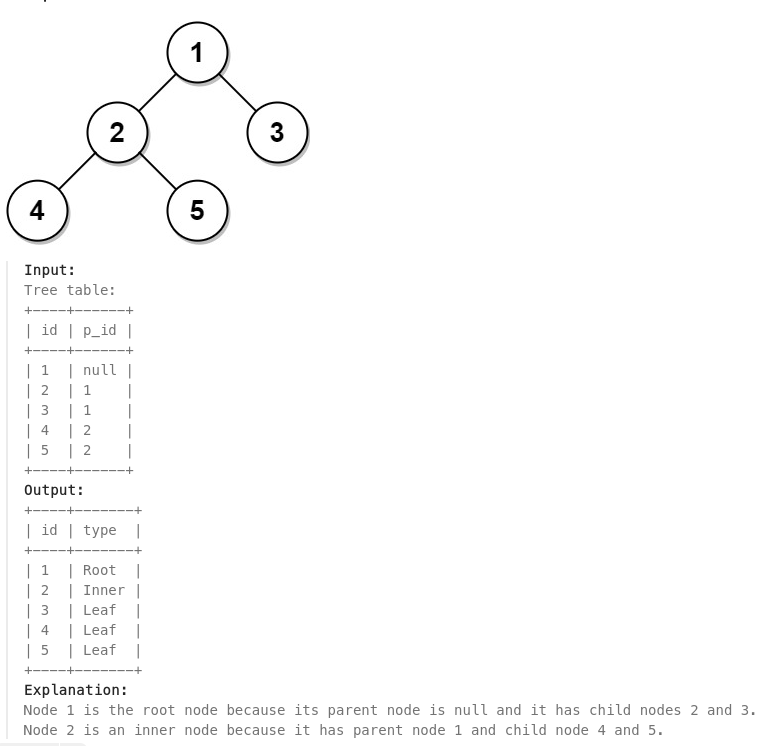

In [ ]:
duckdb.query("""
select id, case
when p_id is NUll then 'Root'
when p_id is not Null and id not in (select COALESCE(p_id, 0) from Tree) then 'Leaf'
else 'Inner'
end as type from Tree
""")

┌───────┬─────────┐
│  id   │  type   │
│ int64 │ varchar │
├───────┼─────────┤
│     1 │ Root    │
│     2 │ Inner   │
│     3 │ Leaf    │
│     4 │ Leaf    │
│     5 │ Leaf    │
└───────┴─────────┘

103. LEFT JOIN with preservation

SQL task
Return all users and their total order amount in 2024. Users with no orders should appear with 0.

In [ ]:
import pandas as pd


users = pd.DataFrame({
'user_id': [1, 2, 3, 4],
'signup_date': ['2023-12-01', '2024-01-15', '2024-03-20', '2024-06-01']
})


orders = pd.DataFrame({
'order_id': [101, 102, 103, 104],
'user_id': [1, 1, 2, 1],
'order_date': ['2024-01-10', '2024-02-05', '2024-02-20', '2023-12-15'],
'amount': [50, 25, 40, 100]
})

users, orders

(   user_id signup_date
 0        1  2023-12-01
 1        2  2024-01-15
 2        3  2024-03-20
 3        4  2024-06-01,
    order_id  user_id  order_date  amount
 0       101        1  2024-01-10      50
 1       102        1  2024-02-05      25
 2       103        2  2024-02-20      40
 3       104        1  2023-12-15     100)

In [ ]:
duckdb.query("""
select sum(amount) as total_order_amount from users l_t left join orders r_t on l_t.user_id = r_t.user_id where YEAR(DATE(order_date)) = 2024
""")

┌────────────────────┐
│ total_order_amount │
│       int128       │
├────────────────────┤
│                115 │
└────────────────────┘

104. Cardinality explosion

SQL task
Identify customers where joining to transactions creates multiple rows per customer.

In [ ]:
customers = pd.DataFrame({
'customer_id': [1, 2, 3],
'name': ['Alice', 'Bob', 'Carol']
})


transactions = pd.DataFrame({
'transaction_id': [201, 202, 203, 204, 205],
'customer_id': [1, 1, 1, 2, 2],
'amount': [10, 20, 30, 15, 25]
})

customers, transactions

(   customer_id   name
 0            1  Alice
 1            2    Bob
 2            3  Carol,
    transaction_id  customer_id  amount
 0             201            1      10
 1             202            1      20
 2             203            1      30
 3             204            2      15
 4             205            2      25)

In [ ]:
duckdb.query("""
with join_tbl as (select t_1.customer_id from customers t_1 left join transactions t_2 on t_1.customer_id = t_2.customer_id)
select customer_id, count(*) as transaction_count from join_tbl group by customer_id having count(*) > 1
""")

┌─────────────┬───────────────────┐
│ customer_id │ transaction_count │
│    int64    │       int64       │
├─────────────┼───────────────────┤
│           2 │                 2 │
│           1 │                 3 │
└─────────────┴───────────────────┘

105. LEFT JOIN filter placement

SQL task
Return all users and their March 2024 orders only. Users without March orders must still appear.

In [ ]:
users = pd.DataFrame({'user_id': [1, 2, 3]})


orders = pd.DataFrame({
'order_id': [301, 302, 303],
'user_id': [1, 1, 2],
'order_date': ['2024-03-01', '2024-04-01', '2024-03-15']
})

users, orders

(   user_id
 0        1
 1        2
 2        3,
    order_id  user_id  order_date
 0       301        1  2024-03-01
 1       302        1  2024-04-01
 2       303        2  2024-03-15)

In [ ]:
duckdb.query("""
select u.user_id, o.order_id from users u left join orders o on u.user_id = o.user_id where MONTH(DATE(o.order_date)) is Null or MONTH(DATE(o.order_date)) = 3
""")

┌─────────┬──────────┐
│ user_id │ order_id │
│  int64  │  int64   │
├─────────┼──────────┤
│       1 │      301 │
│       2 │      303 │
│       3 │     NULL │
└─────────┴──────────┘

106. COUNT and NULLs

SQL task
Return:

total rows

non-null prices

total revenue

In [ ]:
products = pd.DataFrame({
'product_id': [1, 2, 3, 4],
'price': [10, None, 20, None]
})

products

,product_id,price
0,1,10.0
1,2,NaN
2,3,20.0
3,4,NaN


In [ ]:
duckdb.query("""
select count(*) as row_count, sum(case when price is not Null then 1 else 0 end) as non_null_prices, sum(price) as total_revenue from products
""")

┌───────────┬─────────────────┬───────────────┐
│ row_count │ non_null_prices │ total_revenue │
│   int64   │     int128      │    double     │
├───────────┼─────────────────┼───────────────┤
│         4 │               2 │          30.0 │
└───────────┴─────────────────┴───────────────┘

107. NOT IN vs NOT EXISTS

SQL task
Return users who have not placed any orders.

In [ ]:
users = pd.DataFrame({'user_id': [1, 2, 3, 4]})


orders = pd.DataFrame({
'order_id': [401, 402],
'user_id': [2, None]
})

users, orders

(   user_id
 0        1
 1        2
 2        3
 3        4,
    order_id  user_id
 0       401      2.0
 1       402      NaN)

In [ ]:
duckdb.query("""
select user_id from users where user_id not in (select COALESCE(user_id, 0) from orders)
""")

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
│       3 │
│       4 │
└─────────┘

108. Proper grouping

SQL task
Return daily revenue per store.

In [ ]:
sales = pd.DataFrame({
'store_id': [1, 1, 1, 2, 2],
'sale_date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-01', '2024-01-02'],
'revenue': [100, 50, 75, 80, 120]
})

sales

,store_id,sale_date,revenue
0,1,2024-01-01,100
1,1,2024-01-01,50
2,1,2024-01-02,75
3,2,2024-01-01,80
4,2,2024-01-02,120


In [ ]:
duckdb.query("""
select store_id, sale_date, sum(revenue) as daily_revenue from sales group by store_id, sale_date order by store_id, sale_date
""")

┌──────────┬────────────┬───────────────┐
│ store_id │ sale_date  │ daily_revenue │
│  int64   │  varchar   │    int128     │
├──────────┼────────────┼───────────────┤
│        1 │ 2024-01-01 │           150 │
│        1 │ 2024-01-02 │            75 │
│        2 │ 2024-01-01 │            80 │
│        2 │ 2024-01-02 │           120 │
└──────────┴────────────┴───────────────┘

109. Aggregate filtering

SQL task
Return users with more than 2 orders.

In [ ]:
orders = pd.DataFrame({
'order_id': [1, 2, 3, 4, 5, 6],
'user_id': [1, 1, 1, 2, 2, 3]
})

orders

,order_id,user_id
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
5,6,3


In [ ]:
duckdb.query("""
select user_id, count(order_id) as order_count from orders group by user_id having count(order_id) > 2
""")

┌─────────┬─────────────┐
│ user_id │ order_count │
│  int64  │    int64    │
├─────────┼─────────────┤
│       1 │           3 │
└─────────┴─────────────┘

110. Preserve row-level detail

SQL task
For each order, show the order amount and the user’s total lifetime spend.

In [ ]:
orders = pd.DataFrame({
'order_id': [501, 502, 503, 504],
'user_id': [1, 1, 2, 2],
'amount': [20, 30, 40, 10]
})

orders

,order_id,user_id,amount
0,501,1,20
1,502,1,30
2,503,2,40
3,504,2,10


In [ ]:
duckdb.query("""
select *, sum(amount) over(partition by user_id) as lifetime_amount from orders
""")

┌──────────┬─────────┬────────┬─────────────────┐
│ order_id │ user_id │ amount │ lifetime_amount │
│  int64   │  int64  │ int64  │     int128      │
├──────────┼─────────┼────────┼─────────────────┤
│      501 │       1 │     20 │              50 │
│      502 │       1 │     30 │              50 │
│      503 │       2 │     40 │              50 │
│      504 │       2 │     10 │              50 │
└──────────┴─────────┴────────┴─────────────────┘

111. Multiple metrics in one query

SQL task
For each day return:

total users

paying users

total revenue

In [ ]:
events = pd.DataFrame({
'user_id': [1, 2, 3, 1, 2],
'event_date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02'],
'amount': [10, None, None, 20, None]
})

events

,user_id,event_date,amount
0,1,2024-05-01,10.0
1,2,2024-05-01,NaN
2,3,2024-05-01,NaN
3,1,2024-05-02,20.0
4,2,2024-05-02,NaN


In [ ]:
duckdb.query("""
select event_date, count(user_id) as total_users, sum(case when amount is not Null then 1 else 0 end) as paying_users, sum(amount) as total_revenue from events group by event_date
""")

┌────────────┬─────────────┬──────────────┬───────────────┐
│ event_date │ total_users │ paying_users │ total_revenue │
│  varchar   │    int64    │    int128    │    double     │
├────────────┼─────────────┼──────────────┼───────────────┤
│ 2024-05-01 │           3 │            1 │          10.0 │
│ 2024-05-02 │           2 │            1 │          20.0 │
└────────────┴─────────────┴──────────────┴───────────────┘

112. Keep latest record per user

SQL task
Return the latest status per user.

In [ ]:
user_status = pd.DataFrame({
'user_id': [1, 1, 2, 2, 3],
'status': ['active', 'inactive', 'active', 'suspended', 'active'],
'updated_at': ['2024-01-01', '2024-03-01', '2024-02-01', '2024-02-01', '2024-01-15']
})

user_status

,user_id,status,updated_at
0,1,active,2024-01-01
1,1,inactive,2024-03-01
2,2,active,2024-02-01
3,2,suspended,2024-02-01
4,3,active,2024-01-15


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over(partition by user_id order by updated_at desc) as row_num from user_status)
select * from sub_query
""")

┌─────────┬───────────┬────────────┬─────────┐
│ user_id │  status   │ updated_at │ row_num │
│  int64  │  varchar  │  varchar   │  int64  │
├─────────┼───────────┼────────────┼─────────┤
│       3 │ active    │ 2024-01-15 │       1 │
│       1 │ inactive  │ 2024-03-01 │       1 │
│       1 │ active    │ 2024-01-01 │       2 │
│       2 │ active    │ 2024-02-01 │       1 │
│       2 │ suspended │ 2024-02-01 │       2 │
└─────────┴───────────┴────────────┴─────────┘

In [ ]:
duckdb.query("""
with sub_query as (select *, count(*) over(partition by user_id) - row_number() over(partition by user_id) as row_num from user_status)
select user_id, status from sub_query where row_num = 0
""")

┌─────────┬───────────┐
│ user_id │  status   │
│  int64  │  varchar  │
├─────────┼───────────┤
│       1 │ inactive  │
│       3 │ active    │
│       2 │ suspended │
└─────────┴───────────┘

113. Day-over-day change

SQL task
Return daily revenue and day-over-day change.

In [ ]:
daily_revenue = pd.DataFrame({
'date': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04'],
'revenue': [100, 120, 90, 150]
})

daily_revenue

,date,revenue
0,2024-06-01,100
1,2024-06-02,120
2,2024-06-03,90
3,2024-06-04,150


In [ ]:
duckdb.query("""
select date, revenue, revenue - lag(revenue, 1, Null) over() as change from daily_revenue
""")

┌────────────┬─────────┬────────┐
│    date    │ revenue │ change │
│  varchar   │  int64  │ int64  │
├────────────┼─────────┼────────┤
│ 2024-06-01 │     100 │   NULL │
│ 2024-06-02 │     120 │     20 │
│ 2024-06-03 │      90 │    -30 │
│ 2024-06-04 │     150 │     60 │
└────────────┴─────────┴────────┘

114. Signup cohort activity

SQL task
Group users by signup month and count how many placed an order in that same month.

In [ ]:
users = pd.DataFrame({
'user_id': [1, 2, 3, 4],
'signup_date': ['2024-01-10', '2024-01-20', '2024-02-05', '2024-02-18']
})


orders = pd.DataFrame({
'user_id': [1, 1, 2, 3, 4],
'order_date': ['2024-01-15', '2024-02-01', '2024-01-25', '2024-02-20', '2024-03-01']
})

users, orders

(   user_id signup_date
 0        1  2024-01-10
 1        2  2024-01-20
 2        3  2024-02-05
 3        4  2024-02-18,
    user_id  order_date
 0        1  2024-01-15
 1        1  2024-02-01
 2        2  2024-01-25
 3        3  2024-02-20
 4        4  2024-03-01)

In [ ]:
duckdb.query("""
with sub_query as (select u.user_id, u.signup_date, substring(signup_date, 0, 8) as signup_month, o.order_date, substring(order_date, 0, 8) as order_month from users u left join orders o on u.user_id = o.user_id)
select signup_month, count(user_id) as active_users from sub_query where signup_month = order_month group by signup_month
""")

┌──────────────┬──────────────┐
│ signup_month │ active_users │
│   varchar    │    int64     │
├──────────────┼──────────────┤
│ 2024-02      │            1 │
│ 2024-01      │            2 │
└──────────────┴──────────────┘

115. Funnel conversion

SQL task
Calculate user counts at each step in order: visit → signup → purchase.

In [ ]:
import pandas as pd
import duckdb

events = pd.DataFrame({
'user_id': [1, 1, 1, 2, 2, 3, 3],
'event_type': ['visit', 'signup', 'purchase', 'visit', 'signup', 'visit', 'purchase'],
'event_time': ['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-01', '2024-07-02', '2024-07-01', '2024-07-02']
})

events

,user_id,event_type,event_time
0,1,visit,2024-07-01
1,1,signup,2024-07-02
2,1,purchase,2024-07-03
3,2,visit,2024-07-01
4,2,signup,2024-07-02
5,3,visit,2024-07-01
6,3,purchase,2024-07-02


In [ ]:
duckdb.query("""
with visit_tbl as (select distinct e1.user_id from events e1 inner join events e2 on e1.user_id = e1.user_id where e1.event_type = 'visit'),
signup_tbl as (select distinct e1.user_id from visit_tbl v inner join events e1 on e1.user_id = v.user_id where e1.event_type = 'signup'),
purchase_tbl as (select distinct e1.user_id from signup_tbl s inner join events e1 on e1.user_id = s.user_id where e1.event_type = 'purchase')
select 'visit' as step, COUNT(*) as user_count from visit_tbl
  union
select 'signup' as step, COUNT(*) as user_count from signup_tbl
  union
select 'purchase' as step, COUNT(*) as user_count from purchase_tbl
order by user_count desc
""")

┌──────────┬────────────┐
│   step   │ user_count │
│ varchar  │   int64    │
├──────────┼────────────┤
│ visit    │          3 │
│ signup   │          2 │
│ purchase │          1 │
└──────────┴────────────┘

116. LEFT JOIN with preservation

SQL task
Return all users and their total order amount in 2024. Users with no orders should appear with 0.

In [ ]:
import pandas as pd
import duckdb

users = pd.DataFrame({
'user_id': [1, 2, 3, 4],
'signup_date': ['2023-12-01', '2024-01-15', '2024-03-20', '2024-06-01']
})


orders = pd.DataFrame({
'order_id': [101, 102, 103, 104],
'user_id': [1, 1, 2, 1],
'order_date': ['2024-01-10', '2024-02-05', '2024-02-20', '2023-12-15'],
'amount': [50, 25, 40, 100]
})

users, orders

(   user_id signup_date
 0        1  2023-12-01
 1        2  2024-01-15
 2        3  2024-03-20
 3        4  2024-06-01,
    order_id  user_id  order_date  amount
 0       101        1  2024-01-10      50
 1       102        1  2024-02-05      25
 2       103        2  2024-02-20      40
 3       104        1  2023-12-15     100)

In [ ]:
duckdb.query("""
with sub_tbl as (select u.user_id, o.amount, o.order_date from users u left join orders o on u.user_id = o.user_id)
select user_id, sum(case when YEAR(DATE(order_date)) = 2024 then amount else Null end) as total_amount_2024 from sub_tbl group by user_id order by user_id
""")

┌─────────┬───────────────────┐
│ user_id │ total_amount_2024 │
│  int64  │      int128       │
├─────────┼───────────────────┤
│       1 │                75 │
│       2 │                40 │
│       3 │              NULL │
│       4 │              NULL │
└─────────┴───────────────────┘

117. Cardinality explosion again

Identify customers where joining to transactions creates multiple rows per customer.

In [ ]:
customers = pd.DataFrame({
'customer_id': [1, 2, 3],
'name': ['Alice', 'Bob', 'Carol']
})


transactions = pd.DataFrame({
'transaction_id': [201, 202, 203, 204, 205],
'customer_id': [1, 1, 1, 2, 2],
'amount': [10, 20, 30, 15, 25]
})

customers, transactions

(   customer_id   name
 0            1  Alice
 1            2    Bob
 2            3  Carol,
    transaction_id  customer_id  amount
 0             201            1      10
 1             202            1      20
 2             203            1      30
 3             204            2      15
 4             205            2      25)

In [ ]:
duckdb.query("""
with sub_table as (select c.customer_id, t.transaction_id from customers c left join transactions t on c.customer_id = t.customer_id)
select customer_id, count(transaction_id) as transaction_count from sub_table group by customer_id having count(transaction_id) > 1
""")

┌─────────────┬───────────────────┐
│ customer_id │ transaction_count │
│    int64    │       int64       │
├─────────────┼───────────────────┤
│           1 │                 3 │
│           2 │                 2 │
└─────────────┴───────────────────┘

118. Day-over-day change

Return daily revenue and day-over-day change.

In [ ]:
daily_revenue = pd.DataFrame({
'date': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04'],
'revenue': [100, 120, 90, 150]
})

daily_revenue

,date,revenue
0,2024-06-01,100
1,2024-06-02,120
2,2024-06-03,90
3,2024-06-04,150


In [ ]:
duckdb.query("""
select *, lag(revenue, 1, Null) over() as previous_day_revenue, revenue - lag(revenue, 1, Null) over() as  revenue_delta  from daily_revenue
""")

┌────────────┬─────────┬──────────────────────┬───────────────┐
│    date    │ revenue │ previous_day_revenue │ revenue_delta │
│  varchar   │  int64  │        int64         │     int64     │
├────────────┼─────────┼──────────────────────┼───────────────┤
│ 2024-06-01 │     100 │                 NULL │          NULL │
│ 2024-06-02 │     120 │                  100 │            20 │
│ 2024-06-03 │      90 │                  120 │           -30 │
│ 2024-06-04 │     150 │                   90 │            60 │
└────────────┴─────────┴──────────────────────┴───────────────┘

119. Signup cohort activity

Group users by signup month and count how many placed an order in that same month.

In [ ]:
users = pd.DataFrame({
'user_id': [1, 2, 3, 4],
'signup_date': ['2024-01-10', '2024-01-20', '2024-02-05', '2024-02-18']
})


orders = pd.DataFrame({
'user_id': [1, 1, 2, 3, 4],
'order_date': ['2024-01-15', '2024-02-01', '2024-01-25', '2024-02-20', '2024-03-01']
})

users, orders

(   user_id signup_date
 0        1  2024-01-10
 1        2  2024-01-20
 2        3  2024-02-05
 3        4  2024-02-18,
    user_id  order_date
 0        1  2024-01-15
 1        1  2024-02-01
 2        2  2024-01-25
 3        3  2024-02-20
 4        4  2024-03-01)

In [ ]:
duckdb.query("""
with sub_table as (select u.user_id, substring(u.signup_date, 0, 8) as signup_month, substring(o.order_date, 0, 8) as order_month from users u left join orders o on u.user_id = o.user_id where substring(u.signup_date, 0, 8) = substring(o.order_date, 0, 8))
select signup_month, count(*) as active_users from sub_table group by signup_month order by signup_month
""")

┌──────────────┬──────────────┐
│ signup_month │ active_users │
│   varchar    │    int64     │
├──────────────┼──────────────┤
│ 2024-01      │            2 │
│ 2024-02      │            1 │
└──────────────┴──────────────┘

120. Forward-fill missing values within a group

Each account_id has exactly one non-null credit_limit. Fill that value for all rows of the account.

In [ ]:
accounts = pd.DataFrame({
'account_id': [1, 1, 1, 2, 2, 2],
'event_date': ['2024-01-01', '2024-01-05', '2024-01-10', '2024-01-01', '2024-01-03', '2024-01-08'],
'credit_limit': [None, 5000, None, None, None, 3000]
})

accounts

,account_id,event_date,credit_limit
0,1,2024-01-01,NaN
1,1,2024-01-05,5000.0
2,1,2024-01-10,NaN
3,2,2024-01-01,NaN
4,2,2024-01-03,NaN
5,2,2024-01-08,3000.0


In [ ]:
duckdb.query("""
select account_id, event_date, min(credit_limit) over(partition by account_id) as credit_limit from accounts order by account_id, event_date
""")

┌────────────┬────────────┬──────────────┐
│ account_id │ event_date │ credit_limit │
│   int64    │  varchar   │    double    │
├────────────┼────────────┼──────────────┤
│          1 │ 2024-01-01 │       5000.0 │
│          1 │ 2024-01-05 │       5000.0 │
│          1 │ 2024-01-10 │       5000.0 │
│          2 │ 2024-01-01 │       3000.0 │
│          2 │ 2024-01-03 │       3000.0 │
│          2 │ 2024-01-08 │       3000.0 │
└────────────┴────────────┴──────────────┘

121. Backward-fill missing values

Fill missing status values using the next known value in time within each user.

In [ ]:
user_status = pd.DataFrame({
'user_id': [1, 1, 1, 2, 2],
'status_date': ['2024-02-01', '2024-02-05', '2024-02-10', '2024-02-01', '2024-02-10'],
'status': [None, 'active', None, None, 'inactive']
})

user_status

,user_id,status_date,status
0,1,2024-02-01,None
1,1,2024-02-05,active
2,1,2024-02-10,None
3,2,2024-02-01,None
4,2,2024-02-10,inactive


In [ ]:
duckdb.query("""
SELECT
    user_id,
    status_date,
    FIRST_VALUE(status IGNORE NULLS) OVER (
        ROWS BETWEEN CURRENT ROW and 1 FOLLOWING
    ) AS backward_filled_column
FROM
    user_status
""")

┌─────────┬─────────────┬────────────────────────┐
│ user_id │ status_date │ backward_filled_column │
│  int64  │   varchar   │        varchar         │
├─────────┼─────────────┼────────────────────────┤
│       1 │ 2024-02-01  │ active                 │
│       1 │ 2024-02-05  │ active                 │
│       1 │ 2024-02-10  │ NULL                   │
│       2 │ 2024-02-01  │ inactive               │
│       2 │ 2024-02-10  │ inactive               │
└─────────┴─────────────┴────────────────────────┘

122. Rolling average with missing dates

Calculate a 3-day rolling average revenue per store. Missing days should still be considered in the window.

In [ ]:
daily_sales = pd.DataFrame({
'store_id': [1, 1, 1, 2, 2],
'sale_date': ['2024-04-01', '2024-04-03', '2024-04-04', '2024-04-01', '2024-04-04'],
'revenue': [100, 300, 200, 80, 120]
})

daily_sales

,store_id,sale_date,revenue
0,1,2024-04-01,100
1,1,2024-04-03,300
2,1,2024-04-04,200
3,2,2024-04-01,80
4,2,2024-04-04,120


123. Gap detection with LAG

Identify date gaps greater than 1 day per user.

In [ ]:
logins = pd.DataFrame({
'user_id': [1, 1, 1, 2, 2],
'login_date': ['2024-05-01', '2024-05-02', '2024-05-05', '2024-05-01', '2024-05-04']
})

logins

,user_id,login_date
0,1,2024-05-01
1,1,2024-05-02
2,1,2024-05-05
3,2,2024-05-01
4,2,2024-05-04


In [ ]:
duckdb.query("""
with sub_query as (select user_id, login_date, DATE(login_date) - DATE(lag(login_date, 1, NULL) over(partition by user_id)) as days_lag,  DATE(lead(login_date, 1, NULL) over(partition by user_id)) - DATE(login_date) as days_lead from logins),
sub_sub_query as (select user_id, login_date, days_lag, dense_rank() over(partition by user_id order by days_lag desc) as lag_order, days_lead, dense_rank() over(partition by user_id order by days_lead desc) as lead_order from sub_query),
top_lag as (select user_id, login_date, days_lag from sub_sub_query where lag_order = 1),
top_lead as (select user_id, login_date, days_lead  from sub_sub_query where lead_order = 1),
union_tbl as (select * from top_lag
UNION
select * from top_lead
order by user_id, login_date),
pre_final_tbl as (select user_id, login_date, dense_rank() over(partition by user_id order by login_date) as date_order, days_lag from union_tbl)
select user_id, max(case when date_order = 1 then login_date else Null end) as gap_start, max(case when date_order = 2 then login_date else Null end) as gap_end, max(days_lag) as gap_days from pre_final_tbl group by user_id order by user_id
""")

┌─────────┬────────────┬────────────┬──────────┐
│ user_id │ gap_start  │  gap_end   │ gap_days │
│  int64  │  varchar   │  varchar   │  int64   │
├─────────┼────────────┼────────────┼──────────┤
│       1 │ 2024-05-02 │ 2024-05-05 │        3 │
│       2 │ 2024-05-01 │ 2024-05-04 │        3 │
└─────────┴────────────┴────────────┴──────────┘

124. Last-value carry-forward

Fill missing rate values using the most recent non-null value within each currency.

In [ ]:
fx_rates = pd.DataFrame({
'currency': ['USD', 'USD', 'USD', 'EUR', 'EUR'],
'rate_date': ['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-01', '2024-07-03'],
'rate': [1.0, None, 1.1, 0.9, None]
})

fx_rates

,currency,rate_date,rate
0,USD,2024-07-01,1.0
1,USD,2024-07-02,NaN
2,USD,2024-07-03,1.1
3,EUR,2024-07-01,0.9
4,EUR,2024-07-03,NaN


In [ ]:
duckdb.query("""
select currency, rate_date, case when rate is Null then lag(rate, 1, 0) over(partition by currency) else rate end as filled_rate from fx_rates
""")

┌──────────┬────────────┬─────────────┐
│ currency │ rate_date  │ filled_rate │
│ varchar  │  varchar   │   double    │
├──────────┼────────────┼─────────────┤
│ USD      │ 2024-07-01 │         1.0 │
│ USD      │ 2024-07-02 │         1.0 │
│ USD      │ 2024-07-03 │         1.1 │
│ EUR      │ 2024-07-01 │         0.9 │
│ EUR      │ 2024-07-03 │         0.9 │
└──────────┴────────────┴─────────────┘

125. Cumulative max with NULL handling

For each user, calculate the running maximum balance, ignoring NULLs.

In [ ]:
balances = pd.DataFrame({
'user_id': [1, 1, 1, 2, 2],
'balance_date': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-01', '2024-06-02'],
'balance': [100, None, 150, None, 200]
})

balances

,user_id,balance_date,balance
0,1,2024-06-01,100.0
1,1,2024-06-02,NaN
2,1,2024-06-03,150.0
3,2,2024-06-01,NaN
4,2,2024-06-02,200.0


In [ ]:
duckdb.query("""
select user_id, balance_date, balance, sum(balance) over(partition by user_id rows between unbounded preceding and current row) as running_max_balance from balances order by user_id, balance_date
""")

┌─────────┬──────────────┬─────────┬─────────────────────┐
│ user_id │ balance_date │ balance │ running_max_balance │
│  int64  │   varchar    │ double  │       double        │
├─────────┼──────────────┼─────────┼─────────────────────┤
│       1 │ 2024-06-01   │   100.0 │               100.0 │
│       1 │ 2024-06-02   │    NULL │               100.0 │
│       1 │ 2024-06-03   │   150.0 │               250.0 │
│       2 │ 2024-06-01   │    NULL │                NULL │
│       2 │ 2024-06-02   │   200.0 │               200.0 │
└─────────┴──────────────┴─────────┴─────────────────────┘

126. Exchange Seats

Write a solution to swap the seat id of every two consecutive students. If the number of students is odd, the id of the last student is not swapped.

Return the result table ordered by id in ascending order.

In [ ]:
import pandas as pd
import duckdb

seat = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'student': ['Abbot', 'Doris', 'Emerson', 'Green', 'Jeames']
})

seat

,id,student
0,1,Abbot
1,2,Doris
2,3,Emerson
3,4,Green
4,5,Jeames


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over(order by id) as row_num from seat),
sub_sub_query as (select *, (row_num + 1) // 2 as group_num from sub_query),
even_tbl as (select * from sub_sub_query where group_num in (select group_num from sub_sub_query group by group_num having count(group_num) = 2)),
odd_tbl as (select * from sub_sub_query where group_num in (select group_num from sub_sub_query group by group_num having count(group_num) = 1)),
even_tbl_switched as (select id, student, row_num, group_num, case when row_num % 2 = 1 then lead(student, 1, 0) over(partition by group_num order by row_num) else lag(student, 1, 0) over(partition by group_num order by row_num) end as updated_names from even_tbl order by id)
select id, updated_names as student from even_tbl_switched
UNION
select id, student from odd_tbl
order by id
""")

┌───────┬─────────┐
│  id   │ student │
│ int64 │ varchar │
├───────┼─────────┤
│     1 │ Doris   │
│     2 │ Abbot   │
│     3 │ Green   │
│     4 │ Emerson │
│     5 │ Jeames  │
└───────┴─────────┘

In [ ]:
try:
  duckdb.query("""
    with sub_query as (select *, row_number() over(order by id) as row_num from seat),
  sub_sub_query as (select *, (row_num + 1) DIV 2 as group_num from sub_query),
  even_tbl as (select * from sub_sub_query where group_num in (select group_num from sub_sub_query group by group_num having count(group_num) = 2)),
  odd_tbl as (select * from sub_sub_query where group_num in (select group_num from sub_sub_query group by group_num having count(group_num) = 1)),
  even_tbl_switched as (select id, student, row_num, group_num, case when row_num % 2 = 1 then lead(student, 1, 0) over(partition by group_num) else lag(student, 1, 0) over(partition by group_num) end as updated_names from even_tbl order by id)
  select id, updated_names as student from even_tbl_switched
  UNION
  select id, student from odd_tbl
  order by id
  """)
except:
  print("Sorry, this works in MySQL")

Sorry, this works in MySQL


In [ ]:
duckdb.query("""
SELECT
  CASE
    WHEN id % 2 = 1 AND id < (SELECT MAX(id) FROM seat)
         THEN id + 1
    WHEN id % 2 = 0
         THEN id - 1
    ELSE id
  END AS id,
  student
FROM seat
ORDER BY id;
""")

┌───────┬─────────┐
│  id   │ student │
│ int64 │ varchar │
├───────┼─────────┤
│     1 │ Doris   │
│     2 │ Abbot   │
│     3 │ Green   │
│     4 │ Emerson │
│     5 │ Jeames  │
└───────┴─────────┘

127. Rank salaries within each department

In [ ]:
import pandas as pd
import duckdb

employees = pd.DataFrame({
    "emp_id": [1, 2, 3, 4, 5],
    "department": ["IT", "IT", "HR", "HR", "HR"],
    "salary": [100000, 90000, 80000, 80000, 70000]
})

employees

,emp_id,department,salary
0,1,IT,100000
1,2,IT,90000
2,3,HR,80000
3,4,HR,80000
4,5,HR,70000


In [ ]:
duckdb.query("""
select *, dense_rank() over(partition by department order by salary) as salary_rank from employees order by emp_id
""")

┌────────┬────────────┬────────┬─────────────┐
│ emp_id │ department │ salary │ salary_rank │
│ int64  │  varchar   │ int64  │    int64    │
├────────┼────────────┼────────┼─────────────┤
│      1 │ IT         │ 100000 │           2 │
│      2 │ IT         │  90000 │           1 │
│      3 │ HR         │  80000 │           2 │
│      4 │ HR         │  80000 │           2 │
│      5 │ HR         │  70000 │           1 │
└────────┴────────────┴────────┴─────────────┘

128. Running total of daily sales

In [ ]:
sales = pd.DataFrame({
    "sale_date": pd.to_datetime([
        "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04"
    ]),
    "amount": [100, 150, 200, 50]
})

sales

,sale_date,amount
0,2024-01-01,100
1,2024-01-02,150
2,2024-01-03,200
3,2024-01-04,50


In [ ]:
duckdb.query("""
select *, sum(amount) over(rows between unbounded preceding and current row) as running_sum from sales
""")

┌─────────────────────┬────────┬─────────────┐
│      sale_date      │ amount │ running_sum │
│    timestamp_ns     │ int64  │   int128    │
├─────────────────────┼────────┼─────────────┤
│ 2024-01-01 00:00:00 │    100 │         100 │
│ 2024-01-02 00:00:00 │    150 │         250 │
│ 2024-01-03 00:00:00 │    200 │         450 │
│ 2024-01-04 00:00:00 │     50 │         500 │
└─────────────────────┴────────┴─────────────┘

129. Top 2 earners per department

In [ ]:
employees = pd.DataFrame({
    "name": ["Alice", "Bob", "Carol", "Dave", "Eve"],
    "dept": ["IT", "IT", "IT", "HR", "HR"],
    "salary": [120000, 120000, 90000, 85000, 80000]
})

employees

,name,dept,salary
0,Alice,IT,120000
1,Bob,IT,120000
2,Carol,IT,90000
3,Dave,HR,85000
4,Eve,HR,80000


In [ ]:
duckdb.query("""
with sub_query as (select dept, name, salary, dense_rank() over(partition by dept order by salary desc) as salary_rank from employees)
select * from sub_query where salary_rank < 3
""")

┌─────────┬─────────┬────────┬─────────────┐
│  dept   │  name   │ salary │ salary_rank │
│ varchar │ varchar │ int64  │    int64    │
├─────────┼─────────┼────────┼─────────────┤
│ IT      │ Alice   │ 120000 │           1 │
│ IT      │ Bob     │ 120000 │           1 │
│ IT      │ Carol   │  90000 │           2 │
│ HR      │ Dave    │  85000 │           1 │
│ HR      │ Eve     │  80000 │           2 │
└─────────┴─────────┴────────┴─────────────┘

130. Previous day comparison (LAG)

In [ ]:
import pandas as pd
import duckdb

prices = pd.DataFrame({
    "date": pd.to_datetime([
        "2024-01-01", "2024-01-02", "2024-01-03"
    ]),
    "price": [10, 12, 11]
})

prices

,date,price
0,2024-01-01,10
1,2024-01-02,12
2,2024-01-03,11


In [ ]:
duckdb.query("""
select *, lag(price, 1, 0) over() as lagged_price from prices
""")

┌─────────────────────┬───────┬──────────────┐
│        date         │ price │ lagged_price │
│    timestamp_ns     │ int64 │    int64     │
├─────────────────────┼───────┼──────────────┤
│ 2024-01-01 00:00:00 │    10 │            0 │
│ 2024-01-02 00:00:00 │    12 │           10 │
│ 2024-01-03 00:00:00 │    11 │           12 │
└─────────────────────┴───────┴──────────────┘

131. First and last value per group

In [ ]:
orders = pd.DataFrame({
    "customer_id": [1, 1, 1, 2, 2],
    "order_date": pd.to_datetime([
        "2024-01-01", "2024-01-05", "2024-01-10",
        "2024-02-01", "2024-02-03"
    ]),
    "amount": [50, 75, 100, 200, 150]
})

orders

,customer_id,order_date,amount
0,1,2024-01-01,50
1,1,2024-01-05,75
2,1,2024-01-10,100
3,2,2024-02-01,200
4,2,2024-02-03,150


In [ ]:
duckdb.query("""
select customer_id, first(amount) as first_amount, last(amount) as last_amount from orders group by customer_id order by customer_id
""")

┌─────────────┬──────────────┬─────────────┐
│ customer_id │ first_amount │ last_amount │
│    int64    │    int64     │    int64    │
├─────────────┼──────────────┼─────────────┤
│           1 │           50 │         100 │
│           2 │          200 │         150 │
└─────────────┴──────────────┴─────────────┘

132. Fill missing dates per group (classic window problem)

In [ ]:
events = pd.DataFrame({
    "user_id": [1, 1, 1, 2, 2, 2],
    "event_date": pd.to_datetime([
        "2024-01-01", "2024-01-03", "2024-01-06",
        "2024-01-02", "2024-01-05", "2024-01-06"
    ]),
    "status": ["active", None, "inactive", "active", None, None]
})

events

,user_id,event_date,status
0,1,2024-01-01,active
1,1,2024-01-03,None
2,1,2024-01-06,inactive
3,2,2024-01-02,active
4,2,2024-01-05,None
5,2,2024-01-06,None


In [ ]:
duckdb.query("""
select *, last(status ignore nulls) over(partition by user_id ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) from events order by user_id, event_date
""")

┌─────────┬─────────────────────┬──────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ user_id │     event_date      │  status  │ last(status IGNORE NULLS) OVER (PARTITION BY user_id ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) │
│  int64  │    timestamp_ns     │ varchar  │                                                varchar                                                 │
├─────────┼─────────────────────┼──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       1 │ 2024-01-01 00:00:00 │ active   │ active                                                                                                 │
│       1 │ 2024-01-03 00:00:00 │ NULL     │ active                                                                                                 │
│       1 │ 2024-01-06 00:00:00 │ inactive │ inactive                                               

133. Consecutive days streak

In [ ]:
logins = pd.DataFrame({
    "user_id": [1, 1, 1, 1, 2, 2],
    "login_date": pd.to_datetime([
        "2024-01-01", "2024-01-02", "2024-01-04", "2024-01-05",
        "2024-01-01", "2024-01-03"
    ])
})

logins

,user_id,login_date
0,1,2024-01-01
1,1,2024-01-02
2,1,2024-01-04
3,1,2024-01-05
4,2,2024-01-01
5,2,2024-01-03


In [ ]:
duckdb.query("""
with ranked_data as (select *, row_number() over(partition by user_id order by login_date) as rn from logins),
StreakGroup as (select *, DAY(login_date) - rn as grouping_date from ranked_data)
SELECT
    user_id,
    COUNT(*) AS streak_length -- Count the entries in each group
FROM
    StreakGroup
GROUP BY
    user_id,
    grouping_date
ORDER BY
    streak_length DESC;
""")

┌─────────┬───────────────┐
│ user_id │ streak_length │
│  int64  │     int64     │
├─────────┼───────────────┤
│       1 │             2 │
│       1 │             2 │
│       2 │             1 │
│       2 │             1 │
└─────────┴───────────────┘

144. Percentage of total per group

In [ ]:
transactions = pd.DataFrame({
    "category": ["A", "A", "B", "B", "B"],
    "amount": [100, 300, 200, 100, 100]
})

transactions

,category,amount
0,A,100
1,A,300
2,B,200
3,B,100
4,B,100


In [ ]:
duckdb.query("""
select *, amount / sum(amount) over(partition by category) * 100 as pctg from transactions order by category
""")

┌──────────┬────────┬────────┐
│ category │ amount │  pctg  │
│ varchar  │ int64  │ double │
├──────────┼────────┼────────┤
│ A        │    100 │   25.0 │
│ A        │    300 │   75.0 │
│ B        │    200 │   50.0 │
│ B        │    100 │   25.0 │
│ B        │    100 │   25.0 │
└──────────┴────────┴────────┘

145. DNA Pattern Recognition

Biologists are studying basic patterns in DNA sequences. Write a solution to identify sample_id with the following patterns:

    Sequences that start with ATG (a common start codon)
    Sequences that end with either TAA, TAG, or TGA (stop codons)
    Sequences containing the motif ATAT (a simple repeated pattern)
    Sequences that have at least 3 consecutive G (like GGG or GGGG)

Return the result table ordered by sample_id in ascending order.

In [ ]:
import pandas as pd

dna_samples = pd.DataFrame({
    "sample_id": [1, 2, 3, 4, 5, 6, 7],
    "dna_sequence": [
        "ATGCTAGCTAGCTAA",
        "GGGTCAATCATC",
        "ATATATCGTAGCTA",
        "ATGGGGTCATCATAA",
        "TCAGTCAGTCAG",
        "ATATCGCGCTAG",
        "CGTATGCGTCGTA"
    ],
    "species": [
        "Human",
        "Human",
        "Human",
        "Mouse",
        "Mouse",
        "Zebrafish",
        "Zebrafish"
    ]
})

dna_samples

,sample_id,dna_sequence,species
0,1,ATGCTAGCTAGCTAA,Human
1,2,GGGTCAATCATC,Human
2,3,ATATATCGTAGCTA,Human
3,4,ATGGGGTCATCATAA,Mouse
4,5,TCAGTCAGTCAG,Mouse
5,6,ATATCGCGCTAG,Zebrafish
6,7,CGTATGCGTCGTA,Zebrafish


In [ ]:
duckdb.query("""
select *, case when dna_sequence like 'ATG%' then 1 else 0 end as has_start, case when dna_sequence like '%TAA' or dna_sequence like '%TAG' or dna_sequence like '%TGA' then 1 else 0 end as has_stop, case when dna_sequence like '%ATAT%' then 1 else 0 end as has_atat, case when dna_sequence like '%GGG%' then 1 else 0 end as has_ggg from dna_samples
""")

┌───────────┬─────────────────┬───────────┬───────────┬──────────┬──────────┬─────────┐
│ sample_id │  dna_sequence   │  species  │ has_start │ has_stop │ has_atat │ has_ggg │
│   int64   │     varchar     │  varchar  │   int32   │  int32   │  int32   │  int32  │
├───────────┼─────────────────┼───────────┼───────────┼──────────┼──────────┼─────────┤
│         1 │ ATGCTAGCTAGCTAA │ Human     │         1 │        1 │        0 │       0 │
│         2 │ GGGTCAATCATC    │ Human     │         0 │        0 │        0 │       1 │
│         3 │ ATATATCGTAGCTA  │ Human     │         0 │        0 │        1 │       0 │
│         4 │ ATGGGGTCATCATAA │ Mouse     │         1 │        1 │        0 │       1 │
│         5 │ TCAGTCAGTCAG    │ Mouse     │         0 │        0 │        0 │       0 │
│         6 │ ATATCGCGCTAG    │ Zebrafish │         0 │        1 │        1 │       0 │
│         7 │ CGTATGCGTCGTA   │ Zebrafish │         0 │        0 │        0 │       0 │
└───────────┴─────────────────┴─

145. Fill NULL dates between known dates (carry forward)

In [ ]:
import pandas as pd
import numpy as np
import duckdb

df = pd.DataFrame({
    "user_id": [1, 1, 1, 1, 2, 2, 2],
    "event_date": [
        "2024-01-01", None, None, "2024-01-04",
        None, "2024-02-02", None
    ],
    "activity": [
        "login", "browse", "logout",
        "login", "login", "browse", "logout"
    ]
})

df["event_date"] = pd.to_datetime(df["event_date"])

df

,user_id,event_date,activity
0,1,2024-01-01,login
1,1,NaT,browse
2,1,NaT,logout
3,1,2024-01-04,login
4,2,NaT,login
5,2,2024-02-02,browse
6,2,NaT,logout


In [ ]:
duckdb.query("""
with sub_query as (select user_id, event_date, activity, case when event_date is not Null then 'anchor_start' else Null end as anchor_row, row_number() over() as row_num from df),
sub_sub_query as (select *, sum(case when anchor_row = 'anchor_start' then 1 else 0 end) over(order by row_num) as group_num from sub_query)
select user_id, event_date, group_num, activity, max(nullif(event_date, Null)) over(partition by user_id, group_num) as new_event_date from sub_sub_query order by row_num
""")

┌─────────┬─────────────────────┬───────────┬──────────┬─────────────────────┐
│ user_id │     event_date      │ group_num │ activity │   new_event_date    │
│  int64  │    timestamp_ns     │  int128   │ varchar  │    timestamp_ns     │
├─────────┼─────────────────────┼───────────┼──────────┼─────────────────────┤
│       1 │ 2024-01-01 00:00:00 │         1 │ login    │ 2024-01-01 00:00:00 │
│       1 │ NULL                │         1 │ browse   │ 2024-01-01 00:00:00 │
│       1 │ NULL                │         1 │ logout   │ 2024-01-01 00:00:00 │
│       1 │ 2024-01-04 00:00:00 │         2 │ login    │ 2024-01-04 00:00:00 │
│       2 │ NULL                │         2 │ login    │ NULL                │
│       2 │ 2024-02-02 00:00:00 │         3 │ browse   │ 2024-02-02 00:00:00 │
│       2 │ NULL                │         3 │ logout   │ 2024-02-02 00:00:00 │
└─────────┴─────────────────────┴───────────┴──────────┴─────────────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select user_id, event_date, activity, case when event_date is not Null then 'anchor_start' else Null end as anchor_row, row_number() over() as row_num from df),
sub_sub_query as (select *, sum(case when anchor_row = 'anchor_start' then 1 else 0 end) over(order by row_num) as group_num  from sub_query),
almost as (select *, max(nullif(event_date, Null)) over(partition by user_id, group_num) + INTERVAL '1 day' * (row_number() over(partition by user_id, group_num) - 1) as new_date from sub_sub_query order by row_num),
almost_again as (select *, ROW_NUMBER() OVER(PARTITION BY user_id ORDER BY row_num DESC) as row_rev from almost order by row_num)
select *, case when new_date is Null then MIN(new_date) over(partition by user_id) - INTERVAL '1 day' * 1 else new_date end as new_new_date from almost_again order by row_num
""") # This is applicable if we have only Null remaining. Need to extrapolate it to the cases where there are multiple missing dates.

┌─────────┬─────────────────────┬──────────┬──────────────┬─────────┬───────────┬─────────────────────┬─────────┬─────────────────────┐
│ user_id │     event_date      │ activity │  anchor_row  │ row_num │ group_num │      new_date       │ row_rev │    new_new_date     │
│  int64  │    timestamp_ns     │ varchar  │   varchar    │  int64  │  int128   │      timestamp      │  int64  │      timestamp      │
├─────────┼─────────────────────┼──────────┼──────────────┼─────────┼───────────┼─────────────────────┼─────────┼─────────────────────┤
│       1 │ 2024-01-01 00:00:00 │ login    │ anchor_start │       1 │         1 │ 2024-01-01 00:00:00 │       4 │ 2024-01-01 00:00:00 │
│       1 │ NULL                │ browse   │ NULL         │       2 │         1 │ 2024-01-02 00:00:00 │       3 │ 2024-01-02 00:00:00 │
│       1 │ NULL                │ logout   │ NULL         │       3 │         1 │ 2024-01-03 00:00:00 │       2 │ 2024-01-03 00:00:00 │
│       1 │ 2024-01-04 00:00:00 │ login    │ anc

146. Given a table of candidates and their skills, you're tasked with finding the candidates best suited for an open Data Science job. You want to find candidates who are proficient in Python, Tableau, and PostgreSQL.

Write a query to list the candidates who possess all of the required skills for the job. Sort the output by candidate ID in ascending order.

Assumption:

    There are no duplicates in the candidates table.

In [ ]:
import pandas as pd
import duckdb

candidates = pd.DataFrame({
    "candidate_id": [123, 123, 123, 234, 234, 234, 345, 345],
    "skill": [
        "Python", "Tableau", "PostgreSQL",
        "R", "PowerBI", "SQL Server",
        "Python", "Tableau"
    ]
})

print(candidates)

   candidate_id       skill
0           123      Python
1           123     Tableau
2           123  PostgreSQL
3           234           R
4           234     PowerBI
5           234  SQL Server
6           345      Python
7           345     Tableau


In [ ]:
duckdb.query("""
with sub_query as (SELECT candidate_id, case when skill = 'Python' or skill = 'Tableau' or skill = 'PostgreSQL' then 1 else 0 end as bin FROM candidates)
select candidate_id from sub_query group by candidate_id having sum(bin) >= 3;
""")

┌──────────────┐
│ candidate_id │
│    int64     │
├──────────────┤
│          123 │
└──────────────┘

146. Customers Who Bought All Products

Write a solution to report the customer ids from the Customer table that bought all the products in the Product table.

Return the result table in any order.

In [ ]:
import pandas as pd

import duckdb

Customer = pd.DataFrame({
    "customer_id": [1, 2, 3, 3, 1],
    "product_key": [5, 6, 5, 6, 6]
})

Product = pd.DataFrame({
    "product_key": [5, 6]
})

print(Customer)
print(Product)

   customer_id  product_key
0            1            5
1            2            6
2            3            5
3            3            6
4            1            6
   product_key
0            5
1            6


In [ ]:
duckdb.query("""
with joined_tbl as (select c.customer_id, p.product_key from Customer c left join Product p on c.product_key = p.product_key)
select customer_id from joined_tbl group by customer_id having count(distinct product_key) = (select count(*) from Product)
""")

┌─────────────┐
│ customer_id │
│    int64    │
├─────────────┤
│           3 │
│           1 │
└─────────────┘

145. Game Play Analysis IV

Write a solution to report the fraction of players that logged in again on the day after the day they first logged in, rounded to 2 decimal places. In other words, you need to determine the number of players who logged in on the day immediately following their initial login, and divide it by the number of total players.

In [ ]:
import pandas as pd
import duckdb

Activity = pd.DataFrame({
    "player_id": [1, 1, 2, 3, 3],
    "device_id": [2, 2, 3, 1, 4],
    "event_date": [
        "2016-03-01",
        "2016-03-02",
        "2017-06-25",
        "2016-03-02",
        "2018-07-03"
    ],
    "games_played": [5, 6, 1, 0, 5]
})

Activity["event_date"] = pd.to_datetime(Activity["event_date"])

print(Activity)


   player_id  device_id event_date  games_played
0          1          2 2016-03-01             5
1          1          2 2016-03-02             6
2          2          3 2017-06-25             1
3          3          1 2016-03-02             0
4          3          4 2018-07-03             5


In [ ]:
duckdb.query("""
with pre_sub_query as (select distinct player_id, event_date from Activity),
sub_query as (select player_id, event_date, lag(event_date, 1, Null) over(partition by player_id order by event_date) as lag_event_date, event_date - lag(event_date, 1, Null) over(partition by player_id order by event_date) as date_delta, row_number() over(partition by player_id order by player_id, event_date) as row_num_per_group, row_number() over(order by player_id, event_date) as overall_row_num from pre_sub_query order by overall_row_num)
select round(count(distinct player_id) / (select count(distinct player_id) from Activity), 2) as fraction from (select * from sub_query where row_num_per_group < 3) as t where date_delta = '1 days'
""").df() # The date difference does not work in MySQL.

,fraction
0,0.33


In [ ]:
try:
  duckdb.query("""
  with pre_sub_query as (select distinct player_id, event_date from Activity),
  sub_query as (select player_id, event_date, lag(event_date, 1, Null) over(partition by player_id order by event_date) as lag_event_date, DATEDIFF(event_date,  lag(event_date, 1, Null) over(partition by player_id order by event_date)) as date_delta, row_number() over(partition by player_id order by player_id, event_date) as row_num_per_group, row_number() over(order by player_id, event_date) as overall_row_num from pre_sub_query order by overall_row_num)
  select round(count(distinct player_id) / (select count(distinct player_id) from Activity), 2) as fraction from (select * from sub_query where row_num_per_group < 3) as t where date_delta = 1
  """)
except:
  print("Sorry, works in MySQL only")

Sorry, works in MySQL only


146. Article Views I

Write a solution to find all the authors that viewed at least one of their own articles.

Return the result table sorted by id in ascending order.

In [ ]:
import pandas as pd

Views = pd.DataFrame({
    "article_id": [1, 1, 2, 2, 4, 3, 3],
    "author_id":  [3, 3, 7, 7, 7, 4, 4],
    "viewer_id":  [5, 6, 7, 6, 1, 4, 4],
    "view_date": [
        "2019-08-01",
        "2019-08-02",
        "2019-08-01",
        "2019-08-02",
        "2019-07-22",
        "2019-07-21",
        "2019-07-21"
    ]
})

Views["view_date"] = pd.to_datetime(Views["view_date"])


In [ ]:
duckdb.query("""
with sub_query as (select article_id, author_id, count(*) as all_count from Views where author_id = viewer_id group by article_id, author_id having all_count >= 1)
select author_id as id from sub_query order by id
""")

┌───────┐
│  id   │
│ int64 │
├───────┤
│     4 │
│     7 │
└───────┘

147. Human Traffic of Stadium

Write a solution to display the records with three or more rows with consecutive id's, and the number of people is greater than or equal to 100 for each.

Return the result table ordered by visit_date in ascending order.

In [ ]:
import pandas as pd
import duckdb

Stadium = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "visit_date": [
        "2017-01-01",
        "2017-01-02",
        "2017-01-03",
        "2017-01-04",
        "2017-01-05",
        "2017-01-06",
        "2017-01-07",
        "2017-01-09"
    ],
    "people": [10, 109, 150, 99, 145, 1455, 199, 188]
})

Stadium["visit_date"] = pd.to_datetime(Stadium["visit_date"])

Stadium

,id,visit_date,people
0,1,2017-01-01,10
1,2,2017-01-02,109
2,3,2017-01-03,150
3,4,2017-01-04,99
4,5,2017-01-05,145
5,6,2017-01-06,1455
6,7,2017-01-07,199
7,8,2017-01-09,188


In [ ]:
duckdb.query("""
with sub_query as (select *, id - lag(id, 1, 0) over(order by id) as id_delta from Stadium where people >= 100),
sub_sub_query as (select *, sum(id_delta) over(order by id) - row_number() over(order by id) as group_delta from sub_query),
sub_sub_sub_query as (select *, count(group_delta) over(partition by group_delta) as group_count from sub_sub_query order by id)
select id, visit_date, people from sub_sub_sub_query where group_count >= 3
""")

┌───────┬─────────────────────┬────────┐
│  id   │     visit_date      │ people │
│ int64 │    timestamp_ns     │ int64  │
├───────┼─────────────────────┼────────┤
│     2 │ 2017-01-02 00:00:00 │    109 │
│     3 │ 2017-01-03 00:00:00 │    150 │
│     4 │ 2017-01-04 00:00:00 │    100 │
└───────┴─────────────────────┴────────┘

148. Latest Record per Group

In [ ]:
import pandas as pd
import duckdb

credit_limits = pd.DataFrame({
    "customer_id": [1, 1, 2, 2, 3],
    "credit_limit": [3000, 5000, 2000, 2500, 4000],
    "change_date": [
        "2024-01-01", "2024-02-01",
        "2024-01-15", "2024-03-01",
        "2024-01-20"
    ]
})

credit_limits["change_date"] = pd.to_datetime(credit_limits["change_date"])

credit_limits

,customer_id,credit_limit,change_date
0,1,3000,2024-01-01
1,1,5000,2024-02-01
2,2,2000,2024-01-15
3,2,2500,2024-03-01
4,3,4000,2024-01-20


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over() as overall_row_number from credit_limits),
sub_sub_query as(select *, row_number() over(partition by customer_id order by change_date desc) row_number from sub_query order by overall_row_number)
select customer_id, credit_limit, change_date from sub_sub_query where row_number = 1
""")

┌─────────────┬──────────────┬─────────────────────┐
│ customer_id │ credit_limit │     change_date     │
│    int64    │    int64     │    timestamp_ns     │
├─────────────┼──────────────┼─────────────────────┤
│           1 │         5000 │ 2024-02-01 00:00:00 │
│           2 │         2500 │ 2024-03-01 00:00:00 │
│           3 │         4000 │ 2024-01-20 00:00:00 │
└─────────────┴──────────────┴─────────────────────┘

149. Customers with ≥3 Consecutive Transaction Days

In [ ]:
transactions = pd.DataFrame({
    "customer_id": [1, 1, 1, 1, 2, 2, 3, 3, 3],
    "txn_date": [
        "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-05",
        "2024-02-10", "2024-02-12",
        "2024-03-01", "2024-03-02", "2024-03-03"
    ]
})

transactions["txn_date"] = pd.to_datetime(transactions["txn_date"])

transactions

,customer_id,txn_date
0,1,2024-01-01
1,1,2024-01-02
2,1,2024-01-03
3,1,2024-01-05
4,2,2024-02-10
5,2,2024-02-12
6,3,2024-03-01
7,3,2024-03-02
8,3,2024-03-03


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over() as row_number from transactions),
sub_sub_query as (select *, DAY(txn_date) - row_number as date_row_delta from sub_query order by row_number),
sub_sub_sub_query as (select *, count(date_row_delta) over(partition by date_row_delta) group_count from sub_sub_query order by row_number)
select * from sub_sub_sub_query where group_count >= 3
""")

┌─────────────┬─────────────────────┬────────────┬────────────────┬─────────────┐
│ customer_id │      txn_date       │ row_number │ date_row_delta │ group_count │
│    int64    │    timestamp_ns     │   int64    │     int64      │    int64    │
├─────────────┼─────────────────────┼────────────┼────────────────┼─────────────┤
│           1 │ 2024-01-01 00:00:00 │          1 │              0 │           3 │
│           1 │ 2024-01-02 00:00:00 │          2 │              0 │           3 │
│           1 │ 2024-01-03 00:00:00 │          3 │              0 │           3 │
│           3 │ 2024-03-01 00:00:00 │          7 │             -6 │           3 │
│           3 │ 2024-03-02 00:00:00 │          8 │             -6 │           3 │
│           3 │ 2024-03-03 00:00:00 │          9 │             -6 │           3 │
└─────────────┴─────────────────────┴────────────┴────────────────┴─────────────┘

150. Running Balance with Reset on Payment

In [ ]:
events = pd.DataFrame({
    "customer_id": [1, 1, 1, 1, 2],
    "event_date": [
        "2024-01-01", "2024-01-03",
        "2024-01-05", "2024-01-06",
        "2024-02-01"
    ],
    "amount": [100, 200, -300, 150, 400],
    "type": ["spend", "spend", "payment", "spend", "spend"]
})

events["event_date"] = pd.to_datetime(events["event_date"])

events

,customer_id,event_date,amount,type
0,1,2024-01-01,100,spend
1,1,2024-01-03,200,spend
2,1,2024-01-05,-300,payment
3,1,2024-01-06,150,spend
4,2,2024-02-01,400,spend


In [ ]:
duckdb.query("""
select *, sum(amount) over(partition by customer_id order by event_date) as running_total from events order by event_date
""")

┌─────────────┬─────────────────────┬────────┬─────────┬───────────────┐
│ customer_id │     event_date      │ amount │  type   │ running_total │
│    int64    │    timestamp_ns     │ int64  │ varchar │    int128     │
├─────────────┼─────────────────────┼────────┼─────────┼───────────────┤
│           1 │ 2024-01-01 00:00:00 │    100 │ spend   │           100 │
│           1 │ 2024-01-03 00:00:00 │    200 │ spend   │           300 │
│           1 │ 2024-01-05 00:00:00 │   -300 │ payment │             0 │
│           1 │ 2024-01-06 00:00:00 │    150 │ spend   │           150 │
│           2 │ 2024-02-01 00:00:00 │    400 │ spend   │           400 │
└─────────────┴─────────────────────┴────────┴─────────┴───────────────┘

150. Percent of Total Revenue per Category

In [ ]:
sales = pd.DataFrame({
    "order_id": [1, 2, 3, 4],
    "category": ["cards", "loans", "cards", "savings"],
    "revenue": [1000, 3000, 2000, 4000]
})

sales

,order_id,category,revenue
0,1,cards,1000
1,2,loans,3000
2,3,cards,2000
3,4,savings,4000


In [ ]:
duckdb.query("""
with sub_query as (select category, sum(revenue) as total_revenue from sales group by category)
select *, concat(total_revenue / sum(total_revenue) over() * 100, '%') as pct_of_total_revenue from sub_query
""")

┌──────────┬───────────────┬──────────────────────┐
│ category │ total_revenue │ pct_of_total_revenue │
│ varchar  │    int128     │       varchar        │
├──────────┼───────────────┼──────────────────────┤
│ cards    │          3000 │ 30.0%                │
│ savings  │          4000 │ 40.0%                │
│ loans    │          3000 │ 30.0%                │
└──────────┴───────────────┴──────────────────────┘

151. Fill Missing Dates per Customer (Forward Fill)

In [ ]:
import pandas as pd
import duckdb

balances = pd.DataFrame({
    "customer_id": [1, 1, 2],
    "date": ["2024-01-01", "2024-01-03", "2024-01-01"],
    "balance": [1000, 1200, 500]
})

balances["date"] = pd.to_datetime(balances["date"])

balances

,customer_id,date,balance
0,1,2024-01-01,1000
1,1,2024-01-03,1200
2,2,2024-01-01,500


In [ ]:
duckdb.query("""
with d as (select customer_id, min(date) as min_date, max(date) as max_date, max_date - min_date as num_days from balances group by customer_id order by customer_id),
almost_final as (select d.customer_id, gs from d cross join generate_series(min_date, max_date, INTERVAL 1 day) as t(gs)),
almost_almost_final as (select a.customer_id, a.gs, b.balance  from almost_final a left join balances b on a.customer_id = b.customer_id and a.gs = b.date order by a.customer_id, a.gs)
select customer_id, gs,  LAST_VALUE(balance IGNORE NULLS) OVER (
        PARTITION BY customer_id
        ORDER BY gs
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS new_balance from almost_almost_final order by customer_id, gs
""")

┌─────────────┬─────────────────────┬─────────────┐
│ customer_id │         gs          │ new_balance │
│    int64    │      timestamp      │    int64    │
├─────────────┼─────────────────────┼─────────────┤
│           1 │ 2024-01-01 00:00:00 │        1000 │
│           1 │ 2024-01-02 00:00:00 │        1000 │
│           1 │ 2024-01-03 00:00:00 │        1200 │
│           2 │ 2024-01-01 00:00:00 │         500 │
└─────────────┴─────────────────────┴─────────────┘

In [ ]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({
    "group_id": ["A", "A", "A", "B", "B", "C", "C", "C"],
    "event_date": [
        "2024-01-01", "-", "-",
        "2024-02-15", "-",
        "-", "2024-03-10", "-"
    ],
    "value": [10, 20, 30, 5, 15, 7, 9, 11]
})

print(df)


  group_id  event_date  value
0        A  2024-01-01     10
1        A           -     20
2        A           -     30
3        B  2024-02-15      5
4        B           -     15
5        C           -      7
6        C  2024-03-10      9
7        C           -     11


In [ ]:
duckdb.query("""
with sub_query as (select *, case when event_date = '-' then Null else event_date end as new_event_date, row_number() over() as row_num from df)
select group_id, max(event_date) over(partition by group_id) as event_date, value from sub_query order by row_num
""")

┌──────────┬────────────┬───────┐
│ group_id │ event_date │ value │
│ varchar  │  varchar   │ int64 │
├──────────┼────────────┼───────┤
│ A        │ 2024-01-01 │    10 │
│ A        │ 2024-01-01 │    20 │
│ A        │ 2024-01-01 │    30 │
│ B        │ 2024-02-15 │     5 │
│ B        │ 2024-02-15 │    15 │
│ C        │ 2024-03-10 │     7 │
│ C        │ 2024-03-10 │     9 │
│ C        │ 2024-03-10 │    11 │
└──────────┴────────────┴───────┘

152. Most Recent Event per User (Handling NULLs)

Problem

You are given a user activity table where some events have missing dates.

Rules:

Ignore rows with NULL event_date

Find the most recent event per user

If multiple events occur on the same date, return any

Output one row per user

In [ ]:
activity = pd.DataFrame({
    "user_id": [1, 1, 1, 2, 2, 3],
    "event_type": ["login", "browse", "logout", "login", "logout", "login"],
    "event_date": [
        "2024-01-01", None, "2024-01-03",
        None, "2024-02-05", None
    ]
})

activity["event_date"] = pd.to_datetime(activity["event_date"])

activity

,user_id,event_type,event_date
0,1,login,2024-01-01
1,1,browse,NaT
2,1,logout,2024-01-03
3,2,login,NaT
4,2,logout,2024-02-05
5,3,login,NaT


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over(partition by user_id order by event_date desc) as row_num_per_id from activity where event_date is not Null)
select * from sub_query where row_num_per_id = 1
""")

┌─────────┬────────────┬─────────────────────┬────────────────┐
│ user_id │ event_type │     event_date      │ row_num_per_id │
│  int64  │  varchar   │    timestamp_ns     │     int64      │
├─────────┼────────────┼─────────────────────┼────────────────┤
│       1 │ logout     │ 2024-01-03 00:00:00 │              1 │
│       2 │ logout     │ 2024-02-05 00:00:00 │              1 │
└─────────┴────────────┴─────────────────────┴────────────────┘

153. Confirmation Rate

The confirmation rate of a user is the number of 'confirmed' messages divided by the total number of requested confirmation messages. The confirmation rate of a user that did not request any confirmation messages is 0. Round the confirmation rate to two decimal places.

Write a solution to find the confirmation rate of each user.

In [ ]:
import pandas as pd

# Signups table
Signups = pd.DataFrame({
    "user_id": [3, 7, 2, 6],
    "time_stamp": [
        "2020-03-21 10:16:13",
        "2020-01-04 13:57:59",
        "2020-07-29 23:09:44",
        "2020-12-09 10:39:37"
    ]
})

# Confirmations table
Confirmations = pd.DataFrame({
    "user_id": [3, 3, 7, 7, 7, 2, 2],
    "time_stamp": [
        "2021-01-06 03:30:46",
        "2021-07-14 14:00:00",
        "2021-06-12 11:57:29",
        "2021-06-13 12:58:28",
        "2021-06-14 13:59:27",
        "2021-01-22 00:00:00",
        "2021-02-28 23:59:59"
    ],
    "action": [
        "timeout", "timeout",
        "confirmed", "confirmed", "confirmed",
        "confirmed", "timeout"
    ]
})

Signups, Confirmations

(   user_id           time_stamp
 0        3  2020-03-21 10:16:13
 1        7  2020-01-04 13:57:59
 2        2  2020-07-29 23:09:44
 3        6  2020-12-09 10:39:37,
    user_id           time_stamp     action
 0        3  2021-01-06 03:30:46    timeout
 1        3  2021-07-14 14:00:00    timeout
 2        7  2021-06-12 11:57:29  confirmed
 3        7  2021-06-13 12:58:28  confirmed
 4        7  2021-06-14 13:59:27  confirmed
 5        2  2021-01-22 00:00:00  confirmed
 6        2  2021-02-28 23:59:59    timeout)

In [ ]:
duckdb.query("""
with join_table as (select s.user_id, s.time_stamp as signup_time, c.time_stamp as confirmation_time_stamp, c.action from Signups s left join Confirmations c on s.user_id = c.user_id order by s.user_id)
select user_id, round(sum(case when action = 'confirmed' then 1 else 0 end) / count(*), 2) as confirmation_rate from join_table group by user_id order by confirmation_rate asc
""")

┌─────────┬───────────────────┐
│ user_id │ confirmation_rate │
│  int64  │      double       │
├─────────┼───────────────────┤
│       3 │               0.0 │
│       6 │               0.0 │
│       2 │               0.5 │
│       7 │               1.0 │
└─────────┴───────────────────┘

154. Rolling 7-Day Average Spend

Problem

You are given a table of daily transactions.

Task

For each customer_id and transaction_date:

Calculate the rolling 7-day average spend

The window includes the current day and the previous 6 days

If fewer than 7 days exist, calculate the average over available days

Output ordered by customer_id, transaction_date

In [ ]:
import pandas as pd

transactions = pd.DataFrame({
    "customer_id": [1]*10 + [2]*8,
    "transaction_date": (
        pd.date_range("2024-01-01", periods=10, freq="D").tolist()
        + pd.date_range("2024-01-03", periods=8, freq="D").tolist()
    ),
    "amount": [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
        5, 15, 25, 35, 45, 55, 65, 75
    ]
})

transactions

,customer_id,transaction_date,amount
0,1,2024-01-01,10
1,1,2024-01-02,20
2,1,2024-01-03,30
3,1,2024-01-04,40
4,1,2024-01-05,50
5,1,2024-01-06,60
6,1,2024-01-07,70
7,1,2024-01-08,80
8,1,2024-01-09,90
9,1,2024-01-10,100


In [ ]:
duckdb.query("""
select *, avg(amount) over(partition by customer_id ORDER BY transaction_date rows between 6 preceding and current row) as rolling_7d_avg from transactions order by customer_id, transaction_date
""")

┌─────────────┬─────────────────────┬────────┬────────────────┐
│ customer_id │  transaction_date   │ amount │ rolling_7d_avg │
│    int64    │    timestamp_ns     │ int64  │     double     │
├─────────────┼─────────────────────┼────────┼────────────────┤
│           1 │ 2024-01-01 00:00:00 │     10 │           10.0 │
│           1 │ 2024-01-02 00:00:00 │     20 │           15.0 │
│           1 │ 2024-01-03 00:00:00 │     30 │           20.0 │
│           1 │ 2024-01-04 00:00:00 │     40 │           25.0 │
│           1 │ 2024-01-05 00:00:00 │     50 │           30.0 │
│           1 │ 2024-01-06 00:00:00 │     60 │           35.0 │
│           1 │ 2024-01-07 00:00:00 │     70 │           40.0 │
│           1 │ 2024-01-08 00:00:00 │     80 │           50.0 │
│           1 │ 2024-01-09 00:00:00 │     90 │           60.0 │
│           1 │ 2024-01-10 00:00:00 │    100 │           70.0 │
│           2 │ 2024-01-03 00:00:00 │      5 │            5.0 │
│           2 │ 2024-01-04 00:00:00 │   

155. Credit Limit Utilization Tiers

Categorize each customer into utilization tiers based on their current balance vs. credit limit: Green (0-30%), Yellow (30-70%), and Red (>70%). Then, calculate the average balance for each tier.

In [ ]:
import pandas as pd
import duckdb

customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'credit_limit': [10000, 5000, 20000, 1000, 15000],
    'current_balance': [2500, 4500, 8000, 950, 12000]
})

In [ ]:
duckdb.query("""
select *, current_balance / credit_limit as balance_to_limit, case when balance_to_limit >=0 and balance_to_limit < 0.3 then 'Green' when balance_to_limit > 0.3 and balance_to_limit <= 0.7 then 'Yellow' when balance_to_limit > 0.7 then 'Red' end as 'Tier', round(avg(current_balance) over(partition by tier), 2) as avg_blnc_per_tier from customers order by customer_id
""")

┌─────────────┬──────────────┬─────────────────┬──────────────────┬─────────┬───────────────────┐
│ customer_id │ credit_limit │ current_balance │ balance_to_limit │  Tier   │ avg_blnc_per_tier │
│    int64    │    int64     │      int64      │      double      │ varchar │      double       │
├─────────────┼──────────────┼─────────────────┼──────────────────┼─────────┼───────────────────┤
│           1 │        10000 │            2500 │             0.25 │ Green   │            2500.0 │
│           2 │         5000 │            4500 │              0.9 │ Red     │           5816.67 │
│           3 │        20000 │            8000 │              0.4 │ Yellow  │            8000.0 │
│           4 │         1000 │             950 │             0.95 │ Red     │           5816.67 │
│           5 │        15000 │           12000 │              0.8 │ Red     │           5816.67 │
└─────────────┴──────────────┴─────────────────┴──────────────────┴─────────┴───────────────────┘

156. High-Velocity Fraud Detection

Identify potential fraud. Find any customer_id who made two or more transactions at the same merchant within 10 minutes of each other.

In [ ]:
import pandas as pd

transactions = pd.DataFrame({
    'transaction_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 1, 2, 1, 2],
    'merchant': ('Amazon', 'Amazon', 'Walmart', 'BestBuy', 'Walmart'),
    'trans_time': pd.to_datetime([
        '2024-04-01 10:59:59',
        '2024-04-01 11:00:01',
        '2024-04-01 10:20:00',
        '2024-04-01 10:12:00',
        '2024-04-01 10:25:00'
    ])
})

transactions

,transaction_id,customer_id,merchant,trans_time
0,101,1,Amazon,2024-04-01 10:59:59
1,102,1,Amazon,2024-04-01 11:00:01
2,103,2,Walmart,2024-04-01 10:20:00
3,104,1,BestBuy,2024-04-01 10:12:00
4,105,2,Walmart,2024-04-01 10:25:00


In [ ]:
duckdb.query("""
with sub_query as (select *, lag(trans_time, 1, Null) over(partition by customer_id, merchant order by trans_time) as trans_time_lag, DATEDIFF('seconds', trans_time_lag, trans_time) as new_time_delta from transactions order by customer_id, merchant, trans_time)
select DISTINCT customer_id from sub_query where new_time_delta < 600
""")

┌─────────────┐
│ customer_id │
│    int64    │
├─────────────┤
│           2 │
│           1 │
└─────────────┘

157. Time Between First and Second Purchase

The Problem: Marketing wants to know how long it takes for a new customer to return. For each customer, calculate the number of days between their very first transaction and their second transaction.

In [ ]:
import pandas as pd

purchases = pd.DataFrame({
    'user_id': [1, 1, 1, 2, 2],
    'purchase_date': pd.to_datetime([
        '2024-01-01', '2024-01-10', '2024-01-15',
        '2024-02-01', '2024-03-01'
    ])
})

purchases


,user_id,purchase_date
0,1,2024-01-01
1,1,2024-01-10
2,1,2024-01-15
3,2,2024-02-01
4,2,2024-03-01


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over(partition by user_id order by purchase_date) as row_num_per_user_id from purchases),
sub_sub_query as (select * from sub_query where row_num_per_user_id < 3)
select user_id, last(purchase_date) - first(purchase_date) as days_delta from sub_sub_query group by user_id order by user_id
""")

┌─────────┬────────────┐
│ user_id │ days_delta │
│  int64  │  interval  │
├─────────┼────────────┤
│       1 │ 9 days     │
│       2 │ 29 days    │
└─────────┴────────────┘

158. Top Spending Category per User

For each customer, identify the category where they have spent the most money. If there is a tie, choose the category that is alphabetically first.

In [ ]:
import pandas as pd

spend = pd.DataFrame({
    'user_id': [1, 1, 1, 2, 2, 2],
    'category': ['Food', 'Food', 'Travel', 'Food', 'Retail', 'Retail'],
    'amount': [50, 30, 100, 40, 20, 20]
})

spend

,user_id,category,amount
0,1,Food,50
1,1,Food,30
2,1,Travel,100
3,2,Food,40
4,2,Retail,20
5,2,Retail,20


In [ ]:
duckdb.query("""
with sub_query as (select *, dense_rank() over(partition by user_id order by amount desc) as amount_rank from spend)
select user_id, category from sub_query where amount_rank = 1 order by user_id asc, category asc
""")

┌─────────┬──────────┐
│ user_id │ category │
│  int64  │ varchar  │
├─────────┼──────────┤
│       1 │ Travel   │
│       2 │ Food     │
└─────────┴──────────┘

In [ ]:
duckdb.query("""
with sub_query as (select user_id, category, sum(amount) as amount_sum from spend group by user_id, category),
sub_sub_query as (select *, row_number() over(partition by user_id order by amount_sum desc, category) as row_num from sub_query)
select user_id, category from sub_sub_query where row_num = 1 order by user_id
""")

┌─────────┬──────────┐
│ user_id │ category │
│  int64  │ varchar  │
├─────────┼──────────┤
│       1 │ Travel   │
│       2 │ Food     │
└─────────┴──────────┘

159. Monthly Active Users (Retention)

The Problem: Calculate "Month-over-Month Retention." Specifically, find the number of users who made a transaction in both April 2024 and May 2024.

In [ ]:
import pandas as pd

activity = pd.DataFrame({
    'user_id': [1, 2, 3, 1, 4, 3],
    'trans_date': pd.to_datetime([
        '2024-04-05', '2024-04-10', '2024-04-20',
        '2024-05-01', '2024-05-15', '2024-05-20'
    ])
})

activity

,user_id,trans_date
0,1,2024-04-05
1,2,2024-04-10
2,3,2024-04-20
3,1,2024-05-01
4,4,2024-05-15
5,3,2024-05-20


In [ ]:
duckdb.query("""
with sub_query as (select *, MONTH(trans_date) as month_col from activity),
sub_sub_query as (select distinct user_id, month_col from sub_query order by user_id),
sub_sub_sub_query as (select user_id, count(month_col) as month_col_count from sub_sub_query group by user_id)
select count(user_id) as user_id_count from sub_sub_sub_query where month_col_count = 2
""")

┌───────────────┐
│ user_id_count │
│     int64     │
├───────────────┤
│             2 │
└───────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select * from activity where trans_date > DATE('2024-04-01') and trans_date < DATE('2024-06-01')),
sub_sub_query as (select distinct user_id, MONTH(trans_date) as month_col from sub_query ),
sub_sub_sub_query as (select user_id, count(month_col) as month_col_count from sub_sub_query group by user_id)
select count(user_id) as user_id_count from sub_sub_sub_query where month_col_count = 2
""")

┌───────────────┐
│ user_id_count │
│     int64     │
├───────────────┤
│             2 │
└───────────────┘

In [ ]:
duckdb.query("""
select * from activity where trans_date > DATE('2024-04-01') and trans_date < DATE('2024-06-01')
""")

┌─────────┬─────────────────────┐
│ user_id │     trans_date      │
│  int64  │    timestamp_ns     │
├─────────┼─────────────────────┤
│       1 │ 2024-04-05 00:00:00 │
│       2 │ 2024-04-10 00:00:00 │
│       3 │ 2024-04-20 00:00:00 │
│       1 │ 2024-05-01 00:00:00 │
│       4 │ 2024-05-15 00:00:00 │
│       3 │ 2024-05-20 00:00:00 │
└─────────┴─────────────────────┘

160. The Problem Statement - Credit Card Application Funnel

Bank wants to optimize the conversion rate of its digital application. We need to analyze three specific stages:

    viewed: User lands on the application page.

    submitted: User completes the form and clicks submit.

    approved: Bank's risk engine approves the application.

The Task: * Count the distinct users at each stage.

    Calculate the Drop-off Rate (percentage of users who did not make it from the previous stage).

    Calculate the Conversion Rate (percentage of users who did make it from the previous stage).

In [ ]:
import pandas as pd

# Creating the event log
data = {
    'user_id': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 1, 2],
    'event_name': [
        'viewed', 'viewed', 'viewed', 'viewed', 'viewed', 'viewed', # 6 views
        'submitted', 'submitted', 'submitted', 'submitted',         # 4 submits
        'approved', 'approved'                                      # 2 approvals
    ],
    'event_time': pd.to_datetime([
        '2024-04-01 10:00', '2024-04-01 10:05', '2024-04-01 10:10',
        '2024-04-01 10:15', '2024-04-01 10:20', '2024-04-01 10:25',
        '2024-04-01 10:30', '2024-04-01 10:35', '2024-04-01 10:40',
        '2024-04-01 10:45', '2024-04-01 11:00', '2024-04-01 11:05'
    ])
}

funnel_events = pd.DataFrame(data)
print(funnel_events)

    user_id event_name          event_time
0         1     viewed 2024-04-01 10:00:00
1         2     viewed 2024-04-01 10:05:00
2         3     viewed 2024-04-01 10:10:00
3         4     viewed 2024-04-01 10:15:00
4         5     viewed 2024-04-01 10:20:00
5         6     viewed 2024-04-01 10:25:00
6         1  submitted 2024-04-01 10:30:00
7         2  submitted 2024-04-01 10:35:00
8         3  submitted 2024-04-01 10:40:00
9         4  submitted 2024-04-01 10:45:00
10        1   approved 2024-04-01 11:00:00
11        2   approved 2024-04-01 11:05:00


In [ ]:
duckdb.query("""
select * from funnel_events order by user_id
""")

┌─────────┬────────────┬─────────────────────┐
│ user_id │ event_name │     event_time      │
│  int64  │  varchar   │    timestamp_ns     │
├─────────┼────────────┼─────────────────────┤
│       1 │ viewed     │ 2024-04-01 10:00:00 │
│       1 │ submitted  │ 2024-04-01 10:30:00 │
│       1 │ approved   │ 2024-04-01 11:00:00 │
│       2 │ viewed     │ 2024-04-01 10:05:00 │
│       2 │ submitted  │ 2024-04-01 10:35:00 │
│       2 │ approved   │ 2024-04-01 11:05:00 │
│       3 │ viewed     │ 2024-04-01 10:10:00 │
│       3 │ submitted  │ 2024-04-01 10:40:00 │
│       4 │ viewed     │ 2024-04-01 10:15:00 │
│       4 │ submitted  │ 2024-04-01 10:45:00 │
│       5 │ viewed     │ 2024-04-01 10:20:00 │
│       6 │ viewed     │ 2024-04-01 10:25:00 │
├─────────┴────────────┴─────────────────────┤
│ 12 rows                          3 columns │
└────────────────────────────────────────────┘

In [ ]:
duckdb.query("""
with viewed_tbl as (select distinct user_id from funnel_events where event_name = 'viewed'),
submitted_tbl as (select distinct f.user_id from viewed_tbl v inner join funnel_events f on v.user_id = f.user_id where f.event_name = 'submitted'),
approved_tbl as (select distinct f.user_id from submitted_tbl s inner join funnel_events f on s.user_id = f.user_id where f.event_name = 'approved'),
union_tbl as (select 'viewed' as step, COUNT(*) as user_count from viewed_tbl
  union
select 'submitted' as step, COUNT(*) as user_count from submitted_tbl
  union
select 'approved' as step, COUNT(*) as user_count from approved_tbl
order by user_count desc)
select *, round(user_count / lag(user_count, 1, user_count) over(), 2) as conv_rate, round(1 - round(user_count / lag(user_count, 1, user_count) over(), 2), 2) as drop_off_rate from union_tbl
""")

┌───────────┬────────────┬───────────┬───────────────┐
│   step    │ user_count │ conv_rate │ drop_off_rate │
│  varchar  │   int64    │  double   │    double     │
├───────────┼────────────┼───────────┼───────────────┤
│ viewed    │          6 │       1.0 │           0.0 │
│ submitted │          4 │      0.67 │          0.33 │
│ approved  │          2 │       0.5 │           0.5 │
└───────────┴────────────┴───────────┴───────────────┘

161. Identifying "Sticky" Customers (Multi-Week Activity)

Find all user_ids who made at least one transaction in three consecutive weeks.

In [ ]:
import pandas as pd

txns = pd.DataFrame({
    'user_id': [1, 1, 1, 2, 2, 2, 2],
    'txn_date': pd.to_datetime([
        '2024-01-01', '2024-01-08', '2024-01-15', # User 1: Week 1, 2, 3 (Sticky)
        '2024-01-01', '2024-01-02', '2024-01-15', '2024-01-22' # User 2: Week 1, 1, 3, 4 (Not consecutive)
    ])
})

txns

,user_id,txn_date
0,1,2024-01-01
1,1,2024-01-08
2,1,2024-01-15
3,2,2024-01-01
4,2,2024-01-02
5,2,2024-01-15
6,2,2024-01-22


In [ ]:
duckdb.query("""
with week_tbl as (select distinct user_id, WEEK(txn_date) as week_number from txns),
lag_tbl as (select *, case when lag(week_number, 0, Null) over(partition by user_id order by week_number) - lag(week_number, 1, Null) over(partition by user_id order by week_number) = 1 and lag(week_number, 1, Null) over(partition by user_id order by week_number) - lag(week_number, 2, Null) over(partition by user_id order by week_number) = 1 then 'Yes' else 'No' end as 'flag_col' from week_tbl)
select user_id from lag_tbl where flag_col = 'Yes'
""")

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
└─────────┘

162. Merchant "First-Time" Spend Share

For a specific date (e.g., 2024-02-01), calculate the percentage of total spend that came from "New Customers." A new customer is defined as someone making their very first transaction on that day.

In [ ]:
import pandas as pd

purchases = pd.DataFrame({
    'user_id': [1, 2, 3, 1, 4],
    'amount': [100, 200, 50, 300, 150],
    'txn_date': pd.to_datetime([
        '2024-01-01', '2024-02-01', '2024-02-01', '2024-02-01', '2024-02-01'
    ])
})

purchases

# Note: User 1 is an old customer. Users 2, 3, and 4 are new on 2024-02-01.

,user_id,amount,txn_date
0,1,100,2024-01-01
1,2,200,2024-02-01
2,3,50,2024-02-01
3,1,300,2024-02-01
4,4,150,2024-02-01


In [ ]:
duckdb.query("""
with sub_query as (select *, min(txn_date) over(partition by user_id) as min_date from purchases)
select sum(case when txn_date != min_date then amount else 0 end) over(partition by txn_date)  / sum(amount) over(partition by txn_date)  from sub_query order by user_id
""")

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ (sum(CASE  WHEN ((txn_date != min_date)) THEN (amount) ELSE 0 END) OVER (PARTITION BY txn_date) / sum(amount) OVER (PARTITION BY txn_date)) │
│                                                                   double                                                                    │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                                                                                         0.0 │
│                                                                                                                         0.42857142857142855 │
│                                                                                                                         0.428571428571

In [ ]:
duckdb.query("""
with sub_query as (select *, min(txn_date) over(partition by user_id) as min_date from purchases)
select txn_date, round(sum(case when txn_date = min_date then amount else 0 end) / sum(amount), 2) as ratio from sub_query group by txn_date
""")

┌─────────────────────┬────────┐
│      txn_date       │ ratio  │
│    timestamp_ns     │ double │
├─────────────────────┼────────┤
│ 2024-02-01 00:00:00 │   0.57 │
│ 2024-01-01 00:00:00 │    1.0 │
└─────────────────────┴────────┘

163. Identifying Peak Transaction Volume (Rolling 3-Day)

Financial systems need to scale for peak loads. For each day, calculate the rolling 3-day average transaction volume (count of transactions) for the entire platform.

In [ ]:
import pandas as pd

daily_vol = pd.DataFrame({
    'date': pd.to_datetime(['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05']),
    'txn_count': [100, 120, 110, 150, 130]
})

daily_vol

,date,txn_count
0,2024-03-01,100
1,2024-03-02,120
2,2024-03-03,110
3,2024-03-04,150
4,2024-03-05,130


In [ ]:
duckdb.query("""
with sub_query as (select date, sum(txn_count) as total_txn_count from daily_vol group by date)
select *, round(avg(total_txn_count) over(order by date rows between 2 preceding and current row), 1) as three_day_rolling_avg from sub_query
""")

┌─────────────────────┬─────────────────┬───────────────────────┐
│        date         │ total_txn_count │ three_day_rolling_avg │
│    timestamp_ns     │     int128      │        double         │
├─────────────────────┼─────────────────┼───────────────────────┤
│ 2024-03-01 00:00:00 │             100 │                 100.0 │
│ 2024-03-02 00:00:00 │             120 │                 110.0 │
│ 2024-03-03 00:00:00 │             110 │                 110.0 │
│ 2024-03-04 00:00:00 │             150 │                 126.7 │
│ 2024-03-05 00:00:00 │             130 │                 130.0 │
└─────────────────────┴─────────────────┴───────────────────────┘

164. The "Ghost Dates" Balance Report (Filling Missing Data)

Given a table of transactions, generate a report for the first 7 days of January that shows the running_balance for each day. If no transaction happened, the balance should stay the same as the previous day.

In [ ]:
import pandas as pd
import duckdb

txns = pd.DataFrame({
    'user_id': [1, 1],
    'txn_date': pd.to_datetime(['2024-01-01', '2024-01-04']),
    'amount': [500, -200] # Started with 500, paid 200 on the 4th
})

txns

,user_id,txn_date,amount
0,1,2024-01-01,500
1,1,2024-01-04,-200


In [ ]:
duckdb.query("""
with d as (select user_id, min(txn_date) as min_date, DATE('2024-01-07') as max_date from txns group by user_id order by user_id),
almost_final as (select d.user_id, gs from d cross join generate_series(min_date, max_date, INTERVAL 1 day) as t(gs)),
almost_almost_final as (select a.user_id, a.gs, t.amount from almost_final a left join txns t on a.user_id = t.user_id and a.gs = t.txn_date)
select user_id, gs, SUM(COALESCE(amount, 0)) over(partition by user_id order by gs rows between unbounded preceding and current row) as running_balance from almost_almost_final order by gs
""")

┌─────────┬─────────────────────┬─────────────────┐
│ user_id │         gs          │ running_balance │
│  int64  │      timestamp      │     int128      │
├─────────┼─────────────────────┼─────────────────┤
│       1 │ 2024-01-01 00:00:00 │             500 │
│       1 │ 2024-01-02 00:00:00 │             500 │
│       1 │ 2024-01-03 00:00:00 │             500 │
│       1 │ 2024-01-04 00:00:00 │             300 │
│       1 │ 2024-01-05 00:00:00 │             300 │
│       1 │ 2024-01-06 00:00:00 │             300 │
│       1 │ 2024-01-07 00:00:00 │             300 │
└─────────┴─────────────────────┴─────────────────┘

165. Rapid-Fire Fraud Detection (Time-Window Join)

Fraud systems look for "velocity." Identify any user_id who made 3 or more separate transactions within any 1-hour window.

In [ ]:
import pandas as pd
import duckdb

logs = pd.DataFrame({
    'user_id': [1, 1, 1, 2, 2],
    'txn_time': pd.to_datetime([
        '2024-05-01 10:00:00',
        '2024-05-01 10:20:00',
        '2024-05-01 10:50:00', # User 1 has 3 in 50 mins
        '2024-05-01 10:00:00',
        '2024-05-01 11:30:00'  # User 2 only has 2 in 90 mins
    ]),
    'txn_id': [101, 102, 103, 104, 105]
})

logs

,user_id,txn_time,txn_id
0,1,2024-05-01 10:00:00,101
1,1,2024-05-01 10:20:00,102
2,1,2024-05-01 10:50:00,103
3,2,2024-05-01 10:00:00,104
4,2,2024-05-01 11:30:00,105


In [ ]:
duckdb.query("""
with sub_query as (select user_id, txn_time, DATEDIFF('SECONDS', lag(txn_time, 1, Null) over(partition by user_id order by user_id, txn_time), txn_time) as lag_time, txn_id from logs)
select *, sum(lag_time) over(partition by user_id rows between 2 preceding and current row) as running_sum from sub_query
""")

┌─────────┬─────────────────────┬──────────┬────────┬─────────────┐
│ user_id │      txn_time       │ lag_time │ txn_id │ running_sum │
│  int64  │    timestamp_ns     │  int64   │ int64  │   int128    │
├─────────┼─────────────────────┼──────────┼────────┼─────────────┤
│       1 │ 2024-05-01 10:00:00 │     NULL │    101 │        NULL │
│       1 │ 2024-05-01 10:20:00 │     1200 │    102 │        1200 │
│       1 │ 2024-05-01 10:50:00 │     1800 │    103 │        3000 │
│       2 │ 2024-05-01 10:00:00 │     NULL │    104 │        NULL │
│       2 │ 2024-05-01 11:30:00 │     5400 │    105 │        5400 │
└─────────┴─────────────────────┴──────────┴────────┴─────────────┘

In [ ]:
duckdb.query("""
with sub_query as (select user_id, txn_time, lag(txn_time, 1, Null) over(partition by user_id order by txn_time) as txn_time_lag_1, lag(txn_time, 2, Null) over(partition by user_id order by txn_time) as txn_time_lag_2 from logs),
sub_sub_query as (select user_id, txn_time - txn_time_lag_1 as first_diff, txn_time_lag_1 - txn_time_lag_2 as second_diff from sub_query),
sub_sub_sub_query as (select *, first_diff +  second_diff as sum_diff from sub_sub_query where second_diff is not Null)
select distinct user_id from sub_sub_sub_query where MINUTE(sum_diff)  < 60
""") # Can be simplified as we need to take difference between txn_time and lag(txn_time, 1, 0)

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
└─────────┘

In [ ]:
duckdb.query("""
with sub_query as (select user_id, lag(txn_time, 0, Null) over(partition by user_id order by txn_time) as txn_time, lag(txn_time, 2, Null) over(partition by user_id order by txn_time) as txn_time_lag_2 from logs)
select user_id from sub_query where txn_time_lag_2 is not Null and HOUR(txn_time - txn_time_lag_2) * 60 + MINUTE(txn_time - txn_time_lag_2) <= 60
""")

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
└─────────┘

In [ ]:
duckdb.query("""
SELECT user_id
FROM (
    SELECT user_id,
           txn_time,
           LAG(txn_time, 2) OVER(PARTITION BY user_id ORDER BY txn_time) as grand_lag
    FROM logs
) t
WHERE (txn_time - grand_lag) <= INTERVAL '1 hour'
""")

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
└─────────┘

166. Credit Limit Utilization (Percentiles)

For each customer, find their current balance and determine which quartile they fall into based on their credit_limit. (e.g., Is their balance in the top 25% of their limit?)

In [ ]:
import pandas as pd

# Creating the 20-user dataset
data = {
    'user_id': range(1, 21),
    'balance': [50, 60, 70, 80, 90, 110, 120, 150, 180, 200,
                210, 220, 240, 300, 450, 600, 800, 850, 900, 950],
    'credit_limit': [1000] * 20
}
accounts = pd.DataFrame(data)

accounts

,user_id,balance,credit_limit
0,1,50,1000
1,2,60,1000
2,3,70,1000
3,4,80,1000
4,5,90,1000
5,6,110,1000
6,7,120,1000
7,8,150,1000
8,9,180,1000
9,10,200,1000


In [ ]:
duckdb.query("""
with sub_query as (select *, row_number() over() as row_number from accounts),
sub_sub_query as (select *, row_number() over(partition by user_id order by row_number desc) as row_number_per_user_id from sub_query order by row_number)
select user_id, balance * 1.0 / credit_limit as balance_percentile, NTILE(4) OVER(ORDER BY (balance * 1.0 / credit_limit) ASC) as ntile from sub_sub_query where row_number_per_user_id = 1 order by balance_percentile desc
""")

┌─────────┬────────────────────┬───────┐
│ user_id │ balance_percentile │ ntile │
│  int64  │       double       │ int64 │
├─────────┼────────────────────┼───────┤
│      20 │               0.95 │     4 │
│      19 │                0.9 │     4 │
│      18 │               0.85 │     4 │
│      17 │                0.8 │     4 │
│      16 │                0.6 │     4 │
│      15 │               0.45 │     3 │
│      14 │                0.3 │     3 │
│      13 │               0.24 │     3 │
│      12 │               0.22 │     3 │
│      11 │               0.21 │     3 │
│      10 │                0.2 │     2 │
│       9 │               0.18 │     2 │
│       8 │               0.15 │     2 │
│       7 │               0.12 │     2 │
│       6 │               0.11 │     2 │
│       5 │               0.09 │     1 │
│       4 │               0.08 │     1 │
│       3 │               0.07 │     1 │
│       2 │               0.06 │     1 │
│       1 │               0.05 │     1 │
├─────────┴─────

166. The "Active User" Streak

An Active User is defined as someone who has made a transaction on at least 2 consecutive days.

The Challenge: Given a table of transactions, return a list of unique user_ids who meet this "2-day streak" criteria.

In [ ]:
import pandas as pd
import duckdb

txns = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3],
    'txn_date': pd.to_datetime([
        '2024-01-01', '2024-01-02', # User 1: Streak!
        '2024-01-01', '2024-01-03', # User 2: No streak (gap of 1 day)
        '2024-01-01', '2024-01-01'  # User 3: No streak (same day)
    ])
})

txns

,user_id,txn_date
0,1,2024-01-01
1,1,2024-01-02
2,2,2024-01-01
3,2,2024-01-03
4,3,2024-01-01
5,3,2024-01-01


In [ ]:
duckdb.query("""
with sub_query as (select distinct * from txns),
sub_sub_query as (select user_id, txn_date - lag(txn_date, 1, Null) over(partition by user_id order by txn_date) as date_delta from sub_query)
select distinct user_id from sub_sub_query where date_delta = INTERVAL '1 day'
""")

┌─────────┐
│ user_id │
│  int64  │
├─────────┤
│       1 │
└─────────┘

167. Month-over-month %age change.

You have a table of credit card transactions. Calculate the month-over-month
percentage change in the number of unique active users for each card type.
Return card_type, month, active_users, and pct_change (rounded to 2 decimals).

In [ ]:
import pandas as pd
import duckdb

# Sample Data
transactions = pd.DataFrame({
    'transaction_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'user_id': [101, 102, 103, 101, 104, 102, 105, 103, 106, 104, 107, 105],
    'card_type': ['Gold', 'Platinum', 'Gold', 'Gold', 'Platinum', 'Platinum',
                  'Gold', 'Gold', 'Platinum', 'Platinum', 'Gold', 'Gold'],
    'transaction_date': ['2024-01-15', '2024-01-20', '2024-01-25', '2024-02-10',
                        '2024-02-12', '2024-02-18', '2024-02-20', '2024-03-05',
                        '2024-03-08', '2024-03-15', '2024-03-18', '2024-03-22'],
    'amount': [150.00, 320.50, 89.99, 210.00, 450.00, 175.30,
               95.00, 310.00, 520.00, 280.00, 125.00, 410.00]
})

print("\nSample Data:")
print(transactions)


Sample Data:
    transaction_id  user_id card_type transaction_date  amount
0                1      101      Gold       2024-01-15  150.00
1                2      102  Platinum       2024-01-20  320.50
2                3      103      Gold       2024-01-25   89.99
3                4      101      Gold       2024-02-10  210.00
4                5      104  Platinum       2024-02-12  450.00
5                6      102  Platinum       2024-02-18  175.30
6                7      105      Gold       2024-02-20   95.00
7                8      103      Gold       2024-03-05  310.00
8                9      106  Platinum       2024-03-08  520.00
9               10      104  Platinum       2024-03-15  280.00
10              11      107      Gold       2024-03-18  125.00
11              12      105      Gold       2024-03-22  410.00


In [ ]:
duckdb.query("""
with pre_table as (select user_id, card_type, SUBSTRING(transaction_date, 0, 8) as new_month from transactions order by user_id, card_type)
select new_month, card_type, count(card_type) as card_type_count, lag(count(card_type), 1, 0) over(partition by card_type order by new_month) as card_type_count_lag, round((count(card_type) - lag(count(card_type), 1, Null) over(partition by card_type order by new_month))/ lag(count(card_type), 1, 0) over(partition by card_type order by new_month), 2) as card_type_pctg_chang from pre_table group by new_month, card_type
""") # Ok, so this is wrong.

┌───────────┬───────────┬─────────────────┬─────────────────────┬──────────────────────┐
│ new_month │ card_type │ card_type_count │ card_type_count_lag │ card_type_pctg_chang │
│  varchar  │  varchar  │      int64      │        int64        │        double        │
├───────────┼───────────┼─────────────────┼─────────────────────┼──────────────────────┤
│ 2024-01   │ Platinum  │               1 │                   0 │                 NULL │
│ 2024-02   │ Platinum  │               2 │                   1 │                  1.0 │
│ 2024-03   │ Platinum  │               2 │                   2 │                  0.0 │
│ 2024-01   │ Gold      │               2 │                   0 │                 NULL │
│ 2024-02   │ Gold      │               2 │                   2 │                  0.0 │
│ 2024-03   │ Gold      │               3 │                   2 │                  0.5 │
└───────────┴───────────┴─────────────────┴─────────────────────┴──────────────────────┘

In [ ]:
duckdb.query("""
with pre_table as (select user_id, card_type, SUBSTRING(transaction_date, 0, 8) as new_month from transactions order by user_id, card_type),
almost_table as (select card_type, new_month, count(distinct user_id) as user_id_count from pre_table group by card_type, new_month order by card_type, new_month)
select card_type, new_month, user_id_count, lag(user_id_count, 1, Null) over(partition by card_type order by new_month) as user_id_lag, ROUND((user_id_count - lag(user_id_count, 1, Null) over(partition by card_type order by new_month)) / lag(user_id_count, 1, Null) over(partition by card_type order by new_month) * 100, 2) as user_id_change_pctg from almost_table
""")

┌───────────┬───────────┬───────────────┬─────────────┬─────────────────────┐
│ card_type │ new_month │ user_id_count │ user_id_lag │ user_id_change_pctg │
│  varchar  │  varchar  │     int64     │    int64    │       double        │
├───────────┼───────────┼───────────────┼─────────────┼─────────────────────┤
│ Gold      │ 2024-01   │             2 │        NULL │                NULL │
│ Gold      │ 2024-02   │             2 │           2 │                 0.0 │
│ Gold      │ 2024-03   │             3 │           2 │                50.0 │
│ Platinum  │ 2024-01   │             1 │        NULL │                NULL │
│ Platinum  │ 2024-02   │             2 │           1 │               100.0 │
│ Platinum  │ 2024-03   │             2 │           2 │                 0.0 │
└───────────┴───────────┴───────────────┴─────────────┴─────────────────────┘

168. Customer Retention Rate

Calculate the retention rate for customers across consecutive months. A customer is "retained" if they made a purchase in both the current month and the previous month. Return month and retention_rate (percentage, rounded to 2 decimals).

In [ ]:
purchases = pd.DataFrame({
    'purchase_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'customer_id': [1001, 1002, 1003, 1001, 1002, 1004, 1001, 1003, 1005, 1002],
    'purchase_date': ['2024-01-10', '2024-01-15', '2024-01-20', '2024-02-05',
                     '2024-02-10', '2024-02-15', '2024-03-08', '2024-03-12',
                     '2024-03-15', '2024-03-20'],
    'product_id': ['P1', 'P2', 'P1', 'P3', 'P1', 'P2', 'P1', 'P3', 'P2', 'P1'],
    'amount': [50.00, 75.00, 50.00, 120.00, 50.00, 75.00, 50.00, 120.00, 75.00, 50.00]
})

print("\nSample Data:")
print(purchases)


Sample Data:
   purchase_id  customer_id purchase_date product_id  amount
0            1         1001    2024-01-10         P1    50.0
1            2         1002    2024-01-15         P2    75.0
2            3         1003    2024-01-20         P1    50.0
3            4         1001    2024-02-05         P3   120.0
4            5         1002    2024-02-10         P1    50.0
5            6         1004    2024-02-15         P2    75.0
6            7         1001    2024-03-08         P1    50.0
7            8         1003    2024-03-12         P3   120.0
8            9         1005    2024-03-15         P2    75.0
9           10         1002    2024-03-20         P1    50.0


In [ ]:
duckdb.query("""
select * from purchases order by purchase_date
""")

┌─────────────┬─────────────┬───────────────┬────────────┬────────┐
│ purchase_id │ customer_id │ purchase_date │ product_id │ amount │
│    int64    │    int64    │    varchar    │  varchar   │ double │
├─────────────┼─────────────┼───────────────┼────────────┼────────┤
│           1 │        1001 │ 2024-01-10    │ P1         │   50.0 │
│           2 │        1002 │ 2024-01-15    │ P2         │   75.0 │
│           3 │        1003 │ 2024-01-20    │ P1         │   50.0 │
│           4 │        1001 │ 2024-02-05    │ P3         │  120.0 │
│           5 │        1002 │ 2024-02-10    │ P1         │   50.0 │
│           6 │        1004 │ 2024-02-15    │ P2         │   75.0 │
│           7 │        1001 │ 2024-03-08    │ P1         │   50.0 │
│           8 │        1003 │ 2024-03-12    │ P3         │  120.0 │
│           9 │        1005 │ 2024-03-15    │ P2         │   75.0 │
│          10 │        1002 │ 2024-03-20    │ P1         │   50.0 │
├─────────────┴─────────────┴───────────────┴───

In [ ]:
duckdb.query("""
with sub_query as (select distinct customer_id, STRFTIME(CAST(purchase_date AS DATE), '%Y-%m') AS year_month, lag(year_month, 1, Null) over(partition by customer_id order by year_month) as date_lag_per_id from purchases),
sub_sub_query as (select *, DATEDIFF('MONTH', DATE(date_lag_per_id || '-01'), DATE(YEAR_MONTH || '-01')) as month_diff from sub_query order by year_month)
select * from (select year_month, round(sum(case when month_diff = 1 then 1 else 0 end) / count(customer_id) * 100, 2) as retention_rate from sub_sub_query group by year_month) where year_month != (SELECT MIN(year_month) FROM sub_query)
""") # This is actually not correct as our denominator the currnet month total when we actually want previous month total.

┌────────────┬────────────────┐
│ year_month │ retention_rate │
│  varchar   │     double     │
├────────────┼────────────────┤
│ 2024-02    │          66.67 │
│ 2024-03    │           50.0 │
└────────────┴────────────────┘

In [ ]:
duckdb.query("""
with total_count_per_month as (select STRFTIME(CAST(purchase_date AS DATE), '%Y-%m') AS year_month, count(distinct customer_id) as user_id_count from purchases group by year_month order by year_month),
sub_query as (select distinct customer_id, STRFTIME(CAST(purchase_date AS DATE), '%Y-%m')AS year_month, lag(year_month, 1, Null) over(partition by customer_id order by year_month) as date_lag_per_id from purchases),
sub_sub_query as (select *, DATEDIFF('MONTH', DATE(date_lag_per_id || '-01'), DATE(YEAR_MONTH || '-01')) as month_diff from sub_query order by year_month),
numerator_data as (select year_month, count(customer_id) as customer_id_count_returning from (select * from sub_sub_query where month_diff = 1) group by year_month),
almost_tbl as (select l.year_month, lag(l.user_id_count, 1, Null) over(order by l.year_month) as denominator, r.customer_id_count_returning as numerator, round(numerator / denominator * 100, 2) as retention_ratio from total_count_per_month l left join numerator_data r on l.year_month = r.year_month order by l.year_month)
select year_month, retention_ratio from almost_tbl where numerator is not Null
""") # Corrected

┌────────────┬─────────────────┐
│ year_month │ retention_ratio │
│  varchar   │     double      │
├────────────┼─────────────────┤
│ 2024-02    │           66.67 │
│ 2024-03    │           66.67 │
└────────────┴─────────────────┘

169. Identify Potential Fraudulent Transactions

Identify potentially fraudulent transactions where a customer made multiple transactions totaling more than $1000 within a 24-hour window. Return customer_id, transaction_date, number_of_transactions, and total_amount for flagged periods.

In [ ]:
import pandas as pd

card_transactions = pd.DataFrame({
    'transaction_id': [101, 102, 103, 104, 105, 106, 107, 108],
    'customer_id': [5001, 5001, 5002, 5001, 5003, 5002, 5001, 5003],
    'transaction_timestamp': ['2024-03-15 10:30:00', '2024-03-15 14:45:00',
                             '2024-03-15 16:20:00', '2024-03-15 22:15:00',
                             '2024-03-16 09:00:00', '2024-03-16 11:30:00',
                             '2024-03-17 08:00:00', '2024-03-17 10:30:00'],
    'merchant_id': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'],
    'amount': [350.00, 450.00, 600.00, 250.00, 800.00, 500.00, 300.00, 900.00]
})

print("\nSample Data:")
print(card_transactions)


Sample Data:
   transaction_id  customer_id transaction_timestamp merchant_id  amount
0             101         5001   2024-03-15 10:30:00          M1   350.0
1             102         5001   2024-03-15 14:45:00          M2   450.0
2             103         5002   2024-03-15 16:20:00          M3   600.0
3             104         5001   2024-03-15 22:15:00          M4   250.0
4             105         5003   2024-03-16 09:00:00          M5   800.0
5             106         5002   2024-03-16 11:30:00          M6   500.0
6             107         5001   2024-03-17 08:00:00          M7   300.0
7             108         5003   2024-03-17 10:30:00          M8   900.0


In [ ]:
duckdb.query("""
with sub_query as (select *, sum(amount) over(partition by customer_id ORDER BY CAST(transaction_timestamp AS TIMESTAMP)
        RANGE BETWEEN INTERVAL '24 hours' PRECEDING AND CURRENT ROW) as rolling_sum_24_hours from card_transactions order by customer_id, transaction_timestamp),
almost_there as (select *, count(*) over(partition by customer_id ORDER BY CAST(transaction_timestamp AS TIMESTAMP)
        RANGE BETWEEN INTERVAL '24 hours' PRECEDING AND CURRENT ROW) as trans_count, row_number() over(partition by customer_id order by rolling_sum_24_hours desc) as row_num from sub_query order by customer_id, transaction_timestamp)
select DISTINCT customer_id, DATE(transaction_timestamp) as transaction_date, trans_count as number_of_transactions, rolling_sum_24_hours as total_amount from almost_there where rolling_sum_24_hours >= 1000 and trans_count > 1
""")

┌─────────────┬──────────────────┬────────────────────────┬──────────────┐
│ customer_id │ transaction_date │ number_of_transactions │ total_amount │
│    int64    │       date       │         int64          │    double    │
├─────────────┼──────────────────┼────────────────────────┼──────────────┤
│        5001 │ 2024-03-15       │                      3 │       1050.0 │
│        5002 │ 2024-03-16       │                      2 │       1100.0 │
└─────────────┴──────────────────┴────────────────────────┴──────────────┘

170. Identify Repeat Customers

You are given a table transactions containing customer purchases. Return all customers who made more than one purchase in the same month (regardless of year).

In [2]:
import pandas as pd
import duckdb

transactions = pd.DataFrame({
    "customer_id": [101, 102, 101, 103, 102, 101, 104],
    "transaction_date": [
        "2023-01-05", "2023-01-10", "2023-01-20",
        "2023-02-11", "2023-01-25", "2023-03-01", "2023-01-15"
    ],
    "amount": [50, 20, 30, 40, 25, 60, 10]
})

transactions

,customer_id,transaction_date,amount
0,101,2023-01-05,50
1,102,2023-01-10,20
2,101,2023-01-20,30
3,103,2023-02-11,40
4,102,2023-01-25,25
5,101,2023-03-01,60
6,104,2023-01-15,10


In [9]:
duckdb.query("""
with sub_query as (select customer_id, MONTH(DATE(transaction_date)) as trans_month, amount from transactions),
sub_sub_query as (select customer_id, trans_month, count(*) as trans_count from sub_query group by customer_id, trans_month order by customer_id, trans_month)
select * from sub_sub_query where trans_count > 1
""")

┌─────────────┬─────────────┬─────────────┐
│ customer_id │ trans_month │ trans_count │
│    int64    │    int64    │    int64    │
├─────────────┼─────────────┼─────────────┤
│         101 │           1 │           2 │
│         102 │           1 │           2 │
└─────────────┴─────────────┴─────────────┘

180. Find the Highest-Paid Employee per Department

Given an employees table, return the highest-paid employee in each department. If two employees tie, return both.

In [10]:
employees = pd.DataFrame({
    "emp_id": [1, 2, 3, 4, 5, 6],
    "name": ["Alice", "Bob", "Charlie", "Diana", "Evan", "Fay"],
    "department": ["Analytics", "Analytics", "Finance", "Finance", "Finance", "HR"],
    "salary": [120000, 130000, 90000, 90000, 85000, 70000]
})

employees

,emp_id,name,department,salary
0,1,Alice,Analytics,120000
1,2,Bob,Analytics,130000
2,3,Charlie,Finance,90000
3,4,Diana,Finance,90000
4,5,Evan,Finance,85000
5,6,Fay,HR,70000


In [15]:
duckdb.query("""
with sub_query as (select *, dense_rank() over(partition by department order by salary desc) as salary_rank from employees)
select * from sub_query where salary_rank = 1 order by salary desc
""")

┌────────┬─────────┬────────────┬────────┬─────────────┐
│ emp_id │  name   │ department │ salary │ salary_rank │
│ int64  │ varchar │  varchar   │ int64  │    int64    │
├────────┼─────────┼────────────┼────────┼─────────────┤
│      2 │ Bob     │ Analytics  │ 130000 │           1 │
│      3 │ Charlie │ Finance    │  90000 │           1 │
│      4 │ Diana   │ Finance    │  90000 │           1 │
│      6 │ Fay     │ HR         │  70000 │           1 │
└────────┴─────────┴────────────┴────────┴─────────────┘

181. Compute Rolling 7-Day Purchase Totals

Given a purchases table, compute each customer's 7‑day rolling total of purchase amounts, ordered by date.

In [16]:
purchases = pd.DataFrame({
    "customer_id": [1, 1, 1, 2, 2],
    "purchase_date": [
        "2023-01-01", "2023-01-03", "2023-01-08",
        "2023-01-02", "2023-01-09"
    ],
    "amount": [40, 20, 50, 30, 60]
})

purchases

,customer_id,purchase_date,amount
0,1,2023-01-01,40
1,1,2023-01-03,20
2,1,2023-01-08,50
3,2,2023-01-02,30
4,2,2023-01-09,60


In [21]:
duckdb.query("""
select *, sum(amount) over(partition by customer_id order by DATE(purchase_date) range between INTERVAL '6 days' PRECEDING AND CURRENT ROW) as rolling_7d_sum from purchases
""")

┌─────────────┬───────────────┬────────┬────────────────┐
│ customer_id │ purchase_date │ amount │ rolling_7d_sum │
│    int64    │    varchar    │ int64  │     int128     │
├─────────────┼───────────────┼────────┼────────────────┤
│           1 │ 2023-01-01    │     40 │             40 │
│           1 │ 2023-01-03    │     20 │             60 │
│           1 │ 2023-01-08    │     50 │             70 │
│           2 │ 2023-01-02    │     30 │             30 │
│           2 │ 2023-01-09    │     60 │             60 │
└─────────────┴───────────────┴────────┴────────────────┘